In [1]:
import scanpy as sc
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scvi
import torch
from scipy import stats
from adjustText import adjust_text

In [2]:
import warnings
warnings.simplefilter("ignore", FutureWarning)
warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", RuntimeWarning)

In [3]:
adata = sc.read('annotated.h5ad')
adata.obs

samples condition location  n_genes  n_genes_by_counts  \
711_AAACCCAAGTCGGGAT-1     711     Tumor    Right      707                707   
711_AAACCCACAGAGGAAA-1     711     Tumor    Right      838                838   
711_AAACCCACATGATAGA-1     711     Tumor    Right      435                435   
711_AAACCCAGTCTCGCGA-1     711     Tumor    Right      579                579   
711_AAACGAAGTTATCTTC-1     711     Tumor    Right     1384               1384   
...                        ...       ...      ...      ...                ...   
706_TTTGGTTCAAACACCT-1     706     Tumor     Left     1815               1815   
706_TTTGGTTCAACGGGTA-1     706     Tumor     Left      909                909   
706_TTTGGTTTCTATCGCC-1     706     Tumor     Left     4658               4658   
706_TTTGTTGCATCAGCGC-1     706     Tumor     Left      374                374   
706_TTTGTTGGTTCCTTGC-1     706     Tumor     Left     1875               1875   

                        log1p_n_genes_by_counts  total_counts  \
711_AAACCCAAGTCGGGAT-1                 6.562444        1396.0   
711_AAACCCACAGAGGAAA-1                 6.732211        1504.0   
711_AAACCCACATGATAGA-1                 6.077642         613.0   
711_AAACCCAGTCTCGCGA-1                 6.363028         860.0   
711_AAACGAAGTTATCTTC-1                 7.233455        2629.0   
...                                         ...           ...   
706_TTTGGTTCAAACACCT-1                 7.504392        4944.0   
706_TTTGGTTCAACGGGTA-1                 6.813445        3528.0   
706_TTTGGTTTCTATCGCC-1                 8.446556       23600.0   
706_TTTGTTGCATCAGCGC-1                 5.926926         686.0   
706_TTTGTTGGTTCCTTGC-1                 7.536897        4189.0   

                        log1p_total_counts  pct_counts_in_top_20_genes  \
711_AAACCCAAGTCGGGAT-1            7.242083                   26.862464   
711_AAACCCACAGAGGAAA-1            7.316548                   23.803191   
711_AAACCCACATGATAGA-1            6.419995                   17.781403   
711_AAACCCAGTCTCGCGA-1            6.758094                   23.255814   
711_AAACGAAGTTATCTTC-1            7.874739                   19.246862   
...                                    ...                         ...   
706_TTTGGTTCAAACACCT-1            8.506132                   21.318770   
706_TTTGGTTCAACGGGTA-1            8.168770                   34.722222   
706_TTTGGTTTCTATCGCC-1           10.069044                   17.559322   
706_TTTGTTGCATCAGCGC-1            6.532334                   23.032070   
706_TTTGTTGGTTCCTTGC-1            8.340456                   22.177131   

                        pct_counts_mt  pct_counts_ribo  pct_counts_hb  \
711_AAACCCAAGTCGGGAT-1      10.100286        25.716331       0.000000   
711_AAACCCACAGAGGAAA-1       9.441490        13.962767       0.000000   
711_AAACCCACATGATAGA-1       0.815661        18.270800       0.000000   
711_AAACCCAGTCTCGCGA-1      15.465117         6.395349       0.000000   
711_AAACGAAGTTATCTTC-1       8.178015        15.405098       0.000000   
...                               ...              ...            ...   
706_TTTGGTTCAAACACCT-1       1.961974        21.318771       0.020227   
706_TTTGGTTCAACGGGTA-1       0.368481        25.368483       0.000000   
706_TTTGGTTTCTATCGCC-1       3.237288        18.135593       0.004237   
706_TTTGTTGCATCAGCGC-1      10.932944        33.236153       0.000000   
706_TTTGTTGGTTCCTTGC-1       6.182860        12.628312       0.000000   

                                        low_label  low_score  _scvi_batch  \
711_AAACCCAAGTCGGGAT-1  T follicular helper cells   0.103311            0   
711_AAACCCACAGAGGAAA-1                    Unknown   0.236022            0   
711_AAACCCACATGATAGA-1                    Unknown   0.400460            0   
711_AAACCCAGTCTCGCGA-1               Tip-like ECs   0.966648            0   
711_AAACGAAGTTATCTTC-1        gamma delta T cells   0.993837            0   
...                                      

In [4]:
adata_tumor =adata.copy()
adata_tumor = adata_tumor[adata_tumor.obs['condition'] == 'Tumor'].copy()
adata_tumor

AnnData object with n_obs × n_vars = 43640 × 14469
    obs: 'samples', 'condition', 'location', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb', 'low_label', 'low_score', '_scvi_batch', '_scvi_labels', 'overcluster', 'low_major', 'Cell_Type'
    var: 'n_cells'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'log1p', 'low_major_colors', 'neighbors', 'overcluster', 'rank_genes_groups', 'umap'
    obsm: 'X_scVI', 'X_umap', '_scvi_extra_categorical_covs', '_scvi_extra_continuous_covs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [5]:
adata_normal =adata.copy()
adata_normal = adata_normal[adata_normal.obs['condition'] == 'Normal'].copy()
adata_normal

AnnData object with n_obs × n_vars = 14375 × 14469
    obs: 'samples', 'condition', 'location', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb', 'low_label', 'low_score', '_scvi_batch', '_scvi_labels', 'overcluster', 'low_major', 'Cell_Type'
    var: 'n_cells'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'log1p', 'low_major_colors', 'neighbors', 'overcluster', 'rank_genes_groups', 'umap'
    obsm: 'X_scVI', 'X_umap', '_scvi_extra_categorical_covs', '_scvi_extra_continuous_covs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [6]:
model = scvi.model.SCVI.load('the_model/', adata)
model

INFO     File the_model/model.pt already downloaded                                                                


SCVI model with the following parameters: 
n_hidden: 256, n_latent: 60, n_layers: 1, dropout_rate: 0.1, dispersion: gene, gene_likelihood: nb, 
latent_distribution: normal.
Training status: Trained
Model's adata is minified?: False

In [7]:
de_results = {}
cell_types = adata.obs['Cell_Type'].unique()

print(f"Analyzing {len(cell_types)} cell types...\n")

for cell_type in cell_types:
    print(f"{'='*60}")
    print(f"Analyzing: {cell_type}")
    print(f"{'='*60}")
    
    # Subset to this cell type
    adata_subset = adata[adata.obs['Cell_Type'] == cell_type].copy()
    
    # Check if we have both tumor and normal samples
    tissue_counts = adata_subset.obs['condition'].value_counts()
    print(f"Tumor samples: {tissue_counts.get('Tumor', 0)}")
    print(f"Normal samples: {tissue_counts.get('Normal', 0)}")
    
    if len(tissue_counts) < 2:
        print(f"⚠️  Skipping {cell_type}: only one tissue type present\n")
        continue
    
    if tissue_counts.min() < 10:  # minimum cell threshold
        print(f"⚠️  Warning: Low cell count in one group for {cell_type}\n")
    
    # Run differential expression: tumor vs normal
    de_df = model.differential_expression(
        adata_subset,
        groupby="condition",
        group1="Tumor",
        group2="Normal",
        delta=0.5,  # minimum log fold change threshold
        fdr_target=0.05,
        mode='change',
        pseudocounts=1e-7,
        test_mode='two'
    )
    de_results[cell_type] = de_df

#print summary
    n_sig = (de_df['is_de_fdr_0.05']).sum()
    print(f"Significant DEGs (FDR < 0.05): {n_sig}")
    print(f"Total genes tested: {len(de_df)}\n")

Analyzing 21 cell types...

Analyzing: CD4+ T Cells
Tumor samples: 11933
Normal samples: 5424
INFO     AnnData object appears to be a copy. Attempting to transfer setup.                                        


DE...:   0%|          | 0/1 [00:00<?, ?it/s]

Significant DEGs (FDR < 0.05): 0
Total genes tested: 14469

Analyzing: CMS3
Tumor samples: 2898
Normal samples: 978
INFO     AnnData object appears to be a copy. Attempting to transfer setup.                                        


DE...:   0%|          | 0/1 [00:00<?, ?it/s]

Significant DEGs (FDR < 0.05): 19
Total genes tested: 14469

Analyzing: Tip-like ECs
Tumor samples: 581
Normal samples: 29
INFO     AnnData object appears to be a copy. Attempting to transfer setup.                                        


DE...:   0%|          | 0/1 [00:00<?, ?it/s]

Significant DEGs (FDR < 0.05): 31
Total genes tested: 14469

Analyzing: CD8+ T cells
Tumor samples: 5055
Normal samples: 1621
INFO     AnnData object appears to be a copy. Attempting to transfer setup.                                        


DE...:   0%|          | 0/1 [00:00<?, ?it/s]

Significant DEGs (FDR < 0.05): 0
Total genes tested: 14469

Analyzing: B Cells
Tumor samples: 7021
Normal samples: 3753
INFO     AnnData object appears to be a copy. Attempting to transfer setup.                                        


DE...:   0%|          | 0/1 [00:00<?, ?it/s]

Significant DEGs (FDR < 0.05): 1
Total genes tested: 14469

Analyzing: Spp1+
Tumor samples: 1612
Normal samples: 22
INFO     AnnData object appears to be a copy. Attempting to transfer setup.                                        


DE...:   0%|          | 0/1 [00:00<?, ?it/s]

Significant DEGs (FDR < 0.05): 146
Total genes tested: 14469

Analyzing: Mast cells
Tumor samples: 628
Normal samples: 14
INFO     AnnData object appears to be a copy. Attempting to transfer setup.                                        


DE...:   0%|          | 0/1 [00:00<?, ?it/s]

Significant DEGs (FDR < 0.05): 117
Total genes tested: 14469

Analyzing: Stromal 2
Tumor samples: 849
Normal samples: 48
INFO     AnnData object appears to be a copy. Attempting to transfer setup.                                        


DE...:   0%|          | 0/1 [00:00<?, ?it/s]

Significant DEGs (FDR < 0.05): 31
Total genes tested: 14469

Analyzing: CMS2
Tumor samples: 1761
Normal samples: 31
INFO     AnnData object appears to be a copy. Attempting to transfer setup.                                        


DE...:   0%|          | 0/1 [00:00<?, ?it/s]

Significant DEGs (FDR < 0.05): 21
Total genes tested: 14469

Analyzing: Regulatory T Cells
Tumor samples: 3536
Normal samples: 371
INFO     AnnData object appears to be a copy. Attempting to transfer setup.                                        


DE...:   0%|          | 0/1 [00:00<?, ?it/s]

Significant DEGs (FDR < 0.05): 0
Total genes tested: 14469

Analyzing: Pericytes
Tumor samples: 434
Normal samples: 23
INFO     AnnData object appears to be a copy. Attempting to transfer setup.                                        


DE...:   0%|          | 0/1 [00:00<?, ?it/s]

Significant DEGs (FDR < 0.05): 78
Total genes tested: 14469

Analyzing: Dendritic cells
Tumor samples: 2061
Normal samples: 44
INFO     AnnData object appears to be a copy. Attempting to transfer setup.                                        


DE...:   0%|          | 0/1 [00:00<?, ?it/s]

Significant DEGs (FDR < 0.05): 177
Total genes tested: 14469

Analyzing: Gamma delta T cells
Tumor samples: 763
Normal samples: 573
INFO     AnnData object appears to be a copy. Attempting to transfer setup.                                        


DE...:   0%|          | 0/1 [00:00<?, ?it/s]

Significant DEGs (FDR < 0.05): 0
Total genes tested: 14469

Analyzing: Helper 17 T cells
Tumor samples: 2267
Normal samples: 110
INFO     AnnData object appears to be a copy. Attempting to transfer setup.                                        


DE...:   0%|          | 0/1 [00:00<?, ?it/s]

Significant DEGs (FDR < 0.05): 0
Total genes tested: 14469

Analyzing: Mature Enterocytes type 2
Tumor samples: 205
Normal samples: 121
INFO     AnnData object appears to be a copy. Attempting to transfer setup.                                        


DE...:   0%|          | 0/1 [00:00<?, ?it/s]

Significant DEGs (FDR < 0.05): 176
Total genes tested: 14469

Analyzing: NK cells
Tumor samples: 1009
Normal samples: 311
INFO     AnnData object appears to be a copy. Attempting to transfer setup.                                        


DE...:   0%|          | 0/1 [00:00<?, ?it/s]

Significant DEGs (FDR < 0.05): 0
Total genes tested: 14469

Analyzing: Plasma Cells
Tumor samples: 199
Normal samples: 41
INFO     AnnData object appears to be a copy. Attempting to transfer setup.                                        


DE...:   0%|          | 0/1 [00:00<?, ?it/s]

Significant DEGs (FDR < 0.05): 17
Total genes tested: 14469

Analyzing: Stromal 3
Tumor samples: 23
Normal samples: 42
INFO     AnnData object appears to be a copy. Attempting to transfer setup.                                        


DE...:   0%|          | 0/1 [00:00<?, ?it/s]

Significant DEGs (FDR < 0.05): 1506
Total genes tested: 14469

Analyzing: Plasmacytoid Dendritic Cells
Tumor samples: 86
Normal samples: 3
⚠️  Warning: Low cell count in one group for Plasmacytoid Dendritic Cells

INFO     AnnData object appears to be a copy. Attempting to transfer setup.                                        


DE...:   0%|          | 0/1 [00:00<?, ?it/s]

Significant DEGs (FDR < 0.05): 66
Total genes tested: 14469

Analyzing: Follicular helper T cells
Tumor samples: 699
Normal samples: 787
INFO     AnnData object appears to be a copy. Attempting to transfer setup.                                        


DE...:   0%|          | 0/1 [00:00<?, ?it/s]

Significant DEGs (FDR < 0.05): 0
Total genes tested: 14469

Analyzing: Enteric glia cells
Tumor samples: 20
Normal samples: 29
INFO     AnnData object appears to be a copy. Attempting to transfer setup.                                        


DE...:   0%|          | 0/1 [00:00<?, ?it/s]

Significant DEGs (FDR < 0.05): 113
Total genes tested: 14469



In [9]:
# strict filtering
filtered_de_results = {}

for cell_type, de_df in de_results.items():
    print(f"\n{cell_type}:")
    
    # Try strict filtering first
    de_filtered = de_df[
        (de_df['is_de_fdr_0.05']) & 
        (abs(de_df['lfc_mean']) > 0.5)
    ]
    
    print(f"  Strict filtering (FDR < 0.05): {len(de_filtered)} genes")

    
    # Sort by effect size
    de_filtered = de_filtered.sort_values('lfc_mean', key=abs, ascending=False)
    
    filtered_de_results[cell_type] = de_filtered


CD4+ T Cells:
  Strict filtering (FDR < 0.05): 0 genes

CMS3:
  Strict filtering (FDR < 0.05): 19 genes

Tip-like ECs:
  Strict filtering (FDR < 0.05): 29 genes

CD8+ T cells:
  Strict filtering (FDR < 0.05): 0 genes

B Cells:
  Strict filtering (FDR < 0.05): 1 genes

Spp1+:
  Strict filtering (FDR < 0.05): 146 genes

Mast cells:
  Strict filtering (FDR < 0.05): 117 genes

Stromal 2:
  Strict filtering (FDR < 0.05): 31 genes

CMS2:
  Strict filtering (FDR < 0.05): 21 genes

Regulatory T Cells:
  Strict filtering (FDR < 0.05): 0 genes

Pericytes:
  Strict filtering (FDR < 0.05): 78 genes

Dendritic cells:
  Strict filtering (FDR < 0.05): 177 genes

Gamma delta T cells:
  Strict filtering (FDR < 0.05): 0 genes

Helper 17 T cells:
  Strict filtering (FDR < 0.05): 0 genes

Mature Enterocytes type 2:
  Strict filtering (FDR < 0.05): 176 genes

NK cells:
  Strict filtering (FDR < 0.05): 0 genes

Plasma Cells:
  Strict filtering (FDR < 0.05): 17 genes

Stromal 3:
  Strict filtering (FDR < 0.

In [13]:
filtered_de_results = {}

for cell_type, de_df in de_results.items():
    print(f"\n{cell_type}:")
    
    # Try strict filtering first
    de_filtered = de_df[
        (de_df['is_de_fdr_0.05']) & 
        (abs(de_df['lfc_mean']) > 0.5)
    ]
    
    print(f"  Strict filtering (FDR < 0.05): {len(de_filtered)} genes")
    
    # If no genes pass, use lenient filtering
    if len(de_filtered) == 0:
        print(f"  ⚠️  No genes pass FDR 0.05, using lenient criteria...")
        
        de_filtered = de_df[
            (de_df['proba_de'] > 0.75) &
            
            (abs(de_df['lfc_mean']) > 0.5)
        ]
        print(f"  Lenient filtering (proba_de > 0.75 ): {len(de_filtered)} genes")
    
    # Sort by effect size
    de_filtered = de_filtered.sort_values('lfc_mean', key=abs, ascending=False)
    
    filtered_de_results[cell_type] = de_filtered


CD4+ T Cells:
  Strict filtering (FDR < 0.05): 0 genes
  ⚠️  No genes pass FDR 0.05, using lenient criteria...
  Lenient filtering (proba_de > 0.75 ): 113 genes

CMS3:
  Strict filtering (FDR < 0.05): 0 genes
  ⚠️  No genes pass FDR 0.05, using lenient criteria...
  Lenient filtering (proba_de > 0.75 ): 257 genes

Tip-like ECs:
  Strict filtering (FDR < 0.05): 4 genes

CD8+ T cells:
  Strict filtering (FDR < 0.05): 0 genes
  ⚠️  No genes pass FDR 0.05, using lenient criteria...
  Lenient filtering (proba_de > 0.75 ): 26 genes

B Cells:
  Strict filtering (FDR < 0.05): 0 genes
  ⚠️  No genes pass FDR 0.05, using lenient criteria...
  Lenient filtering (proba_de > 0.75 ): 264 genes

Spp1+:
  Strict filtering (FDR < 0.05): 0 genes
  ⚠️  No genes pass FDR 0.05, using lenient criteria...
  Lenient filtering (proba_de > 0.75 ): 946 genes

Mast cells:
  Strict filtering (FDR < 0.05): 3 genes

Stromal 2:
  Strict filtering (FDR < 0.05): 3 genes

CMS2:
  Strict filtering (FDR < 0.05): 0 genes


In [10]:
# Save individual cell type results
for cell_type, de_df in filtered_de_results.items():
    filename = f"DEG_{cell_type.replace(' ', '_')}_tumor_vs_normal.csv"
    de_df.to_csv(filename)
    print(f"Saved: {filename}")

# Create summary table
summary_data = []
for cell_type, de_df in filtered_de_results.items():
    summary_data.append({
        'Cell_Type': cell_type,
        'Total_DEGs': len(de_df),
        'Upregulated_in_Tumor': (de_df['lfc_mean'] > 0).sum(),
        'Downregulated_in_Tumor': (de_df['lfc_mean'] < 0).sum(),
        'Top_Up_Gene': de_df[de_df['lfc_mean'] > 0].index[0] if (de_df['lfc_mean'] > 0).any() else 'NA',
        'Top_Down_Gene': de_df[de_df['lfc_mean'] < 0].index[0] if (de_df['lfc_mean'] < 0).any() else 'NA'
    })

summary_df = pd.DataFrame(summary_data)
summary_df.to_csv('DEG_summary_all_celltypes.csv', index=False)
print("\nSaved: DEG_summary_all_celltypes.csv")

Saved: DEG_CD4+_T_Cells_tumor_vs_normal.csv
Saved: DEG_CMS3_tumor_vs_normal.csv
Saved: DEG_Tip-like_ECs_tumor_vs_normal.csv
Saved: DEG_CD8+_T_cells_tumor_vs_normal.csv
Saved: DEG_B_Cells_tumor_vs_normal.csv
Saved: DEG_Spp1+_tumor_vs_normal.csv
Saved: DEG_Mast_cells_tumor_vs_normal.csv
Saved: DEG_Stromal_2_tumor_vs_normal.csv
Saved: DEG_CMS2_tumor_vs_normal.csv
Saved: DEG_Regulatory_T_Cells_tumor_vs_normal.csv
Saved: DEG_Pericytes_tumor_vs_normal.csv
Saved: DEG_Dendritic_cells_tumor_vs_normal.csv
Saved: DEG_Gamma_delta_T_cells_tumor_vs_normal.csv
Saved: DEG_Helper_17_T_cells_tumor_vs_normal.csv
Saved: DEG_Mature_Enterocytes_type_2_tumor_vs_normal.csv
Saved: DEG_NK_cells_tumor_vs_normal.csv
Saved: DEG_Plasma_Cells_tumor_vs_normal.csv
Saved: DEG_Stromal_3_tumor_vs_normal.csv
Saved: DEG_Plasmacytoid_Dendritic_Cells_tumor_vs_normal.csv
Saved: DEG_Follicular_helper_T_cells_tumor_vs_normal.csv
Saved: DEG_Enteric_glia_cells_tumor_vs_normal.csv

Saved: DEG_summary_all_celltypes.csv


Looks like you are using a tranform that doesn't support FancyArrowPatch, using ax.annotate instead. The arrows might strike through texts. Increasing shrinkA in arrowprops might help.


No DEGs found for CD4+ T Cells


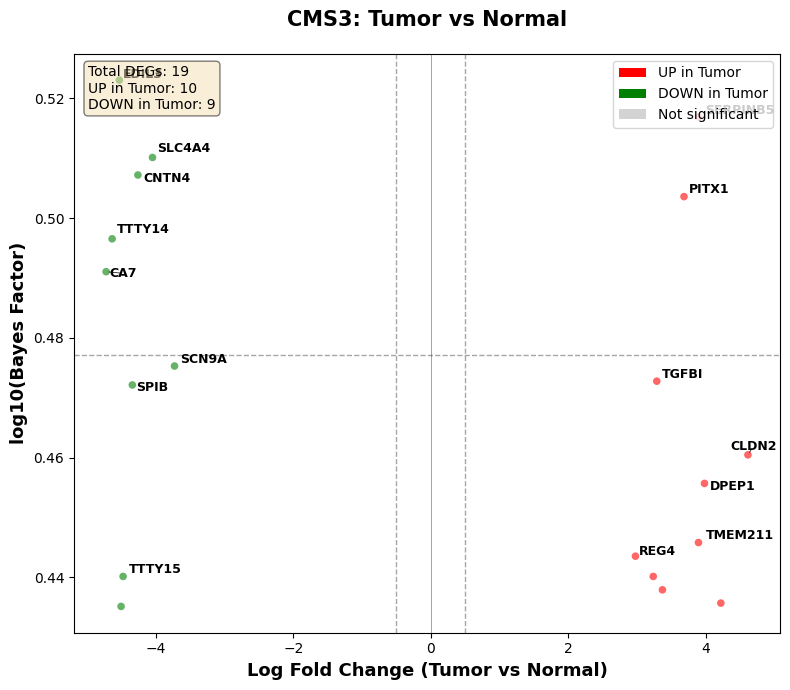


CMS3:
  UP in Tumor: 10
  DOWN in Tumor: 9


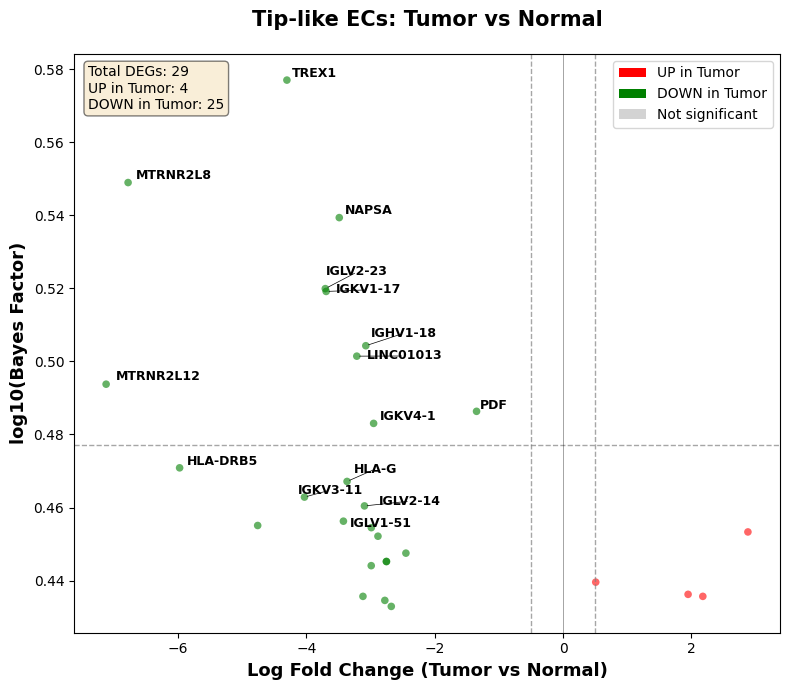


Tip-like ECs:
  UP in Tumor: 4
  DOWN in Tumor: 25
No DEGs found for CD8+ T cells


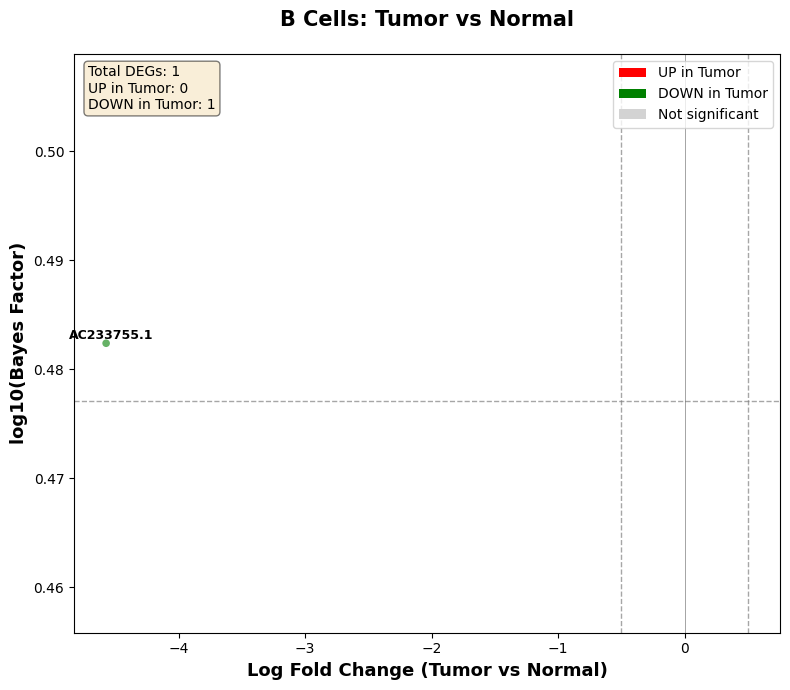


B Cells:
  UP in Tumor: 0
  DOWN in Tumor: 1


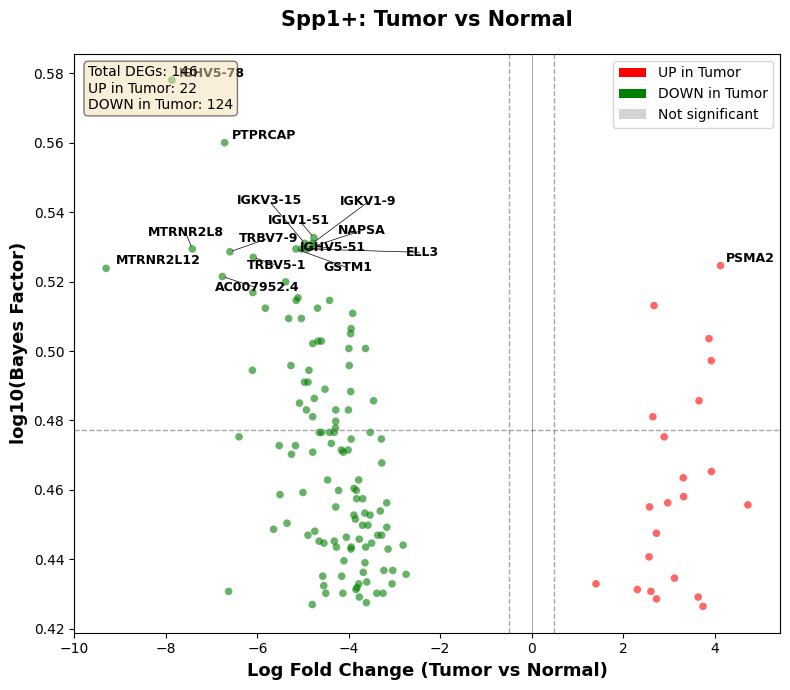


Spp1+:
  UP in Tumor: 22
  DOWN in Tumor: 124


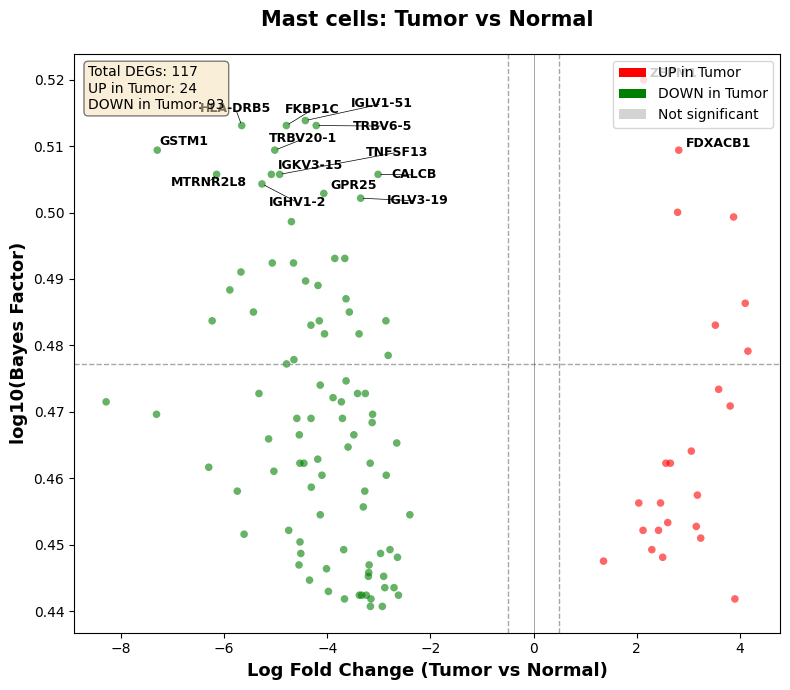


Mast cells:
  UP in Tumor: 24
  DOWN in Tumor: 93


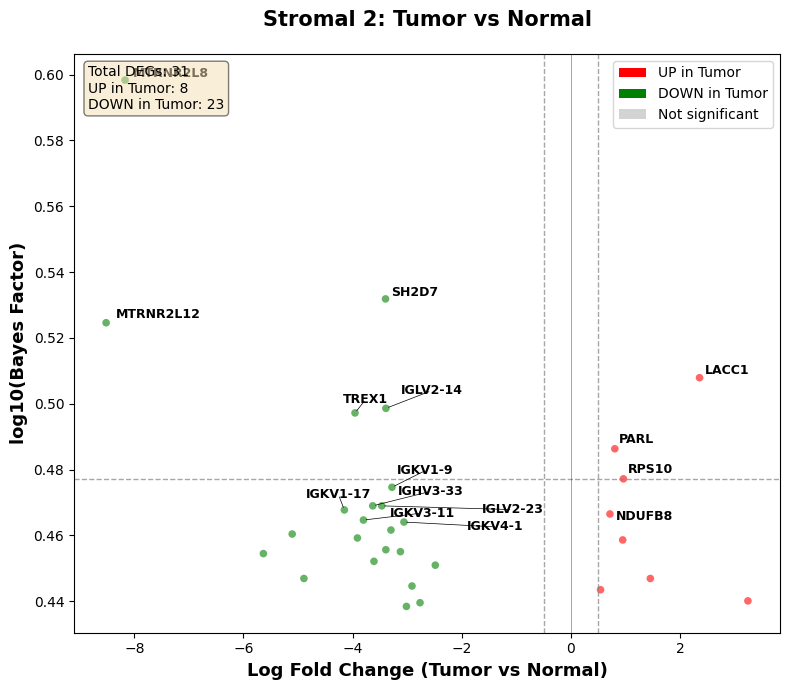


Stromal 2:
  UP in Tumor: 8
  DOWN in Tumor: 23


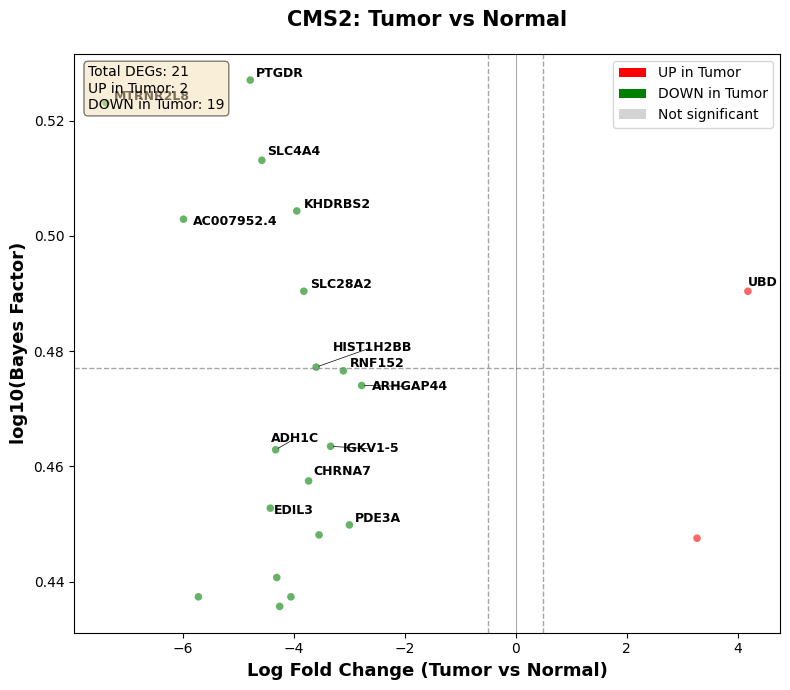


CMS2:
  UP in Tumor: 2
  DOWN in Tumor: 19
No DEGs found for Regulatory T Cells


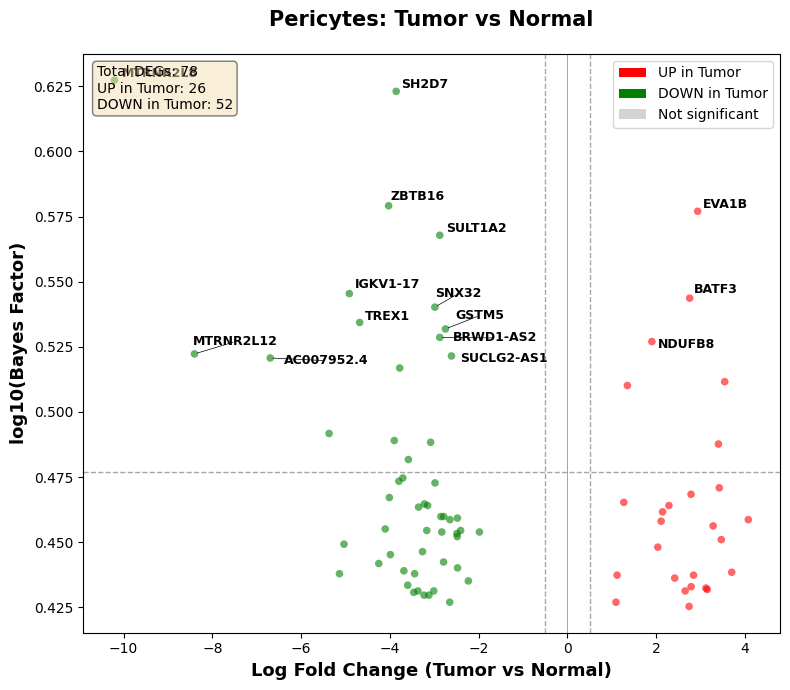


Pericytes:
  UP in Tumor: 26
  DOWN in Tumor: 52


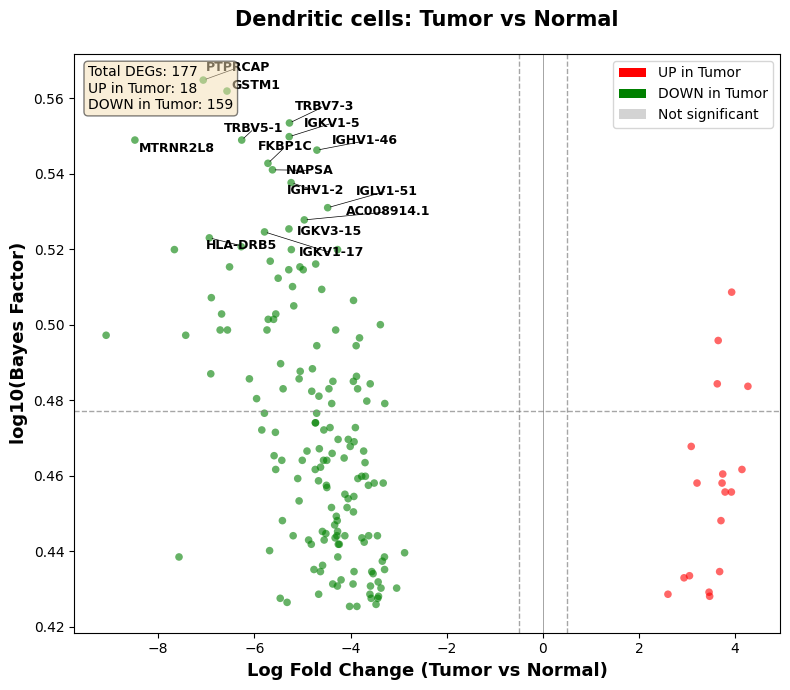


Dendritic cells:
  UP in Tumor: 18
  DOWN in Tumor: 159
No DEGs found for Gamma delta T cells
No DEGs found for Helper 17 T cells


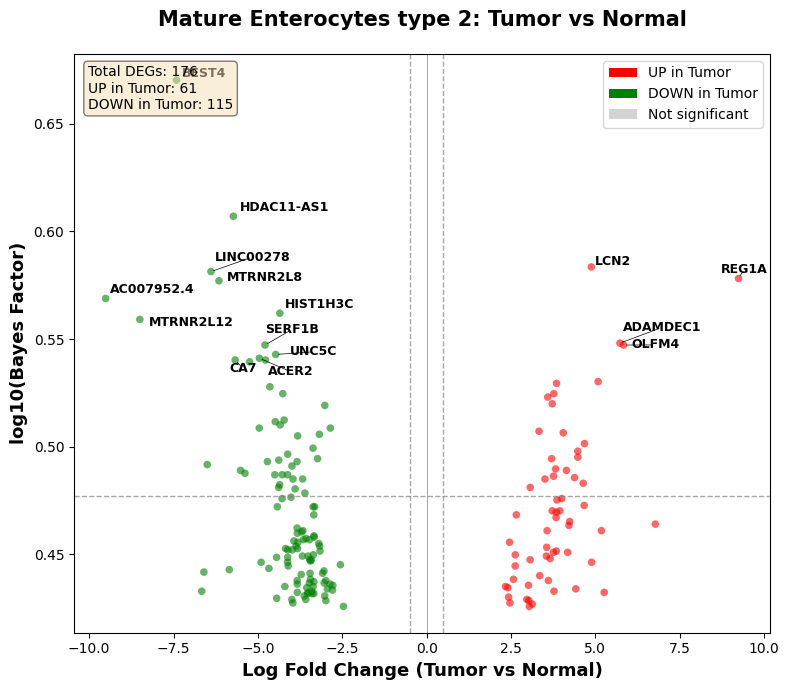


Mature Enterocytes type 2:
  UP in Tumor: 61
  DOWN in Tumor: 115
No DEGs found for NK cells


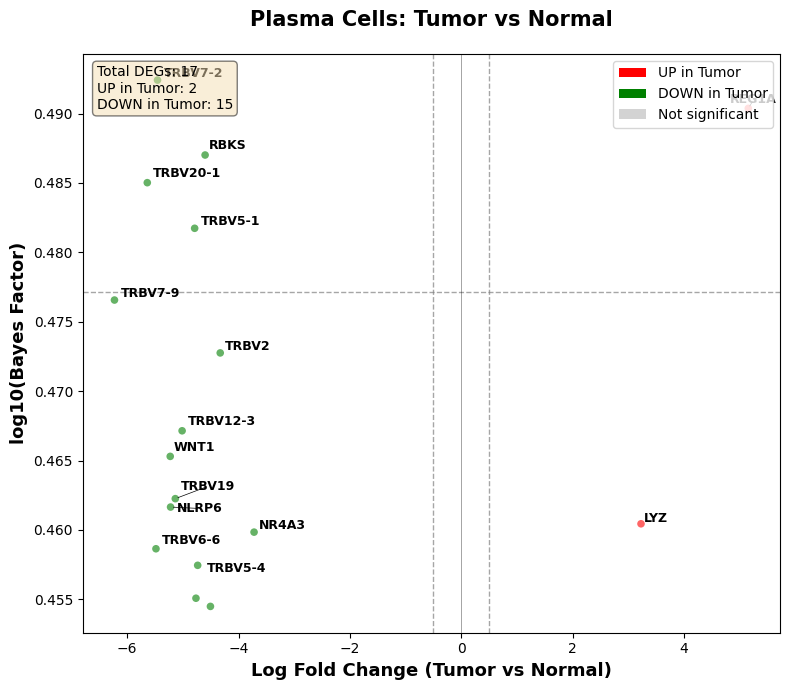


Plasma Cells:
  UP in Tumor: 2
  DOWN in Tumor: 15


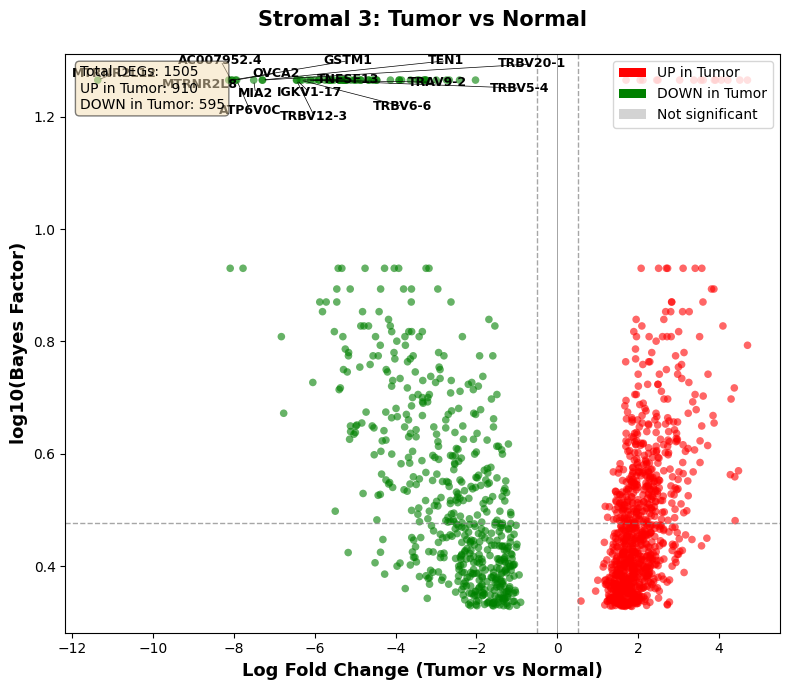


Stromal 3:
  UP in Tumor: 910
  DOWN in Tumor: 595


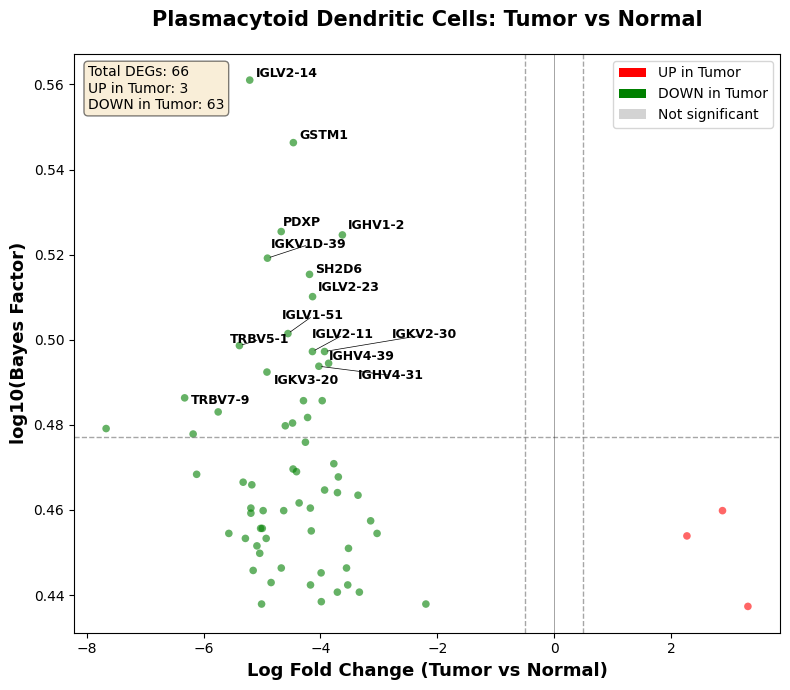


Plasmacytoid Dendritic Cells:
  UP in Tumor: 3
  DOWN in Tumor: 63
No DEGs found for Follicular helper T cells


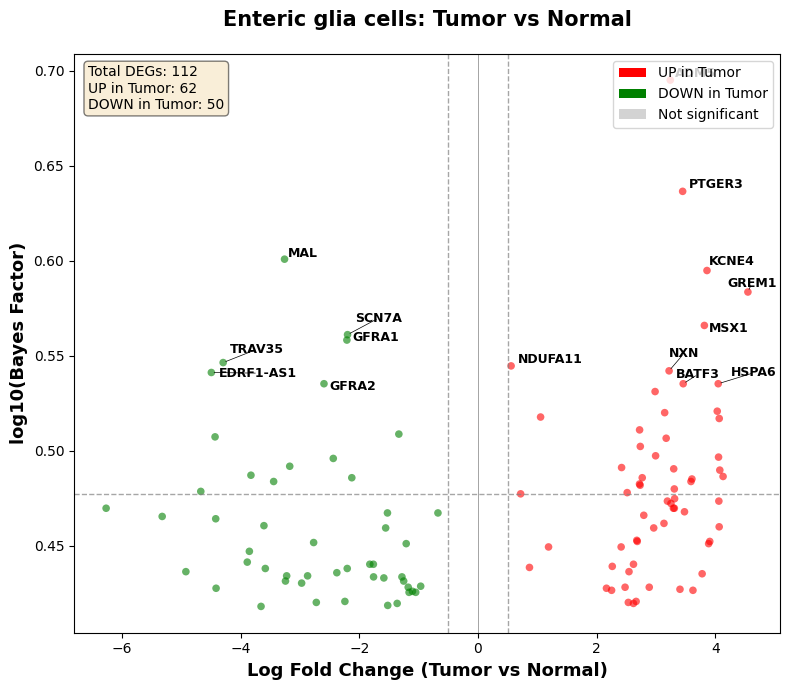


Enteric glia cells:
  UP in Tumor: 62
  DOWN in Tumor: 50


In [18]:
# Create individual volcano plot for each cell type
for cell_type in filtered_de_results.keys():
    fig, ax = plt.subplots(figsize=(8, 7))
    
    # Get DEGs for this cell type from the dictionary
    ct_degs = filtered_de_results[cell_type].copy()
    
    if len(ct_degs) == 0:
        print(f"No DEGs found for {cell_type}")
        plt.close()
        continue
    
    # Use log10(Bayes Factor) as the y-axis (analogous to -log10(p-value))
    # Higher Bayes factor = stronger evidence for differential expression
    ct_degs['log10_bf'] = np.log10(ct_degs['bayes_factor'] + 1e-10)
    
    # Color by significance
    colors = []
    for _, row in ct_degs.iterrows():
        # is_de_fdr_0.05 is already True for all (from filtering)
        if row['is_de_fdr_0.05'] and abs(row['lfc_mean']) > 0.5:
            if row['lfc_mean'] > 0:
                colors.append('red')  # UP in Tumor
            else:
                colors.append('green')  # DOWN in Tumor
        else:
            colors.append('lightgray')
    
    # Volcano plot
    scatter = ax.scatter(
        ct_degs['lfc_mean'],
        ct_degs['log10_bf'],
        c=colors,
        alpha=0.6,
        s=30,
        edgecolors='none'
    )
    
    # Label top genes
    texts = []
    top_genes = ct_degs.nlargest(15, 'log10_bf')  # Top by Bayes factor
    
    for gene_name, gene in top_genes.iterrows():
        texts.append(
            ax.text(
                gene['lfc_mean'],
                gene['log10_bf'],
                gene_name,
                fontsize=9,
                fontweight='bold'
            )
        )
    
    # Adjust text to avoid overlaps
    try:
        from adjustText import adjust_text
        adjust_text(
            texts,
            arrowprops=dict(arrowstyle='-', color='black', lw=0.5),
            expand_points=(1.5, 1.5),
            force_points=(0.5, 0.5)
        )
    except ImportError:
        pass
    
    # Formatting - adjust thresholds for Bayes factor
    # Bayes factor > 3 (log10(3) ≈ 0.48) is considered moderate evidence
    # Bayes factor > 10 (log10(10) = 1) is considered strong evidence
    ax.axhline(y=np.log10(3), color='gray', linestyle='--', linewidth=1, alpha=0.7, label='BF=3 (moderate)')
    ax.axvline(x=0.5, color='gray', linestyle='--', linewidth=1, alpha=0.7)
    ax.axvline(x=-0.5, color='gray', linestyle='--', linewidth=1, alpha=0.7)
    ax.axvline(x=0, color='black', linestyle='-', linewidth=0.5, alpha=0.5)
    
    ax.set_xlabel('Log Fold Change (Tumor vs Normal)', fontsize=13, fontweight='bold')
    ax.set_ylabel('log10(Bayes Factor)', fontsize=13, fontweight='bold')
    ax.set_title(f'{cell_type}: Tumor vs Normal', fontsize=15, fontweight='bold', pad=20)
    
    # Add legend
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='red', label='UP in Tumor'),
        Patch(facecolor='green', label='DOWN in Tumor'),
        Patch(facecolor='lightgray', label='Not significant')
    ]
    ax.legend(handles=legend_elements, loc='upper right', fontsize=10, frameon=True)
    
    # Add summary statistics
    n_up = sum([1 for c in colors if c == 'red'])
    n_down = sum([1 for c in colors if c == 'green'])
    n_total = len(ct_degs)
    
    textstr = f'Total DEGs: {n_total}\nUP in Tumor: {n_up}\nDOWN in Tumor: {n_down}'
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax.text(0.02, 0.98, textstr, transform=ax.transAxes, fontsize=10,
            verticalalignment='top', bbox=props)
    
    plt.tight_layout()
    plt.savefig(f'volcano_{cell_type.replace(" ", "_").replace("/", "_")}.pdf', 
                dpi=300, bbox_inches='tight')
    plt.show()
    
    print(f"\n{cell_type}:")
    print(f"  UP in Tumor: {n_up}")
    print(f"  DOWN in Tumor: {n_down}")

In [19]:
# 5.1 Summary barplot
fig, ax = plt.subplots(figsize=(10, 6))
summary_df.plot(
    x='Cell_Type',
    y=['Upregulated_in_Tumor', 'Downregulated_in_Tumor'],
    kind='bar',
    ax=ax,
    color=['#d62728', '#1f77b4']
)
plt.xlabel('Cell Type')
plt.ylabel('Number of DEGs')
plt.title('DEGs: Tumor vs Normal by Cell Type')
plt.xticks(rotation=45, ha='right')
plt.legend(['Up in Tumor', 'Down in Tumor'])
plt.tight_layout()
plt.savefig('DEG_summary_barplot.png', dpi=300)
plt.close()

# 5.2 Volcano plot for each cell type
for cell_type, de_df in filtered_de_results.items():
    if len(de_df) == 0:
        continue
    
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # All genes for this cell type
    all_genes = de_results[cell_type]
    
    # Create volcano plot
    x = all_genes['lfc_mean']
    y = -np.log10(all_genes['proba_not_de'] + 1e-10)  # -log10(p-value proxy)
    
    # Color by significance
    colors = ['gray'] * len(all_genes)
    for idx, gene in enumerate(all_genes.index):
        if gene in de_df.index:
            colors[idx] = '#d62728' if all_genes.loc[gene, 'lfc_mean'] > 0 else '#1f77b4'
    
    ax.scatter(x, y, c=colors, alpha=0.5, s=10)
    
    # Add labels for top genes
    top_genes = de_df.head(10)
    for gene in top_genes.index:
        ax.annotate(
            gene,
            xy=(all_genes.loc[gene, 'lfc_mean'], -np.log10(all_genes.loc[gene, 'proba_not_de'] + 1e-10)),
            fontsize=8,
            alpha=0.8
        )
    
    ax.axhline(y=-np.log10(0.05), color='black', linestyle='--', linewidth=0.5)
    ax.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
    ax.axvline(x=0.5, color='black', linestyle='--', linewidth=0.5)
    ax.axvline(x=-0.5, color='black', linestyle='--', linewidth=0.5)
    
    ax.set_xlabel('Log Fold Change (Tumor vs Normal)')
    ax.set_ylabel('-log10(proba_not_de)')
    ax.set_title(f'Volcano Plot: {cell_type}')
    
    plt.tight_layout()
    plt.savefig(f'volcano_{cell_type.replace(" ", "_")}.png', dpi=300)
    plt.close()

print("\n✓ Analysis complete!")
print("Check the generated CSV files and plots.")



✓ Analysis complete!
Check the generated CSV files and plots.


In [17]:
# 5.1 Summary barplot
fig, ax = plt.subplots(figsize=(10, 6))
summary_df.plot(
    x='Cell_Type',
    y=['Upregulated_in_Tumor', 'Downregulated_in_Tumor'],
    kind='bar',
    ax=ax,
    color=['#d62728', '#1f77b4']
)
plt.xlabel('Cell Type')
plt.ylabel('Number of DEGs')
plt.title('DEGs: Tumor vs Normal by Cell Type')
plt.xticks(rotation=45, ha='right')
plt.legend(['Up in Tumor', 'Down in Tumor'])
plt.tight_layout()
plt.savefig('DEG_summary_barplot.png', dpi=300)
plt.close()

# 5.2 Volcano plot for each cell type
for cell_type, de_df in filtered_de_results.items():
    if len(de_df) == 0:
        continue
    
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # All genes for this cell type
    all_genes = de_results[cell_type]
    
    # Create volcano plot
    x = all_genes['lfc_mean']
    y = -np.log10(all_genes['proba_not_de'] + 1e-10)
    
    # Separate significant genes by direction
    sig_up = all_genes.index.isin(de_df.index) & (all_genes['lfc_mean'] > 0)
    sig_down = all_genes.index.isin(de_df.index) & (all_genes['lfc_mean'] < 0)
    non_sig = ~all_genes.index.isin(de_df.index)
    
    # Plot non-significant genes
    ax.scatter(x[non_sig], y[non_sig], c='lightgray', alpha=0.5, s=10, label='Not significant')
    
    # Plot significant genes
    ax.scatter(x[sig_up], y[sig_up], c='#d62728', alpha=0.6, s=15, label='Upregulated in Tumor')
    ax.scatter(x[sig_down], y[sig_down], c='#1f77b4', alpha=0.6, s=15, label='Downregulated in Tumor')
    
    # Add labels for top genes
    top_genes = de_df.head(10)
    for gene in top_genes.index:
        ax.annotate(
            gene,
            xy=(all_genes.loc[gene, 'lfc_mean'], -np.log10(all_genes.loc[gene, 'proba_not_de'] + 1e-10)),
            fontsize=8,
            alpha=0.8
        )
    
    ax.axhline(y=-np.log10(0.05), color='black', linestyle='--', linewidth=0.5, alpha=0.5)
    ax.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
    ax.axvline(x=0.5, color='black', linestyle='--', linewidth=0.5, alpha=0.5)
    ax.axvline(x=-0.5, color='black', linestyle='--', linewidth=0.5, alpha=0.5)
    
    ax.set_xlabel('Log Fold Change (Tumor vs Normal)', fontsize=12)
    ax.set_ylabel('-log10(proba_not_de)', fontsize=12)
    ax.set_title(f'Volcano Plot: {cell_type}', fontsize=14, fontweight='bold')
    ax.legend(loc='best', frameon=True, fancybox=True, shadow=True)
    
    plt.tight_layout()
    plt.savefig(f'volcano_{cell_type.replace(" ", "_")}.png', dpi=300, bbox_inches='tight')
    plt.close()

print("\n✓ Analysis complete!")
print("Check the generated CSV files and plots.")

# ============================================================================
# HEATMAP VISUALIZATIONS
# ============================================================================
print("\nGenerating heatmaps...")

# --- Heatmap 1: Top DEGs per cell type (individual heatmap per cell type) ---
for cell_type, de_df in filtered_de_results.items():
    if len(de_df) == 0:
        continue
    
    # Get top genes by absolute log fold change
    de_df['abs_lfc'] = abs(de_df['lfc_mean'])
    n_genes = min(50, len(de_df))
    top_genes = de_df.nlargest(n_genes, 'abs_lfc')
    
    # Subset adata for this cell type and these genes
    adata_subset = adata[adata.obs['Cell_Type'] == cell_type, top_genes.index].copy()
    
    if adata_subset.n_obs == 0:
        continue
    
    # Calculate mean expression per tissue type
    tumor_cells = adata_subset[adata_subset.obs['condition'] == 'Tumor']
    normal_cells = adata_subset[adata_subset.obs['condition'] == 'Normal']
    
    # Get mean expression
    if 'X_scvi' in adata.obsm:
        # Use scVI denoised expression
        tumor_mean = pd.DataFrame(
            model.get_normalized_expression(tumor_cells, return_mean=True),
            index=top_genes.index,
            columns=['Tumor']
        )
        normal_mean = pd.DataFrame(
            model.get_normalized_expression(normal_cells, return_mean=True),
            index=top_genes.index,
            columns=['Normal']
        )
    else:
        # Fallback to regular mean
        if hasattr(tumor_cells.X, 'toarray'):
            tumor_data = tumor_cells.X.toarray().mean(axis=0)
            normal_data = normal_cells.X.toarray().mean(axis=0)
        else:
            tumor_data = tumor_cells.X.mean(axis=0)
            normal_data = normal_cells.X.mean(axis=0)
        
        # Ensure correct shape
        if len(tumor_data.shape) > 1:
            tumor_data = tumor_data.flatten()
            normal_data = normal_data.flatten()
        
        tumor_mean = pd.DataFrame(
            tumor_data,
            index=top_genes.index,
            columns=['Tumor']
        )
        normal_mean = pd.DataFrame(
            normal_data,
            index=top_genes.index,
            columns=['Normal']
        )
    
    # Combine
    heatmap_data = pd.concat([tumor_mean, normal_mean], axis=1)
    
    # Z-score normalize for better visualization
    heatmap_data_zscore = heatmap_data.T
    heatmap_data_zscore = (heatmap_data_zscore - heatmap_data_zscore.mean(axis=0)) / (heatmap_data_zscore.std(axis=0) + 1e-10)
    heatmap_data_zscore = heatmap_data_zscore.T
    
    # Create heatmap
    fig, ax = plt.subplots(figsize=(6, max(8, n_genes * 0.3)))
    sns.heatmap(
        heatmap_data_zscore,
        cmap='RdBu_r',
        center=0,
        cbar_kws={'label': 'Z-score'},
        yticklabels=True,
        xticklabels=True,
        linewidths=0.5,
        ax=ax
    )
    
    ax.set_title(f'Top {n_genes} DEGs: {cell_type}\n(Tumor vs Normal)', fontsize=12, fontweight='bold')
    ax.set_xlabel('Tissue Type', fontsize=10)
    ax.set_ylabel('Genes', fontsize=10)
    
    plt.tight_layout()
    plt.savefig(f'heatmap_top_genes_{cell_type.replace(" ", "_")}.png', dpi=300, bbox_inches='tight')
    plt.close()

print("✓ Individual cell type heatmaps created")

# --- Heatmap 2: Combined heatmap showing LFC across all cell types ---
# Create a matrix of log fold changes
lfc_matrix = pd.DataFrame()
for cell_type, de_df in filtered_de_results.items():
    if len(de_df) == 0:
        continue
    lfc_matrix[cell_type] = de_df['lfc_mean']

# Fill NaN with 0
lfc_matrix = lfc_matrix.fillna(0)

# Get top genes by variance across cell types
if len(lfc_matrix) > 100:
    gene_variance = lfc_matrix.var(axis=1)
    top_genes_idx = gene_variance.nlargest(100).index
    lfc_matrix_top = lfc_matrix.loc[top_genes_idx]
else:
    lfc_matrix_top = lfc_matrix

# Create combined heatmap
if len(lfc_matrix_top) > 0 and len(lfc_matrix_top.columns) > 0:
    fig, ax = plt.subplots(figsize=(max(10, len(lfc_matrix_top.columns) * 0.8), 
                                     max(12, len(lfc_matrix_top) * 0.2)))
    
    sns.heatmap(
        lfc_matrix_top,
        cmap='RdBu_r',
        center=0,
        cbar_kws={'label': 'Log Fold Change (Tumor vs Normal)'},
        yticklabels=True,
        xticklabels=True,
        linewidths=0.5,
        vmin=-3,
        vmax=3,
        ax=ax
    )
    
    ax.set_title('Log Fold Changes Across Cell Types\n(Red = Upregulated in Tumor, Blue = Downregulated)', 
                 fontsize=14, fontweight='bold', pad=20)
    ax.set_xlabel('Cell Type', fontsize=12)
    ax.set_ylabel('Genes', fontsize=12)
    
    plt.tight_layout()
    plt.savefig('heatmap_lfc_all_celltypes.png', dpi=300, bbox_inches='tight')
    plt.close()
    
    print("✓ Combined LFC heatmap created")

# --- Heatmap 3: Dot plot style - showing both LFC and significance ---
# Create matrices for LFC and significance
lfc_matrix_all = pd.DataFrame()
sig_matrix_all = pd.DataFrame()

for cell_type, de_df in de_results.items():
    lfc_matrix_all[cell_type] = de_df['lfc_mean']
    sig_matrix_all[cell_type] = -np.log10(de_df['proba_not_de'] + 1e-10)

# Get genes that are significant in at least one cell type
sig_genes = set()
for cell_type, de_df in filtered_de_results.items():
    sig_genes.update(de_df.index)

if len(sig_genes) > 0:
    lfc_matrix_sig = lfc_matrix_all.loc[list(sig_genes)]
    sig_matrix_sig = sig_matrix_all.loc[list(sig_genes)]
    
    # Limit to top 100 if too many
    if len(lfc_matrix_sig) > 100:
        gene_variance = lfc_matrix_sig.var(axis=1)
        top_genes_idx = gene_variance.nlargest(100).index
        lfc_matrix_sig = lfc_matrix_sig.loc[top_genes_idx]
        sig_matrix_sig = sig_matrix_sig.loc[top_genes_idx]
    
    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(max(16, len(lfc_matrix_sig.columns) * 1.5), 
                                                    max(10, len(lfc_matrix_sig) * 0.2)))
    
    # Heatmap 1: Log Fold Change
    sns.heatmap(
        lfc_matrix_sig,
        cmap='RdBu_r',
        center=0,
        cbar_kws={'label': 'Log Fold Change'},
        yticklabels=True,
        xticklabels=True,
        linewidths=0.5,
        vmin=-3,
        vmax=3,
        ax=ax1
    )
    ax1.set_title('Log Fold Change', fontsize=12, fontweight='bold')
    ax1.set_xlabel('Cell Type', fontsize=10)
    ax1.set_ylabel('Genes', fontsize=10)
    
    # Heatmap 2: Significance
    sns.heatmap(
        sig_matrix_sig,
        cmap='YlOrRd',
        cbar_kws={'label': '-log10(proba_not_de)'},
        yticklabels=True,
        xticklabels=True,
        linewidths=0.5,
        ax=ax2
    )
    ax2.set_title('Significance', fontsize=12, fontweight='bold')
    ax2.set_xlabel('Cell Type', fontsize=10)
    ax2.set_ylabel('', fontsize=10)
    
    fig.suptitle('DEG Analysis Across Cell Types: Tumor vs Normal', 
                 fontsize=14, fontweight='bold', y=1.00)
    
    plt.tight_layout()
    plt.savefig('heatmap_lfc_and_significance.png', dpi=300, bbox_inches='tight')
    plt.close()
    
    print("✓ Combined LFC and significance heatmap created")

print("\n✓ All heatmaps generated!")
print("\nGenerated files:")
print("  - Individual volcano plots per cell type")
print("  - Individual heatmaps per cell type (top DEGs)")
print("  - Combined LFC heatmap across all cell types")
print("  - Combined LFC + significance heatmap")


✓ Analysis complete!
Check the generated CSV files and plots.

Generating heatmaps...
✓ Individual cell type heatmaps created
✓ Combined LFC heatmap created
✓ Combined LFC and significance heatmap created

✓ All heatmaps generated!

Generated files:
  - Individual volcano plots per cell type
  - Individual heatmaps per cell type (top DEGs)
  - Combined LFC heatmap across all cell types
  - Combined LFC + significance heatmap


In [19]:
# ============================================================================
# HEATMAP: Cell Type-Specific DEGs Across All Cell Types
# ============================================================================
print("\nGenerating cell type comparison heatmap...")

# Dictionary to store top genes per cell type
celltype_top_genes = {}
genes_per_celltype = 3  # Can adjust to 3 or 5

for cell_type, de_df in filtered_de_results.items():
    if len(de_df) == 0:
        continue
    
    # Get top genes by absolute log fold change
    de_df['abs_lfc'] = abs(de_df['lfc_mean'])
    n_genes = min(genes_per_celltype, len(de_df))
    top_genes = de_df.nlargest(n_genes, 'abs_lfc')
    celltype_top_genes[cell_type] = top_genes.index.tolist()

# Combine all unique genes
all_top_genes = []
for genes in celltype_top_genes.values():
    all_top_genes.extend(genes)
all_top_genes = list(set(all_top_genes))  # Remove duplicates

print(f"Total unique genes selected: {len(all_top_genes)}")
print(f"Genes per cell type: {genes_per_celltype}")

# Create a matrix: rows = genes, columns = cell types
# Values = log fold change (Tumor vs Normal) for each cell type
lfc_comparison_matrix = pd.DataFrame(index=all_top_genes)

for cell_type in de_results.keys():
    if cell_type in celltype_top_genes:
        # Get LFC for all selected genes in this cell type
        cell_de = de_results[cell_type]
        lfc_comparison_matrix[cell_type] = cell_de.loc[all_top_genes, 'lfc_mean']

# Fill any NaN values with 0 (gene not DE in that cell type)
lfc_comparison_matrix = lfc_comparison_matrix.fillna(0)

# Sort genes by cell type for better visualization
# Group genes by which cell type they're "top" in
gene_to_celltype = {}
for cell_type, genes in celltype_top_genes.items():
    for gene in genes:
        if gene not in gene_to_celltype:
            gene_to_celltype[gene] = cell_type

sorted_genes = []
for cell_type in lfc_comparison_matrix.columns:
    if cell_type in celltype_top_genes:
        genes_for_this_type = [g for g in celltype_top_genes[cell_type] if g in lfc_comparison_matrix.index]
        sorted_genes.extend(genes_for_this_type)

# Add any remaining genes
remaining_genes = [g for g in lfc_comparison_matrix.index if g not in sorted_genes]
sorted_genes.extend(remaining_genes)

lfc_comparison_matrix = lfc_comparison_matrix.loc[sorted_genes]

# Create the heatmap
fig, ax = plt.subplots(figsize=(max(12, len(lfc_comparison_matrix.columns) * 1.2), 
                                 max(10, len(lfc_comparison_matrix) * 0.25)))

sns.heatmap(
    lfc_comparison_matrix,
    cmap='RdBu_r',
    center=0,
    cbar_kws={'label': 'Log Fold Change (Tumor vs Normal)', 'shrink': 0.8},
    yticklabels=True,
    xticklabels=True,
    linewidths=0.3,
    linecolor='gray',
    vmin=-3,
    vmax=3,
    ax=ax
)

# Add cell type labels on the right side to show which genes belong to which cell type
divider_positions = []
current_pos = 0
for cell_type in lfc_comparison_matrix.columns:
    if cell_type in celltype_top_genes:
        n_genes_for_type = len([g for g in celltype_top_genes[cell_type] if g in sorted_genes])
        if n_genes_for_type > 0:
            divider_positions.append(current_pos + n_genes_for_type)
            current_pos += n_genes_for_type

# Draw horizontal lines to separate gene groups
for pos in divider_positions[:-1]:  # Don't draw line after last group
    ax.axhline(y=pos, color='black', linewidth=2, alpha=0.7)

ax.set_title(f'Top {genes_per_celltype} DEGs per Cell Type: Expression Across All Cell Types\n' +
             '(Red = Upregulated in Tumor, Blue = Downregulated)', 
             fontsize=14, fontweight='bold', pad=20)
ax.set_xlabel('Cell Type', fontsize=12, fontweight='bold')
ax.set_ylabel('Genes (grouped by cell type)', fontsize=12, fontweight='bold')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('heatmap_celltype_deg_comparison.png', dpi=300, bbox_inches='tight')
plt.close()

print("✓ Cell type comparison heatmap created")

# ============================================================================
# ALTERNATIVE: Annotated version with cell type labels
# ============================================================================
print("\nGenerating annotated cell type comparison heatmap...")

# Create figure with more space for annotations
fig, ax = plt.subplots(figsize=(max(14, len(lfc_comparison_matrix.columns) * 1.2), 
                                 max(12, len(lfc_comparison_matrix) * 0.3)))

# Create heatmap
sns.heatmap(
    lfc_comparison_matrix,
    cmap='RdBu_r',
    center=0,
    cbar_kws={'label': 'Log Fold Change (Tumor vs Normal)', 'shrink': 0.8},
    yticklabels=True,
    xticklabels=True,
    linewidths=0.3,
    linecolor='gray',
    vmin=-3,
    vmax=3,
    ax=ax
)

# Add annotations showing which cell type each gene group belongs to
current_pos = 0
colors = plt.cm.Set3(np.linspace(0, 1, len(celltype_top_genes)))
color_idx = 0

for cell_type in lfc_comparison_matrix.columns:
    if cell_type in celltype_top_genes:
        genes_for_type = [g for g in celltype_top_genes[cell_type] if g in sorted_genes]
        n_genes_for_type = len(genes_for_type)
        
        if n_genes_for_type > 0:
            # Add colored bar on the left
            ax.add_patch(plt.Rectangle(
                (-0.5, current_pos), 
                0.3, 
                n_genes_for_type,
                facecolor=colors[color_idx],
                edgecolor='black',
                linewidth=1,
                clip_on=False,
                transform=ax.transData
            ))
            
            # Add text label
            ax.text(
                -1.0, 
                current_pos + n_genes_for_type/2, 
                cell_type,
                va='center',
                ha='right',
                fontsize=9,
                fontweight='bold',
                rotation=0,
                transform=ax.transData
            )
            
            # Draw separator line
            if current_pos > 0:
                ax.axhline(y=current_pos, color='black', linewidth=2, alpha=0.7)
            
            current_pos += n_genes_for_type
            color_idx += 1

ax.set_title(f'Top {genes_per_celltype} DEGs per Cell Type: Cross-Cell Type Comparison\n' +
             '(Each gene group shows its primary cell type on the left)', 
             fontsize=14, fontweight='bold', pad=20)
ax.set_xlabel('Cell Type', fontsize=12, fontweight='bold')
ax.set_ylabel('Genes', fontsize=12, fontweight='bold')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('heatmap_celltype_deg_comparison_annotated.png', dpi=300, bbox_inches='tight')
plt.close()

print("✓ Annotated cell type comparison heatmap created")

# ============================================================================
# SUMMARY: Print genes selected per cell type
# ============================================================================
print("\n" + "="*60)
print("SELECTED GENES PER CELL TYPE:")
print("="*60)
for cell_type, genes in celltype_top_genes.items():
    print(f"\n{cell_type} ({len(genes)} genes):")
    for gene in genes:
        lfc = de_results[cell_type].loc[gene, 'lfc_mean']
        print(f"  - {gene:15s} (LFC: {lfc:6.2f})")

print("\n✓ Cell type comparison analysis complete!")
print("\nGenerated files:")
print("  - heatmap_celltype_deg_comparison.png (basic version)")
print("  - heatmap_celltype_deg_comparison_annotated.png (with cell type labels)")


Generating cell type comparison heatmap...
Total unique genes selected: 45
Genes per cell type: 3
✓ Cell type comparison heatmap created

Generating annotated cell type comparison heatmap...
✓ Annotated cell type comparison heatmap created

SELECTED GENES PER CELL TYPE:

CD4+ T Cells (3 genes):
  - FOXJ1           (LFC:  -3.43)
  - CEBPD           (LFC:   3.38)
  - TMPRSS3         (LFC:   3.37)

CMS3 (3 genes):
  - CA7             (LFC:  -4.84)
  - TTTY14          (LFC:  -4.67)
  - CLDN2           (LFC:   4.61)

Tip-like ECs (3 genes):
  - MTRNR2L8        (LFC:  -6.65)
  - TREX1           (LFC:  -4.25)
  - NAPSA           (LFC:  -3.47)

CD8+ T cells (3 genes):
  - CXCL13          (LFC:   3.70)
  - NLRP6           (LFC:  -3.17)
  - S100P           (LFC:   2.92)

B Cells (3 genes):
  - ATP6V0C         (LFC:  -4.89)
  - IGHV4-34        (LFC:  -4.81)
  - EIF1AY          (LFC:  -4.74)

Spp1+ (3 genes):
  - MTRNR2L12       (LFC:  -9.45)
  - IGHV5-78        (LFC:  -7.89)
  - MTRNR2L8        

In [20]:
# ============================================================================
# DIFFERENTIAL EXPRESSION ANALYSIS: LEFT vs RIGHT CRC
# ============================================================================

print("="*70)
print("DIFFERENTIAL EXPRESSION ANALYSIS: LEFT vs RIGHT CRC")
print("="*70)

# Filter to only tumor samples (assuming you want to compare left vs right tumors)
adata_tumor = adata[adata.obs['condition'] == 'Tumor'].copy()

print(f"\nTotal tumor samples: {adata_tumor.n_obs}")
print(f"Cell types: {adata_tumor.obs['Cell_Type'].nunique()}")

# Check tumor location distribution
if 'tumor_location' in adata_tumor.obs.columns:
    location_col = 'tumor_location'
elif 'Tumor_Location' in adata_tumor.obs.columns:
    location_col = 'Tumor_Location'
elif 'location' in adata_tumor.obs.columns:
    location_col = 'location'
else:
    print("\n⚠️  ERROR: Could not find tumor location column!")
    print("Available columns:", adata_tumor.obs.columns.tolist())
    # Uncomment the line below with the correct column name
    # location_col = 'YOUR_LOCATION_COLUMN_NAME'

print(f"\nTumor location distribution:")
print(adata_tumor.obs[location_col].value_counts())

# Run DEG analysis per cell type
de_results_location = {}
cell_types = adata_tumor.obs['Cell_Type'].unique()

print(f"\nAnalyzing {len(cell_types)} cell types...\n")

for cell_type in cell_types:
    print(f"{'='*60}")
    print(f"Analyzing: {cell_type}")
    print(f"{'='*60}")
    
    # Subset to this cell type
    adata_subset = adata_tumor[adata_tumor.obs['Cell_Type'] == cell_type].copy()
    
    # Check if we have both left and right samples
    location_counts = adata_subset.obs[location_col].value_counts()
    print(f"Left samples: {location_counts.get('Left', 0)}")
    print(f"Right samples: {location_counts.get('Right', 0)}")
    
    if len(location_counts) < 2:
        print(f"⚠️  Skipping {cell_type}: only one location present\n")
        continue
    
    # Check for both 'Left' and 'Right' specifically
    if 'Left' not in location_counts or 'Right' not in location_counts:
        print(f"⚠️  Skipping {cell_type}: missing Left or Right samples\n")
        continue
    
    if location_counts.min() < 10:  # minimum cell threshold
        print(f"⚠️  Warning: Low cell count in one group for {cell_type}")
        print(f"   Proceeding anyway, but results may be unreliable\n")
    
    try:
        # Run differential expression: Left vs Right
        de_df = model.differential_expression(
            adata_subset,
            groupby=location_col,
            group1="Left",
            group2="Right",
            delta=0.5,  # minimum log fold change threshold
            fdr_target=0.05,
            mode='change',
            pseudocounts=1e-7
        )
        de_results_location[cell_type] = de_df
        
        # Print summary
        n_sig = (de_df['is_de_fdr_0.05']).sum()
        print(f"Significant DEGs (FDR < 0.05): {n_sig}")
        print(f"Total genes tested: {len(de_df)}\n")
        
    except Exception as e:
        print(f"⚠️  Error analyzing {cell_type}: {str(e)}\n")
        continue

print("\n" + "="*70)
print("FILTERING SIGNIFICANT DEGs")
print("="*70)

# Filter results
filtered_de_results_location = {}

for cell_type, de_df in de_results_location.items():
    print(f"\n{cell_type}:")
    
    # Try strict filtering first
    de_filtered = de_df[
        (de_df['is_de_fdr_0.05']) & 
        (abs(de_df['lfc_mean']) > 0.5)
    ]
    
    print(f"  Strict filtering (FDR < 0.05, |LFC| > 0.5): {len(de_filtered)} genes")
    
    # If no genes pass, use lenient filtering
    if len(de_filtered) == 0:
        print(f"  ⚠️  No genes pass FDR 0.05, using lenient criteria...")
        
        de_filtered = de_df[
            (de_df['proba_de'] > 0.75) &
            (abs(de_df['lfc_mean']) > 0.5)
        ]
        print(f"  Lenient filtering (proba_de > 0.75, |LFC| > 0.5): {len(de_filtered)} genes")
    
    # Sort by effect size (absolute log fold change)
    de_filtered = de_filtered.sort_values('lfc_mean', key=abs, ascending=False)
    
    filtered_de_results_location[cell_type] = de_filtered

print("\n" + "="*70)
print("SAVING RESULTS")
print("="*70)

# Save individual cell type results
for cell_type, de_df in filtered_de_results_location.items():
    filename = f"DEG_{cell_type.replace(' ', '_')}_left_vs_right.csv"
    de_df.to_csv(filename)
    print(f"Saved: {filename}")

# Create summary table
summary_data_location = []

for cell_type, de_df in filtered_de_results_location.items():
    up_in_left = (de_df['lfc_mean'] > 0).sum()
    down_in_left = (de_df['lfc_mean'] < 0).sum()
    
    summary_data_location.append({
        'Cell_Type': cell_type,
        'Total_DEGs': len(de_df),
        'Upregulated_in_Left': up_in_left,
        'Downregulated_in_Left': down_in_left,
        'Upregulated_in_Right': down_in_left,  # genes down in left = up in right
        'Downregulated_in_Right': up_in_left,  # genes up in left = down in right
        'Top_Up_in_Left_Gene': de_df[de_df['lfc_mean'] > 0].index[0] if (de_df['lfc_mean'] > 0).any() else 'NA',
        'Top_Down_in_Left_Gene': de_df[de_df['lfc_mean'] < 0].index[0] if (de_df['lfc_mean'] < 0).any() else 'NA'
    })

summary_df_location = pd.DataFrame(summary_data_location)
summary_df_location.to_csv('DEG_summary_left_vs_right_all_celltypes.csv', index=False)
print("\nSaved: DEG_summary_left_vs_right_all_celltypes.csv")

print("\n" + "="*70)
print("ANALYSIS SUMMARY")
print("="*70)
print(f"\nTotal cell types analyzed: {len(de_results_location)}")
print(f"Cell types with significant DEGs: {len([ct for ct, df in filtered_de_results_location.items() if len(df) > 0])}")
print(f"\nTotal unique DEGs across all cell types: {len(set().union(*[set(df.index) for df in filtered_de_results_location.values()]))}")

# Print summary table
print("\n" + "="*70)
print("DEG SUMMARY BY CELL TYPE")
print("="*70)
print(summary_df_location.to_string(index=False))

print("\n✓ Left vs Right DEG analysis complete!")
print("\nGenerated files:")
print("  - Individual CSV files per cell type: DEG_[CellType]_left_vs_right.csv")
print("  - Summary table: DEG_summary_left_vs_right_all_celltypes.csv")

DIFFERENTIAL EXPRESSION ANALYSIS: LEFT vs RIGHT CRC

Total tumor samples: 43640
Cell types: 21

Tumor location distribution:
location
Left     22848
Right    20792
Name: count, dtype: int64

Analyzing 21 cell types...

Analyzing: CD4+ T Cells
Left samples: 5789
Right samples: 6144
INFO     AnnData object appears to be a copy. Attempting to transfer setup.                                        


DE...:   0%|          | 0/1 [00:00<?, ?it/s]

Significant DEGs (FDR < 0.05): 0
Total genes tested: 14469

Analyzing: CMS3
Left samples: 1313
Right samples: 1585
INFO     AnnData object appears to be a copy. Attempting to transfer setup.                                        


DE...:   0%|          | 0/1 [00:00<?, ?it/s]

Significant DEGs (FDR < 0.05): 0
Total genes tested: 14469

Analyzing: Tip-like ECs
Left samples: 222
Right samples: 359
INFO     AnnData object appears to be a copy. Attempting to transfer setup.                                        


DE...:   0%|          | 0/1 [00:00<?, ?it/s]

Significant DEGs (FDR < 0.05): 0
Total genes tested: 14469

Analyzing: CD8+ T cells
Left samples: 2649
Right samples: 2406
INFO     AnnData object appears to be a copy. Attempting to transfer setup.                                        


DE...:   0%|          | 0/1 [00:00<?, ?it/s]

Significant DEGs (FDR < 0.05): 0
Total genes tested: 14469

Analyzing: B Cells
Left samples: 3365
Right samples: 3656
INFO     AnnData object appears to be a copy. Attempting to transfer setup.                                        


DE...:   0%|          | 0/1 [00:00<?, ?it/s]

Significant DEGs (FDR < 0.05): 0
Total genes tested: 14469

Analyzing: Spp1+
Left samples: 791
Right samples: 821
INFO     AnnData object appears to be a copy. Attempting to transfer setup.                                        


DE...:   0%|          | 0/1 [00:00<?, ?it/s]

Significant DEGs (FDR < 0.05): 0
Total genes tested: 14469

Analyzing: Mast cells
Left samples: 241
Right samples: 387
INFO     AnnData object appears to be a copy. Attempting to transfer setup.                                        


DE...:   0%|          | 0/1 [00:00<?, ?it/s]

Significant DEGs (FDR < 0.05): 0
Total genes tested: 14469

Analyzing: Stromal 2
Left samples: 405
Right samples: 444
INFO     AnnData object appears to be a copy. Attempting to transfer setup.                                        


DE...:   0%|          | 0/1 [00:00<?, ?it/s]

Significant DEGs (FDR < 0.05): 0
Total genes tested: 14469

Analyzing: CMS2
Left samples: 785
Right samples: 976
INFO     AnnData object appears to be a copy. Attempting to transfer setup.                                        


DE...:   0%|          | 0/1 [00:00<?, ?it/s]

Significant DEGs (FDR < 0.05): 0
Total genes tested: 14469

Analyzing: Regulatory T Cells
Left samples: 2385
Right samples: 1151
INFO     AnnData object appears to be a copy. Attempting to transfer setup.                                        


DE...:   0%|          | 0/1 [00:00<?, ?it/s]

Significant DEGs (FDR < 0.05): 0
Total genes tested: 14469

Analyzing: Pericytes
Left samples: 196
Right samples: 238
INFO     AnnData object appears to be a copy. Attempting to transfer setup.                                        


DE...:   0%|          | 0/1 [00:00<?, ?it/s]

Significant DEGs (FDR < 0.05): 0
Total genes tested: 14469

Analyzing: Dendritic cells
Left samples: 1364
Right samples: 697
INFO     AnnData object appears to be a copy. Attempting to transfer setup.                                        


DE...:   0%|          | 0/1 [00:00<?, ?it/s]

Significant DEGs (FDR < 0.05): 0
Total genes tested: 14469

Analyzing: Gamma delta T cells
Left samples: 348
Right samples: 415
INFO     AnnData object appears to be a copy. Attempting to transfer setup.                                        


DE...:   0%|          | 0/1 [00:00<?, ?it/s]

Significant DEGs (FDR < 0.05): 0
Total genes tested: 14469

Analyzing: Helper 17 T cells
Left samples: 1809
Right samples: 458
INFO     AnnData object appears to be a copy. Attempting to transfer setup.                                        


DE...:   0%|          | 0/1 [00:00<?, ?it/s]

Significant DEGs (FDR < 0.05): 0
Total genes tested: 14469

Analyzing: Mature Enterocytes type 2
Left samples: 47
Right samples: 158
INFO     AnnData object appears to be a copy. Attempting to transfer setup.                                        


DE...:   0%|          | 0/1 [00:00<?, ?it/s]

Significant DEGs (FDR < 0.05): 0
Total genes tested: 14469

Analyzing: NK cells
Left samples: 652
Right samples: 357
INFO     AnnData object appears to be a copy. Attempting to transfer setup.                                        


DE...:   0%|          | 0/1 [00:00<?, ?it/s]

Significant DEGs (FDR < 0.05): 0
Total genes tested: 14469

Analyzing: Plasma Cells
Left samples: 134
Right samples: 65
INFO     AnnData object appears to be a copy. Attempting to transfer setup.                                        


DE...:   0%|          | 0/1 [00:00<?, ?it/s]

Significant DEGs (FDR < 0.05): 0
Total genes tested: 14469

Analyzing: Stromal 3
Left samples: 8
Right samples: 15
⚠️  Warning: Low cell count in one group for Stromal 3
   Proceeding anyway, but results may be unreliable

INFO     AnnData object appears to be a copy. Attempting to transfer setup.                                        


DE...:   0%|          | 0/1 [00:00<?, ?it/s]

Significant DEGs (FDR < 0.05): 785
Total genes tested: 14469

Analyzing: Plasmacytoid Dendritic Cells
Left samples: 60
Right samples: 26
INFO     AnnData object appears to be a copy. Attempting to transfer setup.                                        


DE...:   0%|          | 0/1 [00:00<?, ?it/s]

Significant DEGs (FDR < 0.05): 0
Total genes tested: 14469

Analyzing: Follicular helper T cells
Left samples: 276
Right samples: 423
INFO     AnnData object appears to be a copy. Attempting to transfer setup.                                        


DE...:   0%|          | 0/1 [00:00<?, ?it/s]

Significant DEGs (FDR < 0.05): 0
Total genes tested: 14469

Analyzing: Enteric glia cells
Left samples: 9
Right samples: 11
⚠️  Warning: Low cell count in one group for Enteric glia cells
   Proceeding anyway, but results may be unreliable

INFO     AnnData object appears to be a copy. Attempting to transfer setup.                                        


DE...:   0%|          | 0/1 [00:00<?, ?it/s]

Significant DEGs (FDR < 0.05): 0
Total genes tested: 14469


FILTERING SIGNIFICANT DEGs

CD4+ T Cells:
  Strict filtering (FDR < 0.05, |LFC| > 0.5): 0 genes
  ⚠️  No genes pass FDR 0.05, using lenient criteria...
  Lenient filtering (proba_de > 0.75, |LFC| > 0.5): 10 genes

CMS3:
  Strict filtering (FDR < 0.05, |LFC| > 0.5): 0 genes
  ⚠️  No genes pass FDR 0.05, using lenient criteria...
  Lenient filtering (proba_de > 0.75, |LFC| > 0.5): 252 genes

Tip-like ECs:
  Strict filtering (FDR < 0.05, |LFC| > 0.5): 0 genes
  ⚠️  No genes pass FDR 0.05, using lenient criteria...
  Lenient filtering (proba_de > 0.75, |LFC| > 0.5): 1 genes

CD8+ T cells:
  Strict filtering (FDR < 0.05, |LFC| > 0.5): 0 genes
  ⚠️  No genes pass FDR 0.05, using lenient criteria...
  Lenient filtering (proba_de > 0.75, |LFC| > 0.5): 1 genes

B Cells:
  Strict filtering (FDR < 0.05, |LFC| > 0.5): 0 genes
  ⚠️  No genes pass FDR 0.05, using lenient criteria...
  Lenient filtering (proba_de > 0.75, |LFC| > 0.5): 3 gen

In [21]:
# ============================================================================
# VISUALIZATIONS: LEFT vs RIGHT CRC DEG ANALYSIS
# ============================================================================


print("\n" + "="*70)
print("GENERATING VISUALIZATIONS")
print("="*70)

# 1. Summary barplot
print("\n1. Creating summary barplot...")
fig, ax = plt.subplots(figsize=(10, 6))
summary_df_location.plot(
    x='Cell_Type',
    y=['Upregulated_in_Left', 'Downregulated_in_Left'],
    kind='bar',
    ax=ax,
    color=['#2ca02c', '#ff7f0e']
)
plt.xlabel('Cell Type', fontsize=12)
plt.ylabel('Number of DEGs', fontsize=12)
plt.title('DEGs: Left vs Right CRC by Cell Type', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.legend(['Up in Left', 'Down in Left (Up in Right)'])
plt.tight_layout()
plt.savefig('DEG_summary_barplot_left_vs_right.png', dpi=300)
plt.close()
print("✓ Saved: DEG_summary_barplot_left_vs_right.png")

# 2. Volcano plots for each cell type
print("\n2. Creating volcano plots...")
for cell_type, de_df in filtered_de_results_location.items():
    if len(de_df) == 0:
        continue
    
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # All genes for this cell type
    all_genes = de_results_location[cell_type]
    
    # Create volcano plot data
    x = all_genes['lfc_mean']
    y = -np.log10(all_genes['proba_not_de'] + 1e-10)
    
    # Separate significant genes by direction
    sig_up = all_genes.index.isin(de_df.index) & (all_genes['lfc_mean'] > 0)
    sig_down = all_genes.index.isin(de_df.index) & (all_genes['lfc_mean'] < 0)
    non_sig = ~all_genes.index.isin(de_df.index)
    
    # Plot non-significant genes
    ax.scatter(x[non_sig], y[non_sig], c='lightgray', alpha=0.5, s=10, label='Not significant')
    
    # Plot significant genes
    ax.scatter(x[sig_up], y[sig_up], c='#2ca02c', alpha=0.6, s=15, label='Upregulated in Left')
    ax.scatter(x[sig_down], y[sig_down], c='#ff7f0e', alpha=0.6, s=15, label='Upregulated in Right')
    
    # Add labels for top genes
    top_genes = de_df.head(10)
    for gene in top_genes.index:
        ax.annotate(
            gene,
            xy=(all_genes.loc[gene, 'lfc_mean'], -np.log10(all_genes.loc[gene, 'proba_not_de'] + 1e-10)),
            fontsize=8,
            alpha=0.8
        )
    
    # Add reference lines
    ax.axhline(y=-np.log10(0.05), color='black', linestyle='--', linewidth=0.5, alpha=0.5)
    ax.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
    ax.axvline(x=0.5, color='black', linestyle='--', linewidth=0.5, alpha=0.5)
    ax.axvline(x=-0.5, color='black', linestyle='--', linewidth=0.5, alpha=0.5)
    
    ax.set_xlabel('Log Fold Change (Left vs Right)', fontsize=12)
    ax.set_ylabel('-log10(proba_not_de)', fontsize=12)
    ax.set_title(f'Volcano Plot: {cell_type}\n(Left vs Right CRC)', fontsize=14, fontweight='bold')
    ax.legend(loc='best', frameon=True, fancybox=True, shadow=True)
    
    plt.tight_layout()
    plt.savefig(f'volcano_left_right_{cell_type.replace(" ", "_")}.png', dpi=300, bbox_inches='tight')
    plt.close()

print(f"✓ Created {len(filtered_de_results_location)} volcano plots")

# ============================================================================
# HEATMAP VISUALIZATIONS
# ============================================================================
print("\n3. Generating heatmaps...")

# --- Heatmap 1: Top DEGs per cell type (individual heatmap per cell type) ---
print("\n3a. Individual cell type heatmaps...")
for cell_type, de_df in filtered_de_results_location.items():
    if len(de_df) == 0:
        continue
    
    # Get top genes by absolute log fold change
    de_df['abs_lfc'] = abs(de_df['lfc_mean'])
    n_genes = min(50, len(de_df))
    top_genes = de_df.nlargest(n_genes, 'abs_lfc')
    
    # Subset adata for this cell type and these genes
    adata_subset = adata_tumor[adata_tumor.obs['Cell_Type'] == cell_type, top_genes.index].copy()
    
    if adata_subset.n_obs == 0:
        continue
    
    # Calculate mean expression per location
    left_cells = adata_subset[adata_subset.obs[location_col] == 'Left']
    right_cells = adata_subset[adata_subset.obs[location_col] == 'Right']
    
    # Get mean expression
    if 'X_scvi' in adata.obsm:
        # Use scVI denoised expression
        left_mean = pd.DataFrame(
            model.get_normalized_expression(left_cells, return_mean=True),
            index=top_genes.index,
            columns=['Left']
        )
        right_mean = pd.DataFrame(
            model.get_normalized_expression(right_cells, return_mean=True),
            index=top_genes.index,
            columns=['Right']
        )
    else:
        # Fallback to regular mean
        if hasattr(left_cells.X, 'toarray'):
            left_data = left_cells.X.toarray().mean(axis=0)
            right_data = right_cells.X.toarray().mean(axis=0)
        else:
            left_data = left_cells.X.mean(axis=0)
            right_data = right_cells.X.mean(axis=0)
        
        # Ensure correct shape
        if len(left_data.shape) > 1:
            left_data = left_data.flatten()
            right_data = right_data.flatten()
        
        left_mean = pd.DataFrame(left_data, index=top_genes.index, columns=['Left'])
        right_mean = pd.DataFrame(right_data, index=top_genes.index, columns=['Right'])
    
    # Combine
    heatmap_data = pd.concat([left_mean, right_mean], axis=1)
    
    # Z-score normalize
    heatmap_data_zscore = heatmap_data.T
    heatmap_data_zscore = (heatmap_data_zscore - heatmap_data_zscore.mean(axis=0)) / (heatmap_data_zscore.std(axis=0) + 1e-10)
    heatmap_data_zscore = heatmap_data_zscore.T
    
    # Create heatmap
    fig, ax = plt.subplots(figsize=(6, max(8, n_genes * 0.3)))
    sns.heatmap(
        heatmap_data_zscore,
        cmap='RdBu_r',
        center=0,
        cbar_kws={'label': 'Z-score'},
        yticklabels=True,
        xticklabels=True,
        linewidths=0.5,
        ax=ax
    )
    
    ax.set_title(f'Top {n_genes} DEGs: {cell_type}\n(Left vs Right CRC)', fontsize=12, fontweight='bold')
    ax.set_xlabel('Tumor Location', fontsize=10)
    ax.set_ylabel('Genes', fontsize=10)
    
    plt.tight_layout()
    plt.savefig(f'heatmap_top_genes_left_right_{cell_type.replace(" ", "_")}.png', dpi=300, bbox_inches='tight')
    plt.close()

print("✓ Individual cell type heatmaps created")

# --- Heatmap 2: Combined heatmap showing LFC across all cell types ---
print("\n3b. Combined LFC heatmap...")
lfc_matrix_location = pd.DataFrame()
for cell_type, de_df in filtered_de_results_location.items():
    if len(de_df) == 0:
        continue
    lfc_matrix_location[cell_type] = de_df['lfc_mean']

# Fill NaN with 0
lfc_matrix_location = lfc_matrix_location.fillna(0)

# Get top genes by variance
if len(lfc_matrix_location) > 100:
    gene_variance = lfc_matrix_location.var(axis=1)
    top_genes_idx = gene_variance.nlargest(100).index
    lfc_matrix_top = lfc_matrix_location.loc[top_genes_idx]
else:
    lfc_matrix_top = lfc_matrix_location

# Create combined heatmap
if len(lfc_matrix_top) > 0 and len(lfc_matrix_top.columns) > 0:
    fig, ax = plt.subplots(figsize=(max(10, len(lfc_matrix_top.columns) * 0.8), 
                                     max(12, len(lfc_matrix_top) * 0.2)))
    
    sns.heatmap(
        lfc_matrix_top,
        cmap='RdBu_r',
        center=0,
        cbar_kws={'label': 'Log Fold Change (Left vs Right)'},
        yticklabels=True,
        xticklabels=True,
        linewidths=0.5,
        vmin=-3,
        vmax=3,
        ax=ax
    )
    
    ax.set_title('Log Fold Changes Across Cell Types: Left vs Right CRC\n(Green = Upregulated in Left, Orange = Upregulated in Right)', 
                 fontsize=14, fontweight='bold', pad=20)
    ax.set_xlabel('Cell Type', fontsize=12)
    ax.set_ylabel('Genes', fontsize=12)
    
    plt.tight_layout()
    plt.savefig('heatmap_lfc_all_celltypes_left_right.png', dpi=300, bbox_inches='tight')
    plt.close()
    
    print("✓ Combined LFC heatmap created")

# --- Heatmap 3: Combined LFC and significance ---
print("\n3c. Combined LFC and significance heatmap...")
lfc_matrix_all_location = pd.DataFrame()
sig_matrix_all_location = pd.DataFrame()

for cell_type, de_df in de_results_location.items():
    lfc_matrix_all_location[cell_type] = de_df['lfc_mean']
    sig_matrix_all_location[cell_type] = -np.log10(de_df['proba_not_de'] + 1e-10)

# Get genes that are significant in at least one cell type
sig_genes_location = set()
for cell_type, de_df in filtered_de_results_location.items():
    sig_genes_location.update(de_df.index)

if len(sig_genes_location) > 0:
    lfc_matrix_sig = lfc_matrix_all_location.loc[list(sig_genes_location)]
    sig_matrix_sig = sig_matrix_all_location.loc[list(sig_genes_location)]
    
    # Limit to top 100 if too many
    if len(lfc_matrix_sig) > 100:
        gene_variance = lfc_matrix_sig.var(axis=1)
        top_genes_idx = gene_variance.nlargest(100).index
        lfc_matrix_sig = lfc_matrix_sig.loc[top_genes_idx]
        sig_matrix_sig = sig_matrix_sig.loc[top_genes_idx]
    
    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(max(16, len(lfc_matrix_sig.columns) * 1.5), 
                                                    max(10, len(lfc_matrix_sig) * 0.2)))
    
    # Heatmap 1: Log Fold Change
    sns.heatmap(
        lfc_matrix_sig,
        cmap='RdBu_r',
        center=0,
        cbar_kws={'label': 'Log Fold Change'},
        yticklabels=True,
        xticklabels=True,
        linewidths=0.5,
        vmin=-3,
        vmax=3,
        ax=ax1
    )
    ax1.set_title('Log Fold Change', fontsize=12, fontweight='bold')
    ax1.set_xlabel('Cell Type', fontsize=10)
    ax1.set_ylabel('Genes', fontsize=10)
    
    # Heatmap 2: Significance
    sns.heatmap(
        sig_matrix_sig,
        cmap='YlOrRd',
        cbar_kws={'label': '-log10(proba_not_de)'},
        yticklabels=True,
        xticklabels=True,
        linewidths=0.5,
        ax=ax2
    )
    ax2.set_title('Significance', fontsize=12, fontweight='bold')
    ax2.set_xlabel('Cell Type', fontsize=10)
    ax2.set_ylabel('', fontsize=10)
    
    fig.suptitle('DEG Analysis Across Cell Types: Left vs Right CRC', 
                 fontsize=14, fontweight='bold', y=1.00)
    
    plt.tight_layout()
    plt.savefig('heatmap_lfc_and_significance_left_right.png', dpi=300, bbox_inches='tight')
    plt.close()
    
    print("✓ Combined LFC and significance heatmap created")

# --- Heatmap 4: Cell type comparison (top DEGs per cell type across all cell types) ---
print("\n3d. Cell type comparison heatmap...")

celltype_top_genes_location = {}
genes_per_celltype = 5

for cell_type, de_df in filtered_de_results_location.items():
    if len(de_df) == 0:
        continue
    
    de_df['abs_lfc'] = abs(de_df['lfc_mean'])
    n_genes = min(genes_per_celltype, len(de_df))
    top_genes = de_df.nlargest(n_genes, 'abs_lfc')
    celltype_top_genes_location[cell_type] = top_genes.index.tolist()

# Combine all unique genes
all_top_genes_location = []
for genes in celltype_top_genes_location.values():
    all_top_genes_location.extend(genes)
all_top_genes_location = list(set(all_top_genes_location))

print(f"Total unique genes selected: {len(all_top_genes_location)}")

# Create comparison matrix
lfc_comparison_matrix_location = pd.DataFrame(index=all_top_genes_location)

for cell_type in de_results_location.keys():
    if cell_type in celltype_top_genes_location:
        cell_de = de_results_location[cell_type]
        lfc_comparison_matrix_location[cell_type] = cell_de.loc[all_top_genes_location, 'lfc_mean']

lfc_comparison_matrix_location = lfc_comparison_matrix_location.fillna(0)

# Sort genes by cell type
gene_to_celltype = {}
for cell_type, genes in celltype_top_genes_location.items():
    for gene in genes:
        if gene not in gene_to_celltype:
            gene_to_celltype[gene] = cell_type

sorted_genes = []
for cell_type in lfc_comparison_matrix_location.columns:
    if cell_type in celltype_top_genes_location:
        genes_for_this_type = [g for g in celltype_top_genes_location[cell_type] 
                               if g in lfc_comparison_matrix_location.index]
        sorted_genes.extend(genes_for_this_type)

remaining_genes = [g for g in lfc_comparison_matrix_location.index if g not in sorted_genes]
sorted_genes.extend(remaining_genes)

lfc_comparison_matrix_location = lfc_comparison_matrix_location.loc[sorted_genes]

# Create heatmap
fig, ax = plt.subplots(figsize=(max(12, len(lfc_comparison_matrix_location.columns) * 1.2), 
                                 max(10, len(lfc_comparison_matrix_location) * 0.25)))

sns.heatmap(
    lfc_comparison_matrix_location,
    cmap='RdBu_r',
    center=0,
    cbar_kws={'label': 'Log Fold Change (Left vs Right)', 'shrink': 0.8},
    yticklabels=True,
    xticklabels=True,
    linewidths=0.3,
    linecolor='gray',
    vmin=-3,
    vmax=3,
    ax=ax
)

ax.set_title(f'Top {genes_per_celltype} DEGs per Cell Type: Expression Across All Cell Types\n' +
             '(Left vs Right CRC)', 
             fontsize=14, fontweight='bold', pad=20)
ax.set_xlabel('Cell Type', fontsize=12, fontweight='bold')
ax.set_ylabel('Genes (grouped by cell type)', fontsize=12, fontweight='bold')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('heatmap_celltype_deg_comparison_left_right.png', dpi=300, bbox_inches='tight')
plt.close()

print("✓ Cell type comparison heatmap created")

print("\n" + "="*70)
print("✓ ALL VISUALIZATIONS COMPLETE!")
print("="*70)
print("\nGenerated files:")
print("  - DEG_summary_barplot_left_vs_right.png")
print("  - Individual volcano plots per cell type: volcano_left_right_[CellType].png")
print("  - Individual heatmaps per cell type: heatmap_top_genes_left_right_[CellType].png")
print("  - Combined LFC heatmap: heatmap_lfc_all_celltypes_left_right.png")
print("  - Combined LFC + significance heatmap: heatmap_lfc_and_significance_left_right.png")
print("  - Cell type comparison heatmap: heatmap_celltype_deg_comparison_left_right.png")


GENERATING VISUALIZATIONS

1. Creating summary barplot...
✓ Saved: DEG_summary_barplot_left_vs_right.png

2. Creating volcano plots...
✓ Created 21 volcano plots

3. Generating heatmaps...

3a. Individual cell type heatmaps...
✓ Individual cell type heatmaps created

3b. Combined LFC heatmap...
✓ Combined LFC heatmap created

3c. Combined LFC and significance heatmap...
✓ Combined LFC and significance heatmap created

3d. Cell type comparison heatmap...
Total unique genes selected: 52
✓ Cell type comparison heatmap created

✓ ALL VISUALIZATIONS COMPLETE!

Generated files:
  - DEG_summary_barplot_left_vs_right.png
  - Individual volcano plots per cell type: volcano_left_right_[CellType].png
  - Individual heatmaps per cell type: heatmap_top_genes_left_right_[CellType].png
  - Combined LFC heatmap: heatmap_lfc_all_celltypes_left_right.png
  - Combined LFC + significance heatmap: heatmap_lfc_and_significance_left_right.png
  - Cell type comparison heatmap: heatmap_celltype_deg_comparison

In [23]:
# ============================================================================
# VISUALIZATIONS: LEFT vs RIGHT CRC DEG ANALYSIS
# ============================================================================

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

print("\n" + "="*70)
print("GENERATING VISUALIZATIONS")
print("="*70)

# 1. Summary barplot
print("\n1. Creating summary barplot...")
fig, ax = plt.subplots(figsize=(10, 6))
summary_df_location.plot(
    x='Cell_Type',
    y=['Upregulated_in_Left', 'Downregulated_in_Left'],
    kind='bar',
    ax=ax,
    color=['#2ca02c', '#ff7f0e']
)
plt.xlabel('Cell Type', fontsize=12)
plt.ylabel('Number of DEGs', fontsize=12)
plt.title('DEGs: Left vs Right CRC by Cell Type', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.legend(['Up in Left', 'Down in Left (Up in Right)'])
plt.tight_layout()
plt.savefig('DEG_summary_barplot_left_vs_right.png', dpi=300)
plt.close()
print("✓ Saved: DEG_summary_barplot_left_vs_right.png")

# 2. Volcano plots for each cell type
print("\n2. Creating volcano plots...")
for cell_type, de_df in filtered_de_results_location.items():
    if len(de_df) == 0:
        continue
    
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # All genes for this cell type
    all_genes = de_results_location[cell_type]
    
    # Create volcano plot data
    x = all_genes['lfc_mean']
    y = -np.log10(all_genes['proba_not_de'] + 1e-10)
    
    # Separate significant genes by direction
    sig_up = all_genes.index.isin(de_df.index) & (all_genes['lfc_mean'] > 0)
    sig_down = all_genes.index.isin(de_df.index) & (all_genes['lfc_mean'] < 0)
    non_sig = ~all_genes.index.isin(de_df.index)
    
    # Plot non-significant genes
    ax.scatter(x[non_sig], y[non_sig], c='lightgray', alpha=0.5, s=10, label='Not significant')
    
    # Plot significant genes
    ax.scatter(x[sig_up], y[sig_up], c='#2ca02c', alpha=0.6, s=15, label='Upregulated in Left')
    ax.scatter(x[sig_down], y[sig_down], c='#ff7f0e', alpha=0.6, s=15, label='Upregulated in Right')
    
    # Add labels for top genes
    top_genes = de_df.head(10)
    for gene in top_genes.index:
        ax.annotate(
            gene,
            xy=(all_genes.loc[gene, 'lfc_mean'], -np.log10(all_genes.loc[gene, 'proba_not_de'] + 1e-10)),
            fontsize=8,
            alpha=0.8
        )
    
    # Add reference lines
    ax.axhline(y=-np.log10(0.05), color='black', linestyle='--', linewidth=0.5, alpha=0.5)
    ax.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
    ax.axvline(x=0.5, color='black', linestyle='--', linewidth=0.5, alpha=0.5)
    ax.axvline(x=-0.5, color='black', linestyle='--', linewidth=0.5, alpha=0.5)
    
    ax.set_xlabel('Log Fold Change (Left vs Right)', fontsize=12)
    ax.set_ylabel('-log10(proba_not_de)', fontsize=12)
    ax.set_title(f'Volcano Plot: {cell_type}\n(Left vs Right CRC)', fontsize=14, fontweight='bold')
    ax.legend(loc='best', frameon=True, fancybox=True, shadow=True)
    
    plt.tight_layout()
    plt.savefig(f'volcano_left_right_{cell_type.replace(" ", "_")}.png', dpi=300, bbox_inches='tight')
    plt.close()

print(f"✓ Created {len(filtered_de_results_location)} volcano plots")

# ============================================================================
# HEATMAP VISUALIZATIONS
# ============================================================================
print("\n3. Generating heatmaps...")

# --- Heatmap 1: Top DEGs per cell type (individual heatmap per cell type) ---
print("\n3a. Individual cell type heatmaps...")
for cell_type, de_df in filtered_de_results_location.items():
    if len(de_df) == 0:
        continue
    
    # Get top genes by absolute log fold change
    de_df['abs_lfc'] = abs(de_df['lfc_mean'])
    n_genes = min(50, len(de_df))
    top_genes = de_df.nlargest(n_genes, 'abs_lfc')
    
    # Subset adata for this cell type and these genes
    adata_subset = adata_tumor[adata_tumor.obs['Cell_Type'] == cell_type, top_genes.index].copy()
    
    if adata_subset.n_obs == 0:
        continue
    
    # Calculate mean expression per location
    left_cells = adata_subset[adata_subset.obs[location_col] == 'Left']
    right_cells = adata_subset[adata_subset.obs[location_col] == 'Right']
    
    # Get mean expression
    if 'X_scvi' in adata.obsm:
        # Use scVI denoised expression
        left_mean = pd.DataFrame(
            model.get_normalized_expression(left_cells, return_mean=True),
            index=top_genes.index,
            columns=['Left']
        )
        right_mean = pd.DataFrame(
            model.get_normalized_expression(right_cells, return_mean=True),
            index=top_genes.index,
            columns=['Right']
        )
    else:
        # Fallback to regular mean
        if hasattr(left_cells.X, 'toarray'):
            left_data = left_cells.X.toarray().mean(axis=0)
            right_data = right_cells.X.toarray().mean(axis=0)
        else:
            left_data = left_cells.X.mean(axis=0)
            right_data = right_cells.X.mean(axis=0)
        
        # Ensure correct shape
        if len(left_data.shape) > 1:
            left_data = left_data.flatten()
            right_data = right_data.flatten()
        
        left_mean = pd.DataFrame(left_data, index=top_genes.index, columns=['Left'])
        right_mean = pd.DataFrame(right_data, index=top_genes.index, columns=['Right'])
    
    # Combine
    heatmap_data = pd.concat([left_mean, right_mean], axis=1)
    
    # Z-score normalize
    heatmap_data_zscore = heatmap_data.T
    heatmap_data_zscore = (heatmap_data_zscore - heatmap_data_zscore.mean(axis=0)) / (heatmap_data_zscore.std(axis=0) + 1e-10)
    heatmap_data_zscore = heatmap_data_zscore.T
    
    # Create heatmap
    fig, ax = plt.subplots(figsize=(6, max(8, n_genes * 0.3)))
    sns.heatmap(
        heatmap_data_zscore,
        cmap='RdBu_r',
        center=0,
        cbar_kws={'label': 'Z-score'},
        yticklabels=True,
        xticklabels=True,
        linewidths=0.5,
        ax=ax
    )
    
    ax.set_title(f'Top {n_genes} DEGs: {cell_type}\n(Left vs Right CRC)', fontsize=12, fontweight='bold')
    ax.set_xlabel('Tumor Location', fontsize=10)
    ax.set_ylabel('Genes', fontsize=10)
    
    plt.tight_layout()
    plt.savefig(f'heatmap_top_genes_left_right_{cell_type.replace(" ", "_")}.png', dpi=300, bbox_inches='tight')
    plt.close()

print("✓ Individual cell type heatmaps created")

# --- Heatmap 2: Combined heatmap showing LFC across all cell types ---
print("\n3b. Combined LFC heatmap...")
lfc_matrix_location = pd.DataFrame()
for cell_type, de_df in filtered_de_results_location.items():
    if len(de_df) == 0:
        continue
    lfc_matrix_location[cell_type] = de_df['lfc_mean']

# Fill NaN with 0
lfc_matrix_location = lfc_matrix_location.fillna(0)

# Get top genes by variance
if len(lfc_matrix_location) > 100:
    gene_variance = lfc_matrix_location.var(axis=1)
    top_genes_idx = gene_variance.nlargest(100).index
    lfc_matrix_top = lfc_matrix_location.loc[top_genes_idx]
else:
    lfc_matrix_top = lfc_matrix_location

# Create combined heatmap
if len(lfc_matrix_top) > 0 and len(lfc_matrix_top.columns) > 0:
    fig, ax = plt.subplots(figsize=(max(10, len(lfc_matrix_top.columns) * 0.8), 
                                     max(12, len(lfc_matrix_top) * 0.2)))
    
    sns.heatmap(
        lfc_matrix_top,
        cmap='RdBu_r',
        center=0,
        cbar_kws={'label': 'Log Fold Change (Left vs Right)'},
        yticklabels=True,
        xticklabels=True,
        linewidths=0.5,
        vmin=-3,
        vmax=3,
        ax=ax
    )
    
    ax.set_title('Log Fold Changes Across Cell Types: Left vs Right CRC\n(Green = Upregulated in Left, Orange = Upregulated in Right)', 
                 fontsize=14, fontweight='bold', pad=20)
    ax.set_xlabel('Cell Type', fontsize=12)
    ax.set_ylabel('Genes', fontsize=12)
    
    plt.tight_layout()
    plt.savefig('heatmap_lfc_all_celltypes_left_right.png', dpi=300, bbox_inches='tight')
    plt.close()
    
    print("✓ Combined LFC heatmap created")

# --- Heatmap 3: Combined LFC and significance ---
print("\n3c. Combined LFC and significance heatmap...")
lfc_matrix_all_location = pd.DataFrame()
sig_matrix_all_location = pd.DataFrame()

for cell_type, de_df in de_results_location.items():
    lfc_matrix_all_location[cell_type] = de_df['lfc_mean']
    sig_matrix_all_location[cell_type] = -np.log10(de_df['proba_not_de'] + 1e-10)

# Get genes that are significant in at least one cell type
sig_genes_location = set()
for cell_type, de_df in filtered_de_results_location.items():
    sig_genes_location.update(de_df.index)

if len(sig_genes_location) > 0:
    lfc_matrix_sig = lfc_matrix_all_location.loc[list(sig_genes_location)]
    sig_matrix_sig = sig_matrix_all_location.loc[list(sig_genes_location)]
    
    # Limit to top 100 if too many
    if len(lfc_matrix_sig) > 100:
        gene_variance = lfc_matrix_sig.var(axis=1)
        top_genes_idx = gene_variance.nlargest(100).index
        lfc_matrix_sig = lfc_matrix_sig.loc[top_genes_idx]
        sig_matrix_sig = sig_matrix_sig.loc[top_genes_idx]
    
    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(max(16, len(lfc_matrix_sig.columns) * 1.5), 
                                                    max(10, len(lfc_matrix_sig) * 0.2)))
    
    # Heatmap 1: Log Fold Change
    sns.heatmap(
        lfc_matrix_sig,
        cmap='RdBu_r',
        center=0,
        cbar_kws={'label': 'Log Fold Change'},
        yticklabels=True,
        xticklabels=True,
        linewidths=0.5,
        vmin=-3,
        vmax=3,
        ax=ax1
    )
    ax1.set_title('Log Fold Change', fontsize=12, fontweight='bold')
    ax1.set_xlabel('Cell Type', fontsize=10)
    ax1.set_ylabel('Genes', fontsize=10)
    
    # Heatmap 2: Significance
    sns.heatmap(
        sig_matrix_sig,
        cmap='YlOrRd',
        cbar_kws={'label': '-log10(proba_not_de)'},
        yticklabels=True,
        xticklabels=True,
        linewidths=0.5,
        ax=ax2
    )
    ax2.set_title('Significance', fontsize=12, fontweight='bold')
    ax2.set_xlabel('Cell Type', fontsize=10)
    ax2.set_ylabel('', fontsize=10)
    
    fig.suptitle('DEG Analysis Across Cell Types: Left vs Right CRC', 
                 fontsize=14, fontweight='bold', y=1.00)
    
    plt.tight_layout()
    plt.savefig('heatmap_lfc_and_significance_left_right.png', dpi=300, bbox_inches='tight')
    plt.close()
    
    print("✓ Combined LFC and significance heatmap created")

# --- Heatmap 4: Cell type comparison (top DEGs per cell type across all cell types) ---
print("\n3d. Cell type comparison heatmap...")

celltype_top_genes_location = {}
genes_per_celltype = 5

for cell_type, de_df in filtered_de_results_location.items():
    if len(de_df) == 0:
        continue
    
    de_df['abs_lfc'] = abs(de_df['lfc_mean'])
    n_genes = min(genes_per_celltype, len(de_df))
    top_genes = de_df.nlargest(n_genes, 'abs_lfc')
    celltype_top_genes_location[cell_type] = top_genes.index.tolist()

# Combine all unique genes
all_top_genes_location = []
for genes in celltype_top_genes_location.values():
    all_top_genes_location.extend(genes)
all_top_genes_location = list(set(all_top_genes_location))

print(f"Total unique genes selected: {len(all_top_genes_location)}")

# Create comparison matrix
lfc_comparison_matrix_location = pd.DataFrame(index=all_top_genes_location)

for cell_type in de_results_location.keys():
    if cell_type in celltype_top_genes_location:
        cell_de = de_results_location[cell_type]
        lfc_comparison_matrix_location[cell_type] = cell_de.loc[all_top_genes_location, 'lfc_mean']

lfc_comparison_matrix_location = lfc_comparison_matrix_location.fillna(0)

# Sort genes by cell type
gene_to_celltype = {}
for cell_type, genes in celltype_top_genes_location.items():
    for gene in genes:
        if gene not in gene_to_celltype:
            gene_to_celltype[gene] = cell_type

sorted_genes = []
for cell_type in lfc_comparison_matrix_location.columns:
    if cell_type in celltype_top_genes_location:
        genes_for_this_type = [g for g in celltype_top_genes_location[cell_type] 
                               if g in lfc_comparison_matrix_location.index]
        sorted_genes.extend(genes_for_this_type)

remaining_genes = [g for g in lfc_comparison_matrix_location.index if g not in sorted_genes]
sorted_genes.extend(remaining_genes)

lfc_comparison_matrix_location = lfc_comparison_matrix_location.loc[sorted_genes]

# Create heatmap
fig, ax = plt.subplots(figsize=(max(12, len(lfc_comparison_matrix_location.columns) * 1.2), 
                                 max(10, len(lfc_comparison_matrix_location) * 0.25)))

sns.heatmap(
    lfc_comparison_matrix_location,
    cmap='RdBu_r',
    center=0,
    cbar_kws={'label': 'Log Fold Change (Left vs Right)', 'shrink': 0.8},
    yticklabels=True,
    xticklabels=True,
    linewidths=0.3,
    linecolor='gray',
    vmin=-3,
    vmax=3,
    ax=ax
)

ax.set_title(f'Top {genes_per_celltype} DEGs per Cell Type: Expression Across All Cell Types\n' +
             '(Left vs Right CRC)', 
             fontsize=14, fontweight='bold', pad=20)
ax.set_xlabel('Cell Type', fontsize=12, fontweight='bold')
ax.set_ylabel('Genes (grouped by cell type)', fontsize=12, fontweight='bold')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('heatmap_celltype_deg_comparison_left_right.png', dpi=300, bbox_inches='tight')
plt.close()

print("✓ Cell type comparison heatmap created")

print("\n" + "="*70)
print("✓ ALL VISUALIZATIONS COMPLETE!")
print("="*70)
print("\nGenerated files:")
print("  - DEG_summary_barplot_left_vs_right.png")
print("  - Individual volcano plots per cell type: volcano_left_right_[CellType].png")
print("  - Individual heatmaps per cell type: heatmap_top_genes_left_right_[CellType].png")
print("  - Combined LFC heatmap: heatmap_lfc_all_celltypes_left_right.png")
print("  - Combined LFC + significance heatmap: heatmap_lfc_and_significance_left_right.png")
print("  - Cell type comparison heatmap: heatmap_celltype_deg_comparison_left_right.png")


GENERATING VISUALIZATIONS

1. Creating summary barplot...
✓ Saved: DEG_summary_barplot_left_vs_right.png

2. Creating volcano plots...
✓ Created 21 volcano plots

3. Generating heatmaps...

3a. Individual cell type heatmaps...
✓ Individual cell type heatmaps created

3b. Combined LFC heatmap...
✓ Combined LFC heatmap created

3c. Combined LFC and significance heatmap...
✓ Combined LFC and significance heatmap created

3d. Cell type comparison heatmap...
Total unique genes selected: 52
✓ Cell type comparison heatmap created

✓ ALL VISUALIZATIONS COMPLETE!

Generated files:
  - DEG_summary_barplot_left_vs_right.png
  - Individual volcano plots per cell type: volcano_left_right_[CellType].png
  - Individual heatmaps per cell type: heatmap_top_genes_left_right_[CellType].png
  - Combined LFC heatmap: heatmap_lfc_all_celltypes_left_right.png
  - Combined LFC + significance heatmap: heatmap_lfc_and_significance_left_right.png
  - Cell type comparison heatmap: heatmap_celltype_deg_comparison

In [22]:
# ============================================================================
# VISUALIZATIONS: LEFT vs RIGHT CRC DEG ANALYSIS
# ============================================================================



print("\n" + "="*70)
print("GENERATING VISUALIZATIONS")
print("="*70)

# 1. Summary barplot
print("\n1. Creating summary barplot...")
fig, ax = plt.subplots(figsize=(10, 6))
summary_df_location.plot(
    x='Cell_Type',
    y=['Upregulated_in_Left', 'Downregulated_in_Left'],
    kind='bar',
    ax=ax,
    color=['#2ca02c', '#ff7f0e']
)
plt.xlabel('Cell Type', fontsize=12)
plt.ylabel('Number of DEGs', fontsize=12)
plt.title('DEGs: Left vs Right CRC by Cell Type', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.legend(['Up in Left', 'Down in Left (Up in Right)'])
plt.tight_layout()
plt.savefig('DEG_summary_barplot_left_vs_right.png', dpi=300)
plt.close()
print("✓ Saved: DEG_summary_barplot_left_vs_right.png")

# 2. Volcano plots for each cell type
print("\n2. Creating volcano plots...")
for cell_type, de_df in filtered_de_results_location.items():
    if len(de_df) == 0:
        continue
    
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # All genes for this cell type
    all_genes = de_results_location[cell_type]
    
    # Create volcano plot data
    x = all_genes['lfc_mean']
    y = -np.log10(all_genes['proba_not_de'] + 1e-10)
    
    # Separate significant genes by direction
    sig_up = all_genes.index.isin(de_df.index) & (all_genes['lfc_mean'] > 0)
    sig_down = all_genes.index.isin(de_df.index) & (all_genes['lfc_mean'] < 0)
    non_sig = ~all_genes.index.isin(de_df.index)
    
    # Plot non-significant genes
    ax.scatter(x[non_sig], y[non_sig], c='lightgray', alpha=0.5, s=10, label='Not significant')
    
    # Plot significant genes
    ax.scatter(x[sig_up], y[sig_up], c='#2ca02c', alpha=0.6, s=15, label='Upregulated in Left')
    ax.scatter(x[sig_down], y[sig_down], c='#ff7f0e', alpha=0.6, s=15, label='Upregulated in Right')
    
    # Add labels for top genes
    top_genes = de_df.head(10)
    for gene in top_genes.index:
        ax.annotate(
            gene,
            xy=(all_genes.loc[gene, 'lfc_mean'], -np.log10(all_genes.loc[gene, 'proba_not_de'] + 1e-10)),
            fontsize=8,
            alpha=0.8
        )
    
    # Add reference lines
    ax.axhline(y=-np.log10(0.05), color='black', linestyle='--', linewidth=0.5, alpha=0.5)
    ax.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
    ax.axvline(x=0.5, color='black', linestyle='--', linewidth=0.5, alpha=0.5)
    ax.axvline(x=-0.5, color='black', linestyle='--', linewidth=0.5, alpha=0.5)
    
    ax.set_xlabel('Log Fold Change (Left vs Right)', fontsize=12)
    ax.set_ylabel('-log10(proba_not_de)', fontsize=12)
    ax.set_title(f'Volcano Plot: {cell_type}\n(Left vs Right CRC)', fontsize=14, fontweight='bold')
    ax.legend(loc='best', frameon=True, fancybox=True, shadow=True)
    
    plt.tight_layout()
    plt.savefig(f'volcano_left_right_{cell_type.replace(" ", "_")}.png', dpi=300, bbox_inches='tight')
    plt.close()

print(f"✓ Created {len(filtered_de_results_location)} volcano plots")

# ============================================================================
# HEATMAP VISUALIZATIONS
# ============================================================================
print("\n3. Generating heatmaps...")

# --- Heatmap 1: Top DEGs per cell type (individual heatmap per cell type) ---
print("\n3a. Individual cell type heatmaps...")
for cell_type, de_df in filtered_de_results_location.items():
    if len(de_df) == 0:
        continue
    
    # Get top genes by absolute log fold change
    de_df['abs_lfc'] = abs(de_df['lfc_mean'])
    n_genes = min(50, len(de_df))
    top_genes = de_df.nlargest(n_genes, 'abs_lfc')
    
    # Subset adata for this cell type and these genes
    adata_subset = adata_tumor[adata_tumor.obs['Cell_Type'] == cell_type, top_genes.index].copy()
    
    if adata_subset.n_obs == 0:
        continue
    
    # Calculate mean expression per location
    left_cells = adata_subset[adata_subset.obs[location_col] == 'Left']
    right_cells = adata_subset[adata_subset.obs[location_col] == 'Right']
    
    # Get mean expression
    if 'X_scvi' in adata.obsm:
        # Use scVI denoised expression
        left_mean = pd.DataFrame(
            model.get_normalized_expression(left_cells, return_mean=True),
            index=top_genes.index,
            columns=['Left']
        )
        right_mean = pd.DataFrame(
            model.get_normalized_expression(right_cells, return_mean=True),
            index=top_genes.index,
            columns=['Right']
        )
    else:
        # Fallback to regular mean
        if hasattr(left_cells.X, 'toarray'):
            left_data = left_cells.X.toarray().mean(axis=0)
            right_data = right_cells.X.toarray().mean(axis=0)
        else:
            left_data = left_cells.X.mean(axis=0)
            right_data = right_cells.X.mean(axis=0)
        
        # Ensure correct shape
        if len(left_data.shape) > 1:
            left_data = left_data.flatten()
            right_data = right_data.flatten()
        
        left_mean = pd.DataFrame(left_data, index=top_genes.index, columns=['Left'])
        right_mean = pd.DataFrame(right_data, index=top_genes.index, columns=['Right'])
    
    # Combine
    heatmap_data = pd.concat([left_mean, right_mean], axis=1)
    
    # Z-score normalize
    heatmap_data_zscore = heatmap_data.T
    heatmap_data_zscore = (heatmap_data_zscore - heatmap_data_zscore.mean(axis=0)) / (heatmap_data_zscore.std(axis=0) + 1e-10)
    heatmap_data_zscore = heatmap_data_zscore.T
    
    # Sort genes by their absolute difference to group similar patterns together
    gene_diff = abs(heatmap_data_zscore['Left'] - heatmap_data_zscore['Right'])
    heatmap_data_zscore = heatmap_data_zscore.loc[gene_diff.sort_values(ascending=False).index]
    
    # Create heatmap
    fig, ax = plt.subplots(figsize=(6, max(8, n_genes * 0.3)))
    sns.heatmap(
        heatmap_data_zscore,
        cmap='RdBu_r',
        center=0,
        cbar_kws={'label': 'Z-score'},
        yticklabels=True,
        xticklabels=True,
        linewidths=0.5,
        ax=ax
    )
    
    ax.set_title(f'Top {n_genes} DEGs: {cell_type}\n(Left vs Right CRC)', fontsize=12, fontweight='bold')
    ax.set_xlabel('Tumor Location', fontsize=10)
    ax.set_ylabel('Genes', fontsize=10)
    
    plt.tight_layout()
    plt.savefig(f'heatmap_top_genes_left_right_{cell_type.replace(" ", "_")}.png', dpi=300, bbox_inches='tight')
    plt.close()

print("✓ Individual cell type heatmaps created")

# --- Heatmap 2: Combined heatmap showing LFC across all cell types ---
print("\n3b. Combined LFC heatmap...")
lfc_matrix_location = pd.DataFrame()
for cell_type, de_df in filtered_de_results_location.items():
    if len(de_df) == 0:
        continue
    lfc_matrix_location[cell_type] = de_df['lfc_mean']

# Fill NaN with 0
lfc_matrix_location = lfc_matrix_location.fillna(0)

# Get top genes by variance
if len(lfc_matrix_location) > 100:
    gene_variance = lfc_matrix_location.var(axis=1)
    top_genes_idx = gene_variance.nlargest(100).index
    lfc_matrix_top = lfc_matrix_location.loc[top_genes_idx]
else:
    lfc_matrix_top = lfc_matrix_location

# Create combined heatmap
if len(lfc_matrix_top) > 0 and len(lfc_matrix_top.columns) > 0:
    fig, ax = plt.subplots(figsize=(max(10, len(lfc_matrix_top.columns) * 0.8), 
                                     max(12, len(lfc_matrix_top) * 0.2)))
    
    sns.heatmap(
        lfc_matrix_top,
        cmap='RdBu_r',
        center=0,
        cbar_kws={'label': 'Log Fold Change (Left vs Right)'},
        yticklabels=True,
        xticklabels=True,
        linewidths=0.5,
        vmin=-3,
        vmax=3,
        ax=ax
    )
    
    ax.set_title('Log Fold Changes Across Cell Types: Left vs Right CRC\n(Green = Upregulated in Left, Orange = Upregulated in Right)', 
                 fontsize=14, fontweight='bold', pad=20)
    ax.set_xlabel('Cell Type', fontsize=12)
    ax.set_ylabel('Genes', fontsize=12)
    
    plt.tight_layout()
    plt.savefig('heatmap_lfc_all_celltypes_left_right.png', dpi=300, bbox_inches='tight')
    plt.close()
    
    print("✓ Combined LFC heatmap created")

# --- Heatmap 3: Combined LFC and significance ---
print("\n3c. Combined LFC and significance heatmap...")
lfc_matrix_all_location = pd.DataFrame()
sig_matrix_all_location = pd.DataFrame()

for cell_type, de_df in de_results_location.items():
    lfc_matrix_all_location[cell_type] = de_df['lfc_mean']
    sig_matrix_all_location[cell_type] = -np.log10(de_df['proba_not_de'] + 1e-10)

# Get genes that are significant in at least one cell type
sig_genes_location = set()
for cell_type, de_df in filtered_de_results_location.items():
    sig_genes_location.update(de_df.index)

if len(sig_genes_location) > 0:
    lfc_matrix_sig = lfc_matrix_all_location.loc[list(sig_genes_location)]
    sig_matrix_sig = sig_matrix_all_location.loc[list(sig_genes_location)]
    
    # Limit to top 100 if too many
    if len(lfc_matrix_sig) > 100:
        gene_variance = lfc_matrix_sig.var(axis=1)
        top_genes_idx = gene_variance.nlargest(100).index
        lfc_matrix_sig = lfc_matrix_sig.loc[top_genes_idx]
        sig_matrix_sig = sig_matrix_sig.loc[top_genes_idx]
    
    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(max(16, len(lfc_matrix_sig.columns) * 1.5), 
                                                    max(10, len(lfc_matrix_sig) * 0.2)))
    
    # Heatmap 1: Log Fold Change
    sns.heatmap(
        lfc_matrix_sig,
        cmap='RdBu_r',
        center=0,
        cbar_kws={'label': 'Log Fold Change'},
        yticklabels=True,
        xticklabels=True,
        linewidths=0.5,
        vmin=-3,
        vmax=3,
        ax=ax1
    )
    ax1.set_title('Log Fold Change', fontsize=12, fontweight='bold')
    ax1.set_xlabel('Cell Type', fontsize=10)
    ax1.set_ylabel('Genes', fontsize=10)
    
    # Heatmap 2: Significance
    sns.heatmap(
        sig_matrix_sig,
        cmap='YlOrRd',
        cbar_kws={'label': '-log10(proba_not_de)'},
        yticklabels=True,
        xticklabels=True,
        linewidths=0.5,
        ax=ax2
    )
    ax2.set_title('Significance', fontsize=12, fontweight='bold')
    ax2.set_xlabel('Cell Type', fontsize=10)
    ax2.set_ylabel('', fontsize=10)
    
    fig.suptitle('DEG Analysis Across Cell Types: Left vs Right CRC', 
                 fontsize=14, fontweight='bold', y=1.00)
    
    plt.tight_layout()
    plt.savefig('heatmap_lfc_and_significance_left_right.png', dpi=300, bbox_inches='tight')
    plt.close()
    
    print("✓ Combined LFC and significance heatmap created")

# --- Heatmap 4: Cell type comparison (top DEGs per cell type across all cell types) ---
print("\n3d. Cell type comparison heatmap...")

celltype_top_genes_location = {}
genes_per_celltype = 5

for cell_type, de_df in filtered_de_results_location.items():
    if len(de_df) == 0:
        continue
    
    de_df['abs_lfc'] = abs(de_df['lfc_mean'])
    n_genes = min(genes_per_celltype, len(de_df))
    top_genes = de_df.nlargest(n_genes, 'abs_lfc')
    celltype_top_genes_location[cell_type] = top_genes.index.tolist()

# Combine all unique genes
all_top_genes_location = []
for genes in celltype_top_genes_location.values():
    all_top_genes_location.extend(genes)
all_top_genes_location = list(set(all_top_genes_location))

print(f"Total unique genes selected: {len(all_top_genes_location)}")

# Create comparison matrix
lfc_comparison_matrix_location = pd.DataFrame(index=all_top_genes_location)

for cell_type in de_results_location.keys():
    if cell_type in celltype_top_genes_location:
        cell_de = de_results_location[cell_type]
        lfc_comparison_matrix_location[cell_type] = cell_de.loc[all_top_genes_location, 'lfc_mean']

lfc_comparison_matrix_location = lfc_comparison_matrix_location.fillna(0)

# Sort genes by cell type
gene_to_celltype = {}
for cell_type, genes in celltype_top_genes_location.items():
    for gene in genes:
        if gene not in gene_to_celltype:
            gene_to_celltype[gene] = cell_type

sorted_genes = []
for cell_type in lfc_comparison_matrix_location.columns:
    if cell_type in celltype_top_genes_location:
        genes_for_this_type = [g for g in celltype_top_genes_location[cell_type] 
                               if g in lfc_comparison_matrix_location.index]
        sorted_genes.extend(genes_for_this_type)

remaining_genes = [g for g in lfc_comparison_matrix_location.index if g not in sorted_genes]
sorted_genes.extend(remaining_genes)

lfc_comparison_matrix_location = lfc_comparison_matrix_location.loc[sorted_genes]

# Create heatmap
fig, ax = plt.subplots(figsize=(max(12, len(lfc_comparison_matrix_location.columns) * 1.2), 
                                 max(10, len(lfc_comparison_matrix_location) * 0.25)))

sns.heatmap(
    lfc_comparison_matrix_location,
    cmap='RdBu_r',
    center=0,
    cbar_kws={'label': 'Log Fold Change (Left vs Right)', 'shrink': 0.8},
    yticklabels=True,
    xticklabels=True,
    linewidths=0.3,
    linecolor='gray',
    vmin=-3,
    vmax=3,
    ax=ax
)

ax.set_title(f'Top {genes_per_celltype} DEGs per Cell Type: Expression Across All Cell Types\n' +
             '(Left vs Right CRC)', 
             fontsize=14, fontweight='bold', pad=20)
ax.set_xlabel('Cell Type', fontsize=12, fontweight='bold')
ax.set_ylabel('Genes (grouped by cell type)', fontsize=12, fontweight='bold')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('heatmap_celltype_deg_comparison_left_right.png', dpi=300, bbox_inches='tight')
plt.close()

print("✓ Cell type comparison heatmap created")

print("\n" + "="*70)
print("✓ ALL VISUALIZATIONS COMPLETE!")
print("="*70)
print("\nGenerated files:")
print("  - DEG_summary_barplot_left_vs_right.png")
print("  - Individual volcano plots per cell type: volcano_left_right_[CellType].png")
print("  - Individual heatmaps per cell type: heatmap_top_genes_left_right_[CellType].png")
print("  - Combined LFC heatmap: heatmap_lfc_all_celltypes_left_right.png")
print("  - Combined LFC + significance heatmap: heatmap_lfc_and_significance_left_right.png")
print("  - Cell type comparison heatmap: heatmap_celltype_deg_comparison_left_right.png")


GENERATING VISUALIZATIONS

1. Creating summary barplot...
✓ Saved: DEG_summary_barplot_left_vs_right.png

2. Creating volcano plots...
✓ Created 21 volcano plots

3. Generating heatmaps...

3a. Individual cell type heatmaps...
✓ Individual cell type heatmaps created

3b. Combined LFC heatmap...
✓ Combined LFC heatmap created

3c. Combined LFC and significance heatmap...
✓ Combined LFC and significance heatmap created

3d. Cell type comparison heatmap...
Total unique genes selected: 52
✓ Cell type comparison heatmap created

✓ ALL VISUALIZATIONS COMPLETE!

Generated files:
  - DEG_summary_barplot_left_vs_right.png
  - Individual volcano plots per cell type: volcano_left_right_[CellType].png
  - Individual heatmaps per cell type: heatmap_top_genes_left_right_[CellType].png
  - Combined LFC heatmap: heatmap_lfc_all_celltypes_left_right.png
  - Combined LFC + significance heatmap: heatmap_lfc_and_significance_left_right.png
  - Cell type comparison heatmap: heatmap_celltype_deg_comparison

In [24]:
# ============================================================================
# IMPROVED HEATMAPS: Using Log2 Fold Change (Expression Level)
# For both Tumor vs Normal AND Left vs Right
# ============================================================================


from matplotlib.patches import Rectangle

def create_lfc_heatmap(adata, model, filtered_de_results, de_results, 
                       groupby_col, group1, group2, 
                       output_prefix, n_top_genes=50):
    """
    Create heatmap showing log2 fold change expression levels
    
    Parameters:
    -----------
    adata : AnnData object
    model : scVI model
    filtered_de_results : dict of filtered DE results per cell type
    de_results : dict of all DE results per cell type
    groupby_col : str, column name for grouping (e.g., 'condition', 'tumor_location')
    group1 : str, first group name (e.g., 'Tumor', 'Left')
    group2 : str, second group name (e.g., 'Normal', 'Right')
    output_prefix : str, prefix for output files
    n_top_genes : int, number of top genes to show per cell type
    """
    
    print(f"\n{'='*70}")
    print(f"Creating LFC heatmap: {group1} vs {group2}")
    print(f"{'='*70}")
    
    for cell_type, de_df in filtered_de_results.items():
        if len(de_df) == 0:
            continue
        
        # Get top genes by absolute log fold change
        de_df['abs_lfc'] = abs(de_df['lfc_mean'])
        n_genes = min(n_top_genes, len(de_df))
        top_genes = de_df.nlargest(n_genes, 'abs_lfc')
        
        # Sort genes by LFC (up-regulated first, then down-regulated)
        top_genes_sorted = top_genes.sort_values('lfc_mean', ascending=False)
        
        # Count up and down regulated genes
        n_up = (top_genes_sorted['lfc_mean'] > 0).sum()
        n_down = (top_genes_sorted['lfc_mean'] < 0).sum()
        
        # Subset adata for this cell type and these genes
        adata_subset = adata[adata.obs['Cell_Type'] == cell_type, top_genes_sorted.index].copy()
        
        if adata_subset.n_obs == 0:
            continue
        
        # Calculate mean expression per group
        group1_cells = adata_subset[adata_subset.obs[groupby_col] == group1]
        group2_cells = adata_subset[adata_subset.obs[groupby_col] == group2]
        
        # Count cells
        n_group1 = group1_cells.n_obs
        n_group2 = group2_cells.n_obs
        
        # Get mean expression
        if 'X_scvi' in adata.obsm:
            # Use scVI denoised expression
            group1_mean = pd.DataFrame(
                model.get_normalized_expression(group1_cells, return_mean=True),
                index=top_genes_sorted.index,
                columns=[group1]
            )
            group2_mean = pd.DataFrame(
                model.get_normalized_expression(group2_cells, return_mean=True),
                index=top_genes_sorted.index,
                columns=[group2]
            )
        else:
            # Fallback to regular mean
            if hasattr(group1_cells.X, 'toarray'):
                group1_data = group1_cells.X.toarray().mean(axis=0)
                group2_data = group2_cells.X.toarray().mean(axis=0)
            else:
                group1_data = group1_cells.X.mean(axis=0)
                group2_data = group2_cells.X.mean(axis=0)
            
            if len(group1_data.shape) > 1:
                group1_data = group1_data.flatten()
                group2_data = group2_data.flatten()
            
            group1_mean = pd.DataFrame(group1_data, index=top_genes_sorted.index, columns=[group1])
            group2_mean = pd.DataFrame(group2_data, index=top_genes_sorted.index, columns=[group2])
        
        # Combine
        heatmap_data = pd.concat([group1_mean, group2_mean], axis=1)
        
        # Calculate log2 fold change for colorbar
        # Add small pseudocount to avoid log(0)
        log2fc = np.log2((heatmap_data[group1] + 1) / (heatmap_data[group2] + 1))
        
        # Create figure
        fig, ax = plt.subplots(figsize=(7, max(10, n_genes * 0.35)))
        
        # Create heatmap with log2 expression values
        # Log transform for better visualization
        heatmap_data_log = np.log2(heatmap_data + 1)
        
        sns.heatmap(
            heatmap_data_log,
            cmap='RdBu_r',
            center=heatmap_data_log.mean().mean(),
            cbar_kws={'label': 'log2(expression level)'},
            yticklabels=True,
            xticklabels=True,
            linewidths=0.5,
            linecolor='white',
            ax=ax
        )
        
        # Add a dividing line between up and down regulated genes
        if n_up > 0 and n_down > 0:
            ax.axhline(y=n_up, color='black', linewidth=2.5, linestyle='--')
            
            # Add text annotations for UP and DOWN sections
            ax.text(-0.5, n_up/2, f'UP in {group1}\n({n_up})', 
                   rotation=90, va='center', ha='right', 
                   fontsize=10, fontweight='bold',
                   bbox=dict(boxstyle='round', facecolor='#d62728', alpha=0.3))
            
            ax.text(-0.5, n_up + n_down/2, f'DOWN in {group1}\n({n_down})', 
                   rotation=90, va='center', ha='right', 
                   fontsize=10, fontweight='bold',
                   bbox=dict(boxstyle='round', facecolor='#1f77b4', alpha=0.3))
        
        # Add cell count information in legend box
        info_text = f'{group1}: {n_group1} cells\n{group2}: {n_group2} cells\n\nUP: {n_up}\nDOWN: {n_down}'
        ax.text(1.15, 0.5, info_text, transform=ax.transAxes,
               fontsize=10, verticalalignment='center',
               bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
        
        ax.set_title(f'Top {n_genes} DEGs: {cell_type}\n({group1} vs {group2})', 
                    fontsize=13, fontweight='bold', pad=15)
        ax.set_xlabel('Group', fontsize=11, fontweight='bold')
        ax.set_ylabel('Genes', fontsize=11)
        
        plt.tight_layout()
        plt.savefig(f'{output_prefix}_lfc_heatmap_{cell_type.replace(" ", "_")}.png', 
                   dpi=300, bbox_inches='tight')
        plt.close()
        
        print(f"✓ Created heatmap for {cell_type} ({n_genes} genes)")
    
    print(f"✓ All LFC heatmaps created for {output_prefix}")

# ============================================================================
# RUN FOR TUMOR VS NORMAL
# ============================================================================
print("\n" + "="*70)
print("CREATING LFC HEATMAPS: TUMOR VS NORMAL")
print("="*70)

create_lfc_heatmap(
    adata=adata,
    model=model,
    filtered_de_results=filtered_de_results,
    de_results=de_results,
    groupby_col='condition',
    group1='Tumor',
    group2='Normal',
    output_prefix='tumor_vs_normal',
    n_top_genes=50
)

# ============================================================================
# RUN FOR LEFT VS RIGHT
# ============================================================================
print("\n" + "="*70)
print("CREATING LFC HEATMAPS: LEFT VS RIGHT")
print("="*70)

create_lfc_heatmap(
    adata=adata_tumor,
    model=model,
    filtered_de_results=filtered_de_results_location,
    de_results=de_results_location,
    groupby_col=location_col,
    group1='Left',
    group2='Right',
    output_prefix='left_vs_right',
    n_top_genes=50
)

# ============================================================================
# BONUS: POOLED ANALYSIS (ALL CELL TYPES COMBINED)
# ============================================================================
print("\n" + "="*70)
print("POOLED ANALYSIS: LEFT vs RIGHT (All Cell Types Combined)")
print("="*70)
print("\n⚠️  NOTE: This analysis pools all cell types together.")
print("    Results may be influenced by cell type composition differences.")
print("    Use with caution and compare with cell-type-specific results.\n")

# Run DEG on all tumor cells without cell type separation
print("Running differential expression on pooled cells...")
print(f"Left samples: {(adata_tumor.obs[location_col] == 'Left').sum()}")
print(f"Right samples: {(adata_tumor.obs[location_col] == 'Right').sum()}")

try:
    de_pooled = model.differential_expression(
        adata_tumor,
        groupby=location_col,
        group1="Left",
        group2="Right",
        delta=0.5,
        fdr_target=0.05,
        mode='change',
        pseudocounts=1e-7
    )
    
    # Filter significant genes
    de_pooled_filtered = de_pooled[
        (de_pooled['is_de_fdr_0.05']) & 
        (abs(de_pooled['lfc_mean']) > 0.5)
    ].sort_values('lfc_mean', key=abs, ascending=False)
    
    print(f"\n✓ Pooled analysis complete!")
    print(f"Significant DEGs (FDR < 0.05, |LFC| > 0.5): {len(de_pooled_filtered)}")
    print(f"Upregulated in Left: {(de_pooled_filtered['lfc_mean'] > 0).sum()}")
    print(f"Downregulated in Left: {(de_pooled_filtered['lfc_mean'] < 0).sum()}")
    
    # Save results
    de_pooled_filtered.to_csv('DEG_pooled_left_vs_right_all_celltypes.csv')
    print("\nSaved: DEG_pooled_left_vs_right_all_celltypes.csv")
    
    # Create a simple heatmap for top 100 pooled DEGs
    if len(de_pooled_filtered) > 0:
        n_genes_pooled = min(100, len(de_pooled_filtered))
        top_pooled_genes = de_pooled_filtered.head(n_genes_pooled)
        
        # Get mean expression
        left_cells = adata_tumor[adata_tumor.obs[location_col] == 'Left', top_pooled_genes.index]
        right_cells = adata_tumor[adata_tumor.obs[location_col] == 'Right', top_pooled_genes.index]
        
        if 'X_scvi' in adata.obsm:
            left_mean = model.get_normalized_expression(left_cells, return_mean=True)
            right_mean = model.get_normalized_expression(right_cells, return_mean=True)
        else:
            if hasattr(left_cells.X, 'toarray'):
                left_mean = left_cells.X.toarray().mean(axis=0).flatten()
                right_mean = right_cells.X.toarray().mean(axis=0).flatten()
            else:
                left_mean = left_cells.X.mean(axis=0).flatten()
                right_mean = right_cells.X.mean(axis=0).flatten()
        
        pooled_data = pd.DataFrame({
            'Left': left_mean,
            'Right': right_mean
        }, index=top_pooled_genes.index)
        
        # Sort by LFC
        pooled_data = pooled_data.loc[top_pooled_genes.index]
        
        # Create heatmap
        fig, ax = plt.subplots(figsize=(7, max(14, n_genes_pooled * 0.2)))
        
        pooled_data_log = np.log2(pooled_data + 1)
        sns.heatmap(
            pooled_data_log,
            cmap='RdBu_r',
            center=pooled_data_log.mean().mean(),
            cbar_kws={'label': 'log2(expression level)'},
            yticklabels=True,
            xticklabels=True,
            linewidths=0.5,
            linecolor='white',
            ax=ax
        )
        
        n_up_pooled = (top_pooled_genes['lfc_mean'] > 0).sum()
        if n_up_pooled > 0 and n_up_pooled < len(top_pooled_genes):
            ax.axhline(y=n_up_pooled, color='black', linewidth=2.5, linestyle='--')
        
        ax.set_title(f'Top {n_genes_pooled} DEGs: Pooled Analysis\n(Left vs Right CRC - All Cell Types)', 
                    fontsize=13, fontweight='bold', pad=15)
        ax.set_xlabel('Tumor Location', fontsize=11, fontweight='bold')
        ax.set_ylabel('Genes', fontsize=11)
        
        plt.tight_layout()
        plt.savefig('pooled_lfc_heatmap_left_vs_right.png', dpi=300, bbox_inches='tight')
        plt.close()
        
        print("✓ Created pooled analysis heatmap")
        
except Exception as e:
    print(f"⚠️  Error in pooled analysis: {str(e)}")

print("\n" + "="*70)
print("✓ ALL LFC HEATMAP ANALYSES COMPLETE!")
print("="*70)
print("\nGenerated files:")
print("  1. Cell-type-specific heatmaps:")
print("     - tumor_vs_normal_lfc_heatmap_[CellType].png")
print("     - left_vs_right_lfc_heatmap_[CellType].png")



CREATING LFC HEATMAPS: TUMOR VS NORMAL

Creating LFC heatmap: Tumor vs Normal
✓ Created heatmap for CD4+ T Cells (50 genes)
✓ Created heatmap for CMS3 (50 genes)
✓ Created heatmap for Tip-like ECs (4 genes)
✓ Created heatmap for CD8+ T cells (26 genes)
✓ Created heatmap for B Cells (50 genes)
✓ Created heatmap for Spp1+ (50 genes)
✓ Created heatmap for Mast cells (3 genes)
✓ Created heatmap for Stromal 2 (3 genes)
✓ Created heatmap for CMS2 (50 genes)
✓ Created heatmap for Regulatory T Cells (50 genes)
✓ Created heatmap for Pericytes (27 genes)
✓ Created heatmap for Dendritic cells (50 genes)
✓ Created heatmap for Gamma delta T cells (50 genes)
✓ Created heatmap for Helper 17 T cells (50 genes)
✓ Created heatmap for Mature Enterocytes type 2 (12 genes)
✓ Created heatmap for NK cells (6 genes)
✓ Created heatmap for Plasma Cells (50 genes)
✓ Created heatmap for Stromal 3 (50 genes)
✓ Created heatmap for Plasmacytoid Dendritic Cells (1 genes)
✓ Created heatmap for Follicular helper T cel

DE...:   0%|          | 0/1 [00:00<?, ?it/s]


✓ Pooled analysis complete!
Significant DEGs (FDR < 0.05, |LFC| > 0.5): 0
Upregulated in Left: 0
Downregulated in Left: 0

Saved: DEG_pooled_left_vs_right_all_celltypes.csv

✓ ALL LFC HEATMAP ANALYSES COMPLETE!

Generated files:
  1. Cell-type-specific heatmaps:
     - tumor_vs_normal_lfc_heatmap_[CellType].png
     - left_vs_right_lfc_heatmap_[CellType].png


In [29]:
# BONUS: POOLED ANALYSIS (ALL CELL TYPES COMBINED)
# ============================================================================
print("\n" + "="*70)
print("POOLED ANALYSIS: LEFT vs RIGHT (All Cell Types Combined)")
print("="*70)
print("\n⚠️  NOTE: This analysis pools all cell types together.")
print("    Results may be influenced by cell type composition differences.")
print("    Use with caution and compare with cell-type-specific results.\n")

# Run DEG on all tumor cells without cell type separation
print("Running differential expression on pooled cells...")
print(f"Left samples: {(adata_tumor.obs[location_col] == 'Left').sum()}")
print(f"Right samples: {(adata_tumor.obs[location_col] == 'Right').sum()}")

try:
    de_pooled = model.differential_expression(
        adata_tumor,
        groupby=location_col,
        group1="Left",
        group2="Right",
        delta=0.5,
        fdr_target=0.05,
        mode='change',
        pseudocounts=1e-7
    )
    
    # Filter significant genes
    de_pooled_filtered = de_pooled[
        (de_pooled['is_de_fdr_0.05']) & 
        (abs(de_pooled['lfc_mean']) > 0.5)
    ].sort_values('lfc_mean', key=abs, ascending=False)
    
    print(f"\n✓ Pooled analysis complete!")
    print(f"Significant DEGs (FDR < 0.05, |LFC| > 0.5): {len(de_pooled_filtered)}")
    print(f"Upregulated in Left: {(de_pooled_filtered['lfc_mean'] > 0).sum()}")
    print(f"Downregulated in Left: {(de_pooled_filtered['lfc_mean'] < 0).sum()}")
    
    # Save results
    de_pooled_filtered.to_csv('DEG_pooled_left_vs_right_all_celltypes.csv')
    print("\nSaved: DEG_pooled_left_vs_right_all_celltypes.csv")
    
    # Create a simple heatmap for top 100 pooled DEGs
    if len(de_pooled_filtered) > 0:
        n_genes_pooled = min(100, len(de_pooled_filtered))
        top_pooled_genes = de_pooled_filtered.head(n_genes_pooled)
        
        # Get mean expression
        left_cells = adata_tumor[adata_tumor.obs[location_col] == 'Left', top_pooled_genes.index]
        right_cells = adata_tumor[adata_tumor.obs[location_col] == 'Right', top_pooled_genes.index]
        
        if 'X_scvi' in adata.obsm:
            left_mean = model.get_normalized_expression(left_cells, return_mean=True)
            right_mean = model.get_normalized_expression(right_cells, return_mean=True)
        else:
            if hasattr(left_cells.X, 'toarray'):
                left_mean = left_cells.X.toarray().mean(axis=0).flatten()
                right_mean = right_cells.X.toarray().mean(axis=0).flatten()
            else:
                left_mean = left_cells.X.mean(axis=0).flatten()
                right_mean = right_cells.X.mean(axis=0).flatten()
        
        pooled_data = pd.DataFrame({
            'Left': left_mean,
            'Right': right_mean
        }, index=top_pooled_genes.index)
        
        # Sort by LFC
        pooled_data = pooled_data.loc[top_pooled_genes.index]

        # Create heatmap
        fig, ax = plt.subplots(figsize=(7, max(14, n_genes_pooled * 0.2)))
        
        pooled_data_log = np.log2(pooled_data + 1)
        sns.heatmap(
            pooled_data_log,
            cmap='RdBu_r',
            center=pooled_data_log.mean().mean(),
            cbar_kws={'label': 'log2(expression level)'},
            yticklabels=True,
            xticklabels=True,
            linewidths=0.5,
            linecolor='white',
            ax=ax
        )
        
        n_up_pooled = (top_pooled_genes['lfc_mean'] > 0).sum()
        if n_up_pooled > 0 and n_up_pooled < len(top_pooled_genes):
            ax.axhline(y=n_up_pooled, color='black', linewidth=2.5, linestyle='--')
        
        ax.set_title(f'Top {n_genes_pooled} DEGs: Pooled Analysis\n(Left vs Right CRC - All Cell Types)', 
                    fontsize=13, fontweight='bold', pad=15)
        ax.set_xlabel('Tumor Location', fontsize=11, fontweight='bold')
        ax.set_ylabel('Genes', fontsize=11)
        
        plt.tight_layout()
        plt.savefig('pooled_lfc_heatmap_left_vs_right.png', dpi=300, bbox_inches='tight')
        plt.close()
        
        print("✓ Created pooled analysis heatmap")
        
except Exception as e:
    print(f"⚠️  Error in pooled analysis: {str(e)}")
        
print("  2. Pooled analysis:")
print("     - DEG_pooled_left_vs_right_all_celltypes.csv")
print("     - pooled_lfc_heatmap_left_vs_right.png")
print("\n⚠️  Compare pooled results with cell-type-specific results to identify")
print("    pan-cellular signatures vs cell-type-specific changes!")


POOLED ANALYSIS: LEFT vs RIGHT (All Cell Types Combined)

⚠️  NOTE: This analysis pools all cell types together.
    Results may be influenced by cell type composition differences.
    Use with caution and compare with cell-type-specific results.

Running differential expression on pooled cells...
Left samples: 22848
Right samples: 20792


DE...:   0%|          | 0/1 [00:00<?, ?it/s]


✓ Pooled analysis complete!
Significant DEGs (FDR < 0.05, |LFC| > 0.5): 0
Upregulated in Left: 0
Downregulated in Left: 0

Saved: DEG_pooled_left_vs_right_all_celltypes.csv
  2. Pooled analysis:
     - DEG_pooled_left_vs_right_all_celltypes.csv
     - pooled_lfc_heatmap_left_vs_right.png

⚠️  Compare pooled results with cell-type-specific results to identify
    pan-cellular signatures vs cell-type-specific changes!


VIZ 1: DEG COUNT COMPARISON ACROSS CELL TYPES


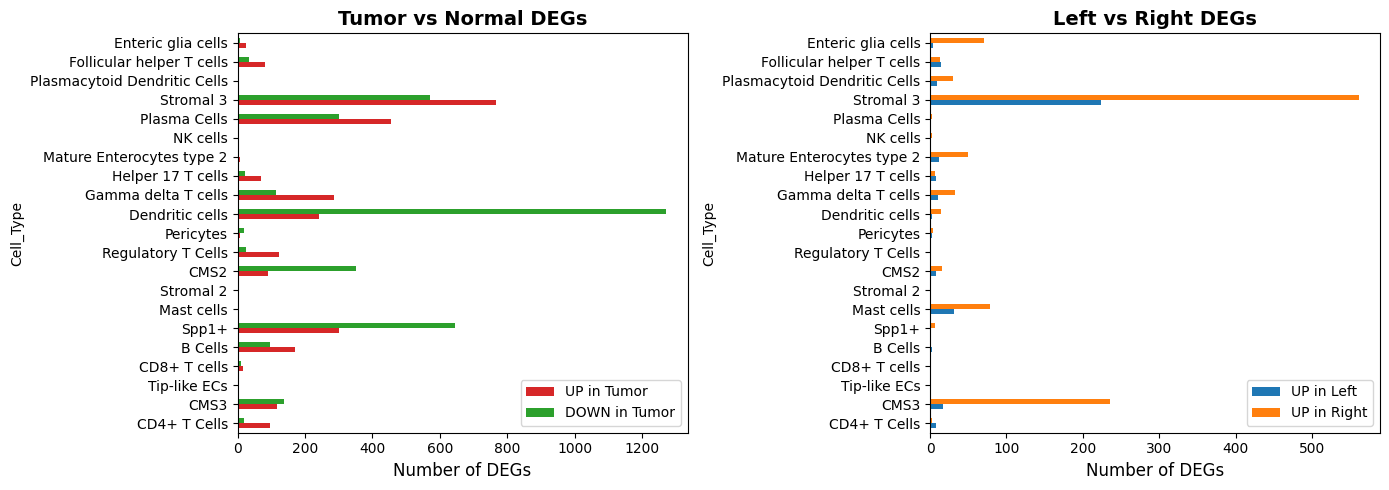


VIZ 2: LOG FOLD CHANGE DISTRIBUTIONS


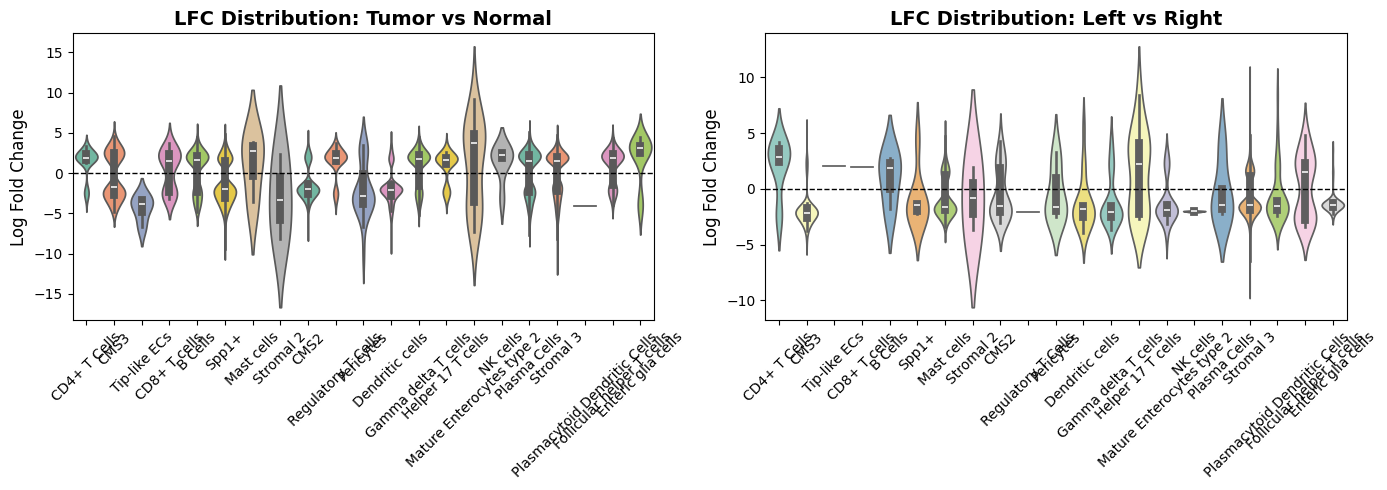


VIZ 3: TOP 20 GENES ACROSS ALL CELL TYPES


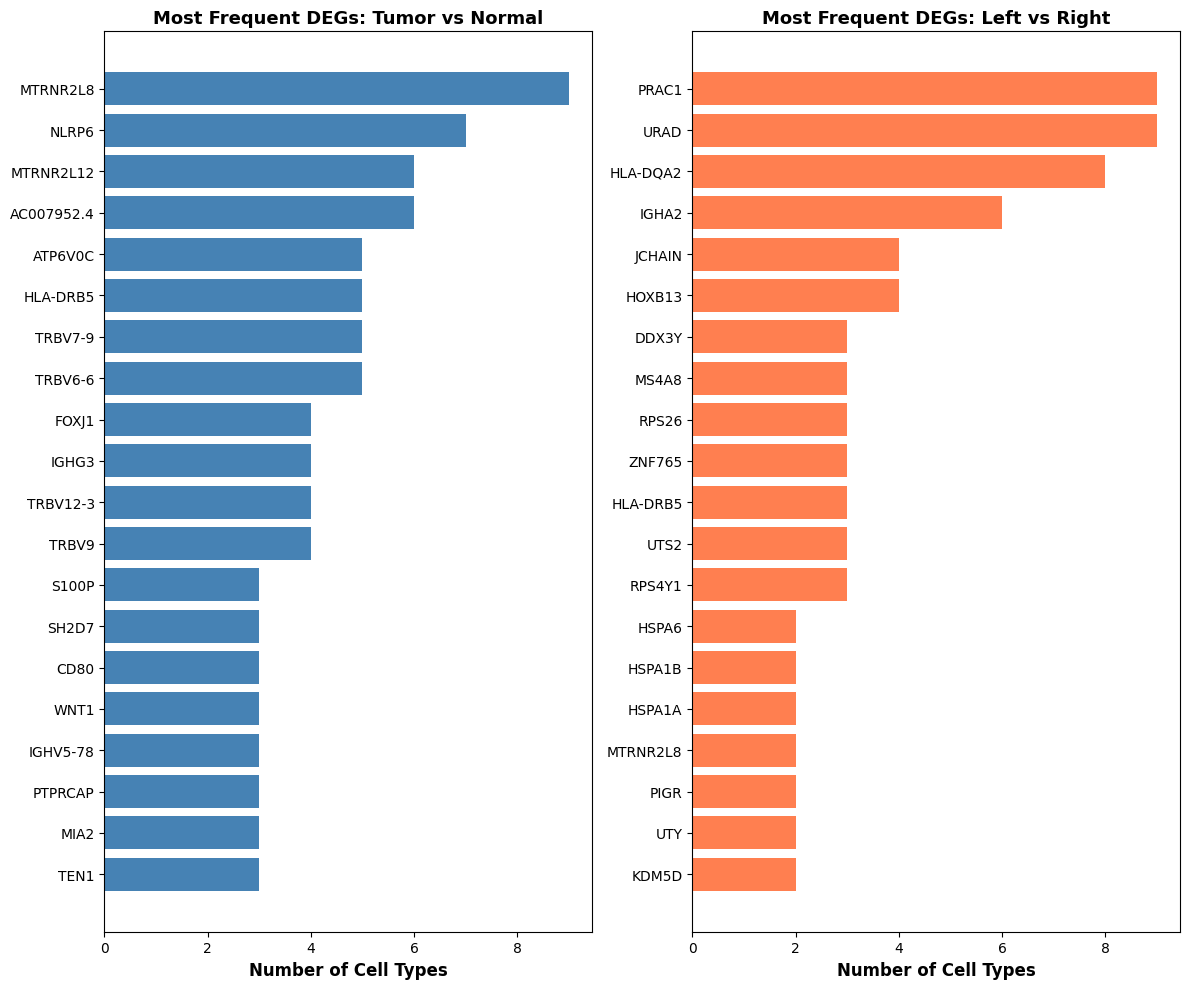


VIZ 5: EFFECT SIZE VS EVIDENCE (LFC vs Bayes Factor)


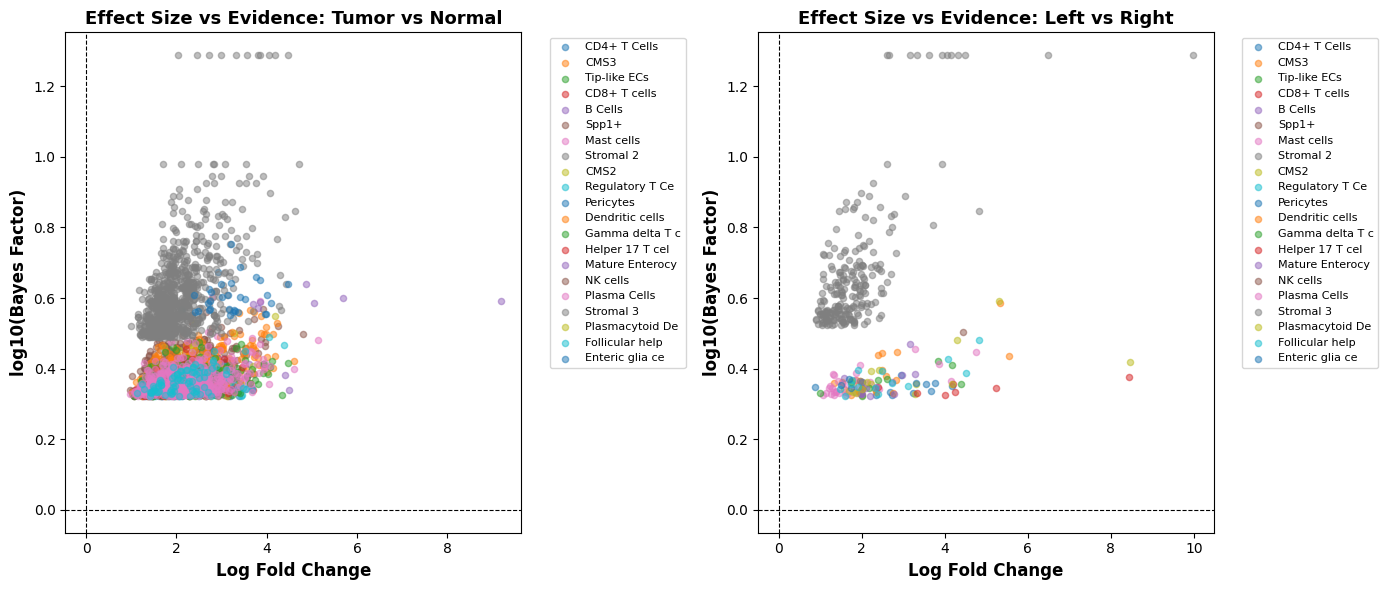


VIZ 6: SHARED DEGs BETWEEN CELL TYPES


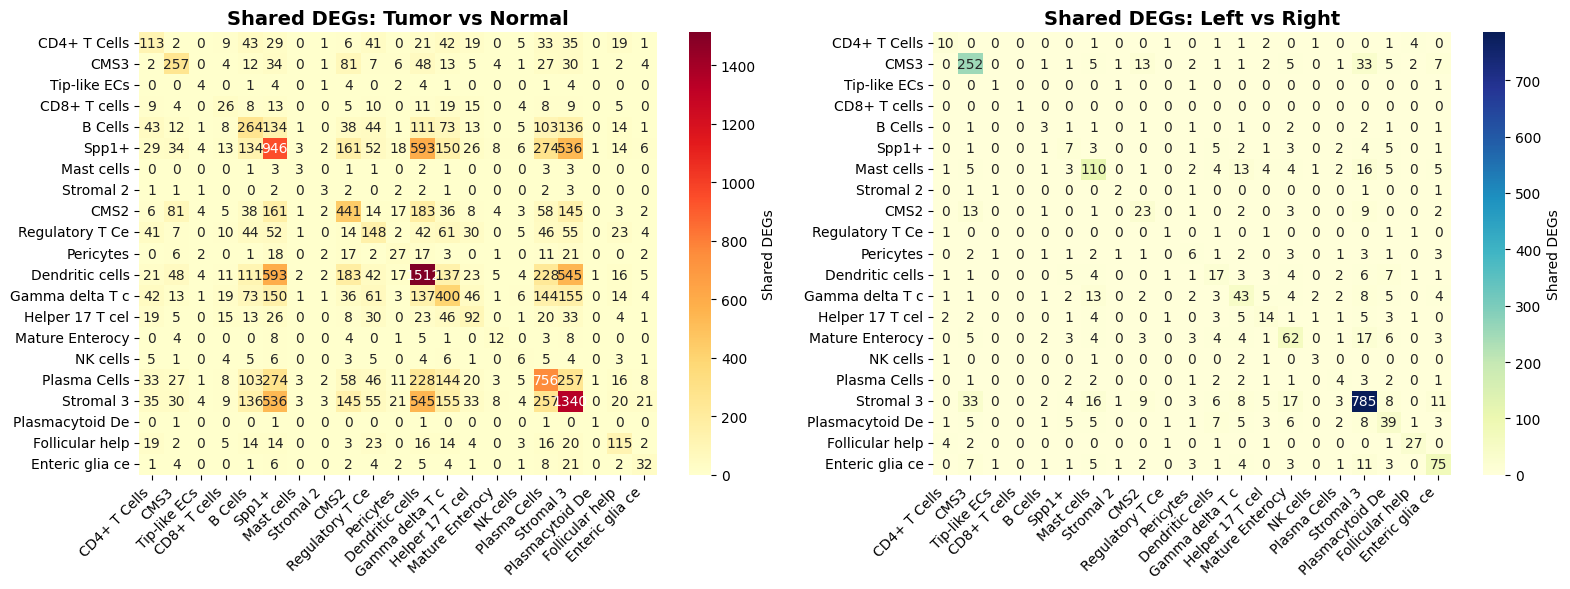


VIZ 7: DOT PLOT OF TOP DEGS


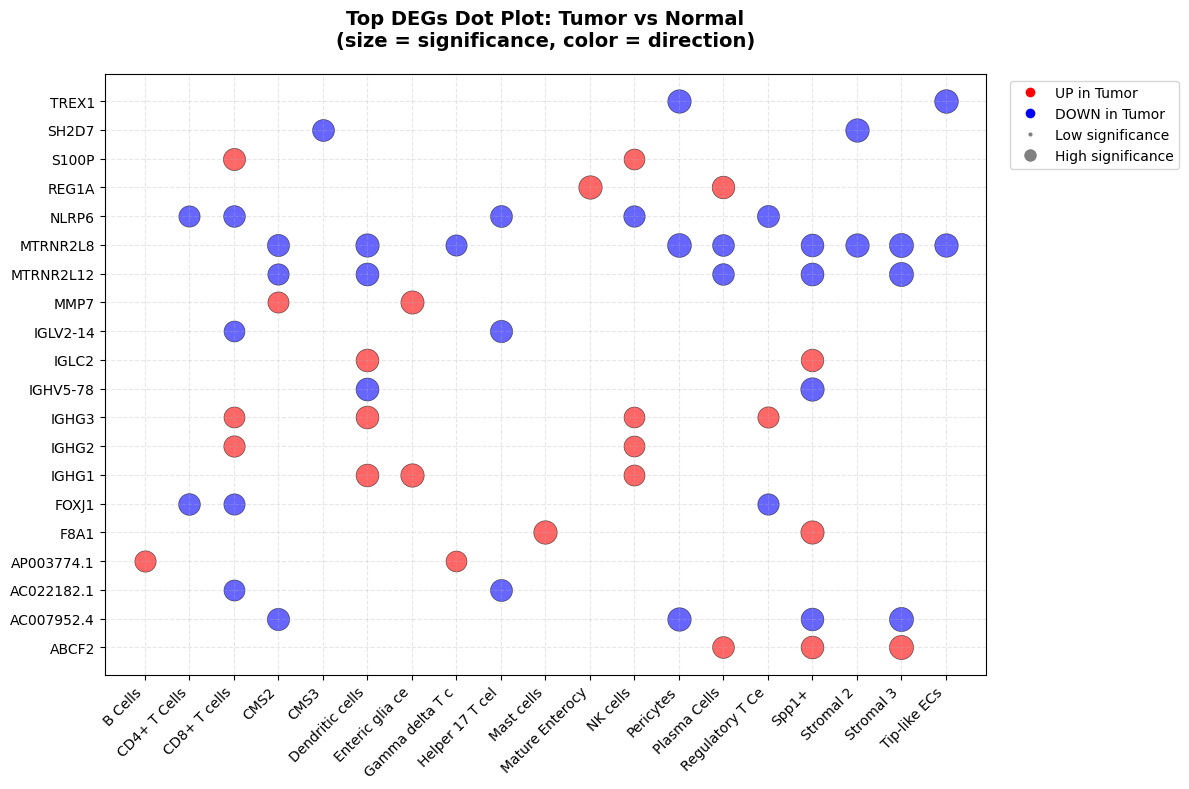


VIZ 8: RIDGE PLOT OF LFC DISTRIBUTIONS


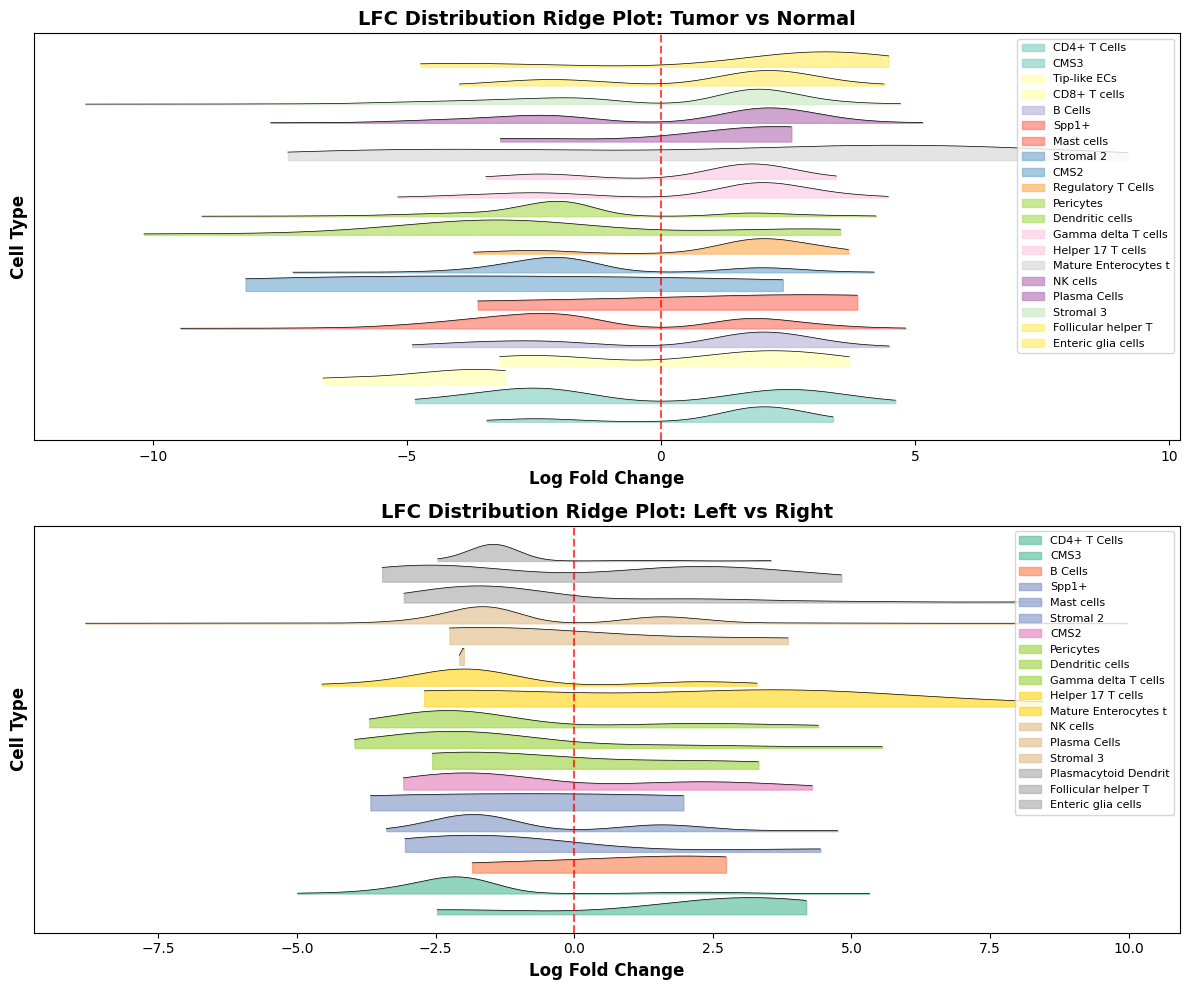


✅ ALL ADDITIONAL VISUALIZATIONS COMPLETE!

Generated files:
  1. scvi_summary_barplots.pdf - DEG counts per cell type
  2. scvi_lfc_distributions.pdf - Violin plots of LFC
  3. scvi_top_genes_frequency.pdf - Most common DEGs across cell types
  4. scvi_probability_distributions.pdf - scVI-specific metrics
  5. scvi_lfc_vs_bayes.pdf - Effect size vs evidence
  6. scvi_shared_degs_matrix.pdf - Overlap between cell types
  7. scvi_dotplot_tumor_vs_normal.pdf - Dot plot of top DEGs
  8. scvi_ridge_plot_lfc.pdf - LFC distribution ridge plot


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ============================================================================
# VISUALIZATION 1: SUMMARY BAR PLOTS
# ============================================================================

print("="*70)
print("VIZ 1: DEG COUNT COMPARISON ACROSS CELL TYPES")
print("="*70)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Tumor vs Normal
summary_tumor = []
for cell_type, de_df in filtered_de_results.items():
    summary_tumor.append({
        'Cell_Type': cell_type,
        'UP in Tumor': (de_df['lfc_mean'] > 0).sum(),
        'DOWN in Tumor': (de_df['lfc_mean'] < 0).sum()
    })

df_tumor = pd.DataFrame(summary_tumor).set_index('Cell_Type')
df_tumor.plot(kind='barh', stacked=False, ax=axes[0], color=['#d62728', '#2ca02c'])
axes[0].set_title('Tumor vs Normal DEGs', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Number of DEGs', fontsize=12)
axes[0].legend(loc='lower right')

# Left vs Right
summary_location = []
for cell_type, de_df in filtered_de_results_location.items():
    summary_location.append({
        'Cell_Type': cell_type,
        'UP in Left': (de_df['lfc_mean'] > 0).sum(),
        'UP in Right': (de_df['lfc_mean'] < 0).sum()
    })

df_location = pd.DataFrame(summary_location).set_index('Cell_Type')
df_location.plot(kind='barh', stacked=False, ax=axes[1], color=['#1f77b4', '#ff7f0e'])
axes[1].set_title('Left vs Right DEGs', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Number of DEGs', fontsize=12)
axes[1].legend(loc='lower right')

plt.tight_layout()
plt.savefig('scvi_summary_barplots.pdf', dpi=300, bbox_inches='tight')
plt.show()


# ============================================================================
# VISUALIZATION 2: EFFECT SIZE DISTRIBUTIONS
# ============================================================================

print("\n" + "="*70)
print("VIZ 2: LOG FOLD CHANGE DISTRIBUTIONS")
print("="*70)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Tumor vs Normal
all_lfc_tumor = []
for cell_type, de_df in filtered_de_results.items():
    for lfc in de_df['lfc_mean']:
        all_lfc_tumor.append({'Cell_Type': cell_type, 'LFC': lfc})

df_lfc_tumor = pd.DataFrame(all_lfc_tumor)
sns.violinplot(data=df_lfc_tumor, x='Cell_Type', y='LFC', ax=axes[0], palette='Set2')
axes[0].axhline(y=0, color='black', linestyle='--', linewidth=1)
axes[0].set_title('LFC Distribution: Tumor vs Normal', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Log Fold Change', fontsize=12)
axes[0].set_xlabel('')
axes[0].tick_params(axis='x', rotation=45)

# Left vs Right
all_lfc_location = []
for cell_type, de_df in filtered_de_results_location.items():
    for lfc in de_df['lfc_mean']:
        all_lfc_location.append({'Cell_Type': cell_type, 'LFC': lfc})

df_lfc_location = pd.DataFrame(all_lfc_location)
sns.violinplot(data=df_lfc_location, x='Cell_Type', y='LFC', ax=axes[1], palette='Set3')
axes[1].axhline(y=0, color='black', linestyle='--', linewidth=1)
axes[1].set_title('LFC Distribution: Left vs Right', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Log Fold Change', fontsize=12)
axes[1].set_xlabel('')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('scvi_lfc_distributions.pdf', dpi=300, bbox_inches='tight')
plt.show()


# ============================================================================
# VISUALIZATION 3: TOP GENES ACROSS ALL CELL TYPES
# ============================================================================

print("\n" + "="*70)
print("VIZ 3: TOP 20 GENES ACROSS ALL CELL TYPES")
print("="*70)

fig, axes = plt.subplots(1, 2, figsize=(12, 10))

# Tumor vs Normal - Count how many cell types each gene appears in
gene_counts_tumor = {}
for cell_type, de_df in filtered_de_results.items():
    for gene in de_df.index[:20]:  # Top 20 per cell type
        gene_counts_tumor[gene] = gene_counts_tumor.get(gene, 0) + 1

top_genes_tumor = sorted(gene_counts_tumor.items(), key=lambda x: x[1], reverse=True)[:20]
genes_tumor = [g[0] for g in top_genes_tumor]
counts_tumor = [g[1] for g in top_genes_tumor]

axes[0].barh(genes_tumor, counts_tumor, color='steelblue')
axes[0].set_xlabel('Number of Cell Types', fontsize=12, fontweight='bold')
axes[0].set_title('Most Frequent DEGs: Tumor vs Normal', fontsize=13, fontweight='bold')
axes[0].invert_yaxis()

# Left vs Right
gene_counts_location = {}
for cell_type, de_df in filtered_de_results_location.items():
    for gene in de_df.index[:20]:
        gene_counts_location[gene] = gene_counts_location.get(gene, 0) + 1

top_genes_location = sorted(gene_counts_location.items(), key=lambda x: x[1], reverse=True)[:20]
genes_location = [g[0] for g in top_genes_location]
counts_location = [g[1] for g in top_genes_location]

axes[1].barh(genes_location, counts_location, color='coral')
axes[1].set_xlabel('Number of Cell Types', fontsize=12, fontweight='bold')
axes[1].set_title('Most Frequent DEGs: Left vs Right', fontsize=13, fontweight='bold')
axes[1].invert_yaxis()

plt.tight_layout()
plt.savefig('scvi_top_genes_frequency.pdf', dpi=300, bbox_inches='tight')
plt.show()


# ============================================================================



# ============================================================================
# VISUALIZATION 5: SCATTER PLOT - LFC vs Bayes Factor
# ============================================================================

print("\n" + "="*70)
print("VIZ 5: EFFECT SIZE VS EVIDENCE (LFC vs Bayes Factor)")
print("="*70)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Tumor vs Normal
for cell_type, de_df in filtered_de_results.items():
    if 'bayes_factor' in de_df.columns:
        axes[0].scatter(
            de_df['lfc_mean'],
            np.log10(de_df['bayes_factor'] + 1),
            alpha=0.5,
            s=20,
            label=cell_type[:15]
        )
axes[0].set_xlabel('Log Fold Change', fontsize=12, fontweight='bold')
axes[0].set_ylabel('log10(Bayes Factor)', fontsize=12, fontweight='bold')
axes[0].set_title('Effect Size vs Evidence: Tumor vs Normal', fontsize=13, fontweight='bold')
axes[0].axvline(x=0, color='black', linestyle='--', linewidth=0.8)
axes[0].axhline(y=0, color='black', linestyle='--', linewidth=0.8)
axes[0].legend(fontsize=8, bbox_to_anchor=(1.05, 1), loc='upper left')

# Left vs Right
for cell_type, de_df in filtered_de_results_location.items():
    if 'bayes_factor' in de_df.columns:
        axes[1].scatter(
            de_df['lfc_mean'],
            np.log10(de_df['bayes_factor'] + 1),
            alpha=0.5,
            s=20,
            label=cell_type[:15]
        )
axes[1].set_xlabel('Log Fold Change', fontsize=12, fontweight='bold')
axes[1].set_ylabel('log10(Bayes Factor)', fontsize=12, fontweight='bold')
axes[1].set_title('Effect Size vs Evidence: Left vs Right', fontsize=13, fontweight='bold')
axes[1].axvline(x=0, color='black', linestyle='--', linewidth=0.8)
axes[1].axhline(y=0, color='black', linestyle='--', linewidth=0.8)
axes[1].legend(fontsize=8, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.savefig('scvi_lfc_vs_bayes.pdf', dpi=300, bbox_inches='tight')
plt.show()


# ============================================================================
# VISUALIZATION 6: COMPARISON MATRIX (Shared DEGs between cell types)
# ============================================================================

print("\n" + "="*70)
print("VIZ 6: SHARED DEGs BETWEEN CELL TYPES")
print("="*70)

# Tumor vs Normal
cell_types_tumor = list(filtered_de_results.keys())
n_ct = len(cell_types_tumor)
overlap_matrix = np.zeros((n_ct, n_ct))

for i, ct1 in enumerate(cell_types_tumor):
    genes1 = set(filtered_de_results[ct1].index)
    for j, ct2 in enumerate(cell_types_tumor):
        genes2 = set(filtered_de_results[ct2].index)
        overlap = len(genes1.intersection(genes2))
        overlap_matrix[i, j] = overlap

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Heatmap for Tumor vs Normal
sns.heatmap(
    overlap_matrix,
    annot=True,
    fmt='.0f',
    cmap='YlOrRd',
    xticklabels=[ct[:15] for ct in cell_types_tumor],
    yticklabels=[ct[:15] for ct in cell_types_tumor],
    ax=axes[0],
    cbar_kws={'label': 'Shared DEGs'}
)
axes[0].set_title('Shared DEGs: Tumor vs Normal', fontsize=14, fontweight='bold')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
axes[0].set_yticklabels(axes[0].get_yticklabels(), rotation=0)

# Left vs Right
cell_types_location = list(filtered_de_results_location.keys())
n_ct_loc = len(cell_types_location)
overlap_matrix_loc = np.zeros((n_ct_loc, n_ct_loc))

for i, ct1 in enumerate(cell_types_location):
    genes1 = set(filtered_de_results_location[ct1].index)
    for j, ct2 in enumerate(cell_types_location):
        genes2 = set(filtered_de_results_location[ct2].index)
        overlap = len(genes1.intersection(genes2))
        overlap_matrix_loc[i, j] = overlap

sns.heatmap(
    overlap_matrix_loc,
    annot=True,
    fmt='.0f',
    cmap='YlGnBu',
    xticklabels=[ct[:15] for ct in cell_types_location],
    yticklabels=[ct[:15] for ct in cell_types_location],
    ax=axes[1],
    cbar_kws={'label': 'Shared DEGs'}
)
axes[1].set_title('Shared DEGs: Left vs Right', fontsize=14, fontweight='bold')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')
axes[1].set_yticklabels(axes[1].get_yticklabels(), rotation=0)

plt.tight_layout()
plt.savefig('scvi_shared_degs_matrix.pdf', dpi=300, bbox_inches='tight')
plt.show()


# ============================================================================
# VISUALIZATION 7: DOT PLOT - Top genes across cell types
# ============================================================================

print("\n" + "="*70)
print("VIZ 7: DOT PLOT OF TOP DEGS")
print("="*70)

# Create dot plot for Tumor vs Normal
top_n = 10
all_top_genes_tumor = []

for cell_type, de_df in filtered_de_results.items():
    # Get top genes by absolute LFC
    top_up = de_df[de_df['lfc_mean'] > 0].nlargest(top_n//2, 'lfc_mean')
    top_down = de_df[de_df['lfc_mean'] < 0].nsmallest(top_n//2, 'lfc_mean')
    
    for gene_name, gene_data in pd.concat([top_up, top_down]).iterrows():
        all_top_genes_tumor.append({
            'Gene': gene_name,
            'Cell_Type': cell_type,
            'LFC': gene_data['lfc_mean'],
            'Significance': gene_data.get('proba_de', 0.5)
        })

if len(all_top_genes_tumor) > 0:
    df_dot = pd.DataFrame(all_top_genes_tumor)
    
    # Get most frequent genes
    gene_freq = df_dot['Gene'].value_counts()
    top_genes = gene_freq.head(20).index.tolist()
    
    df_dot_filtered = df_dot[df_dot['Gene'].isin(top_genes)]
    
    # Create pivot for plotting
    pivot_lfc = df_dot_filtered.pivot_table(
        index='Gene',
        columns='Cell_Type',
        values='LFC',
        aggfunc='first'
    )
    
    pivot_sig = df_dot_filtered.pivot_table(
        index='Gene',
        columns='Cell_Type',
        values='Significance',
        aggfunc='first'
    )
    
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Create dot plot manually
    for i, gene in enumerate(pivot_lfc.index):
        for j, ct in enumerate(pivot_lfc.columns):
            lfc = pivot_lfc.loc[gene, ct]
            sig = pivot_sig.loc[gene, ct]
            
            if pd.notna(lfc):
                color = 'red' if lfc > 0 else 'blue'
                size = sig * 300 if pd.notna(sig) else 50
                ax.scatter(j, i, s=size, c=color, alpha=0.6, edgecolors='black', linewidths=0.5)
    
    ax.set_xticks(range(len(pivot_lfc.columns)))
    ax.set_xticklabels([ct[:15] for ct in pivot_lfc.columns], rotation=45, ha='right')
    ax.set_yticks(range(len(pivot_lfc.index)))
    ax.set_yticklabels(pivot_lfc.index)
    ax.set_title('Top DEGs Dot Plot: Tumor vs Normal\n(size = significance, color = direction)', 
                 fontsize=14, fontweight='bold', pad=20)
    ax.grid(alpha=0.3, linestyle='--')
    
    # Add legend
    from matplotlib.lines import Line2D
    legend_elements = [
        Line2D([0], [0], marker='o', color='w', markerfacecolor='red', 
               markersize=8, label='UP in Tumor'),
        Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', 
               markersize=8, label='DOWN in Tumor'),
        Line2D([0], [0], marker='o', color='w', markerfacecolor='gray', 
               markersize=4, label='Low significance'),
        Line2D([0], [0], marker='o', color='w', markerfacecolor='gray', 
               markersize=10, label='High significance')
    ]
    ax.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1.02, 1))
    
    plt.tight_layout()
    plt.savefig('scvi_dotplot_tumor_vs_normal.pdf', dpi=300, bbox_inches='tight')
    plt.show()


# ============================================================================
# VISUALIZATION 8: Ridge Plot - LFC distributions
# ============================================================================

print("\n" + "="*70)
print("VIZ 8: RIDGE PLOT OF LFC DISTRIBUTIONS")
print("="*70)

fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Tumor vs Normal
y_pos = 0
colors = plt.cm.Set3(np.linspace(0, 1, len(filtered_de_results)))

for idx, (cell_type, de_df) in enumerate(filtered_de_results.items()):
    lfc_values = de_df['lfc_mean'].values
    
    # Create density plot
    from scipy.stats import gaussian_kde
    if len(lfc_values) > 1:
        kde = gaussian_kde(lfc_values)
        x_range = np.linspace(lfc_values.min(), lfc_values.max(), 200)
        density = kde(x_range)
        
        # Normalize and offset
        density = density / density.max() * 0.8
        
        axes[0].fill_between(x_range, y_pos, y_pos + density, 
                            alpha=0.7, color=colors[idx], label=cell_type[:20])
        axes[0].plot(x_range, y_pos + density, color='black', linewidth=0.5)
        
        y_pos += 1

axes[0].axvline(x=0, color='red', linestyle='--', linewidth=1.5, alpha=0.7)
axes[0].set_xlabel('Log Fold Change', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Cell Type', fontsize=12, fontweight='bold')
axes[0].set_title('LFC Distribution Ridge Plot: Tumor vs Normal', 
                  fontsize=14, fontweight='bold')
axes[0].set_yticks([])
axes[0].legend(loc='upper right', fontsize=8)

# Left vs Right
y_pos = 0
colors_loc = plt.cm.Set2(np.linspace(0, 1, len(filtered_de_results_location)))

for idx, (cell_type, de_df) in enumerate(filtered_de_results_location.items()):
    lfc_values = de_df['lfc_mean'].values
    
    if len(lfc_values) > 1:
        kde = gaussian_kde(lfc_values)
        x_range = np.linspace(lfc_values.min(), lfc_values.max(), 200)
        density = kde(x_range)
        density = density / density.max() * 0.8
        
        axes[1].fill_between(x_range, y_pos, y_pos + density, 
                            alpha=0.7, color=colors_loc[idx], label=cell_type[:20])
        axes[1].plot(x_range, y_pos + density, color='black', linewidth=0.5)
        
        y_pos += 1

axes[1].axvline(x=0, color='red', linestyle='--', linewidth=1.5, alpha=0.7)
axes[1].set_xlabel('Log Fold Change', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Cell Type', fontsize=12, fontweight='bold')
axes[1].set_title('LFC Distribution Ridge Plot: Left vs Right', 
                  fontsize=14, fontweight='bold')
axes[1].set_yticks([])
axes[1].legend(loc='upper right', fontsize=8)

plt.tight_layout()
plt.savefig('scvi_ridge_plot_lfc.pdf', dpi=300, bbox_inches='tight')
plt.show()

print("\n" + "="*70)
print("✅ ALL ADDITIONAL VISUALIZATIONS COMPLETE!")
print("="*70)
print("\nGenerated files:")
print("  1. scvi_summary_barplots.pdf - DEG counts per cell type")
print("  2. scvi_lfc_distributions.pdf - Violin plots of LFC")
print("  3. scvi_top_genes_frequency.pdf - Most common DEGs across cell types")
print("  4. scvi_probability_distributions.pdf - scVI-specific metrics")
print("  5. scvi_lfc_vs_bayes.pdf - Effect size vs evidence")
print("  6. scvi_shared_degs_matrix.pdf - Overlap between cell types")
print("  7. scvi_dotplot_tumor_vs_normal.pdf - Dot plot of top DEGs")
print("  8. scvi_ridge_plot_lfc.pdf - LFC distribution ridge plot")
print("="*70)

In [ ]:
# code 8alet
# VISUALIZATION 4: BAYES FACTOR / PROBABILITY DISTRIBUTIONS
# ============================================================================

print("\n" + "="*70)
print("VIZ 4: scVI-SPECIFIC METRICS (Bayes Factor / Probability)")
print("="*70)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Tumor vs Normal - Bayes Factor
for cell_type, de_df in filtered_de_results.items():
    if 'bayes_factor' in de_df.columns:
        axes[0, 0].hist(np.log10(de_df['bayes_factor'] + 1), 
                       alpha=0.5, bins=30, label=cell_type[:15])
axes[0, 0].set_xlabel('log10(Bayes Factor)', fontsize=11, fontweight='bold')
axes[0, 0].set_ylabel('Frequency', fontsize=11, fontweight='bold')
axes[0, 0].set_title('Bayes Factor: Tumor vs Normal', fontsize=12, fontweight='bold')
axes[0, 0].legend(fontsize=8, loc='upper right')

# Tumor vs Normal - Probability DE
for cell_type, de_df in filtered_de_results.items():
    if 'proba_de' in de_df.columns:
        axes[0, 1].hist(de_df['proba_de'], alpha=0.5, bins=30, label=cell_type[:15])
axes[0, 1].set_xlabel('P(DE)', fontsize=11, fontweight='bold')
axes[0, 1].set_ylabel('Frequency', fontsize=11, fontweight='bold')
axes[0, 1].set_title('Probability DE: Tumor vs Normal', fontsize=12, fontweight='bold')
axes[0, 1].legend(fontsize=8, loc='upper left')

# Left vs Right - Bayes Factor
for cell_type, de_df in filtered_de_results_location.items():
    if 'bayes_factor' in de_df.columns:
        axes[1, 0].hist(np.log10(de_df['bayes_factor'] + 1), 
                       alpha=0.5, bins=30, label=cell_type[:15])
axes[1, 0].set_xlabel('log10(Bayes Factor)', fontsize=11, fontweight='bold')
axes[1, 0].set_ylabel('Frequency', fontsize=11, fontweight='bold')
axes[1, 0].set_title('Bayes Factor: Left vs Right', fontsize=12, fontweight='bold')
axes[1, 0].legend(fontsize=8, loc='upper right')

# Left vs Right - Probability DE
for cell_type, de_df in filtered_de_results_location.items():
    if 'proba_de' in de_df.columns:
        axes[1, 1].hist(de_df['proba_de'], alpha=0.5, bins=30, label=cell_type[:15])
axes[1, 1].set_xlabel('P(DE)', fontsize=11, fontweight='bold')
axes[1, 1].set_ylabel('Frequency', fontsize=11, fontweight='bold')
axes[1, 1].set_title('Probability DE: Left vs Right', fontsize=12, fontweight='bold')
axes[1, 1].legend(fontsize=8, loc='upper left')

plt.tight_layout()
plt.savefig('scvi_probability_distributions.pdf', dpi=300, bbox_inches='tight')
plt.show()

CREATING VOLCANO PLOTS: TUMOR VS NORMAL (scVI)


Looks like you are using a tranform that doesn't support FancyArrowPatch, using ax.annotate instead. The arrows might strike through texts. Increasing shrinkA in arrowprops might help.


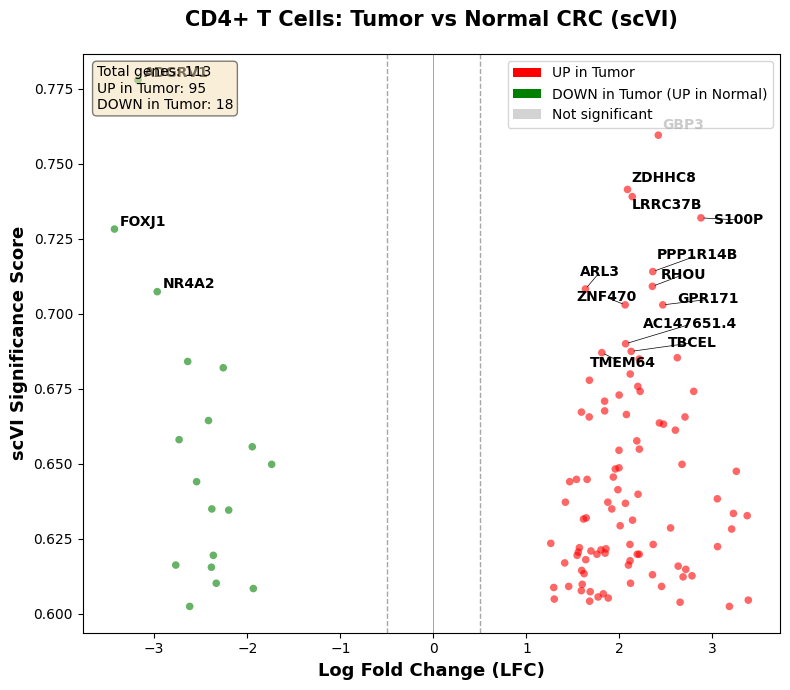


CD4+ T Cells:
  UP in Tumor: 95
  DOWN in Tumor: 18


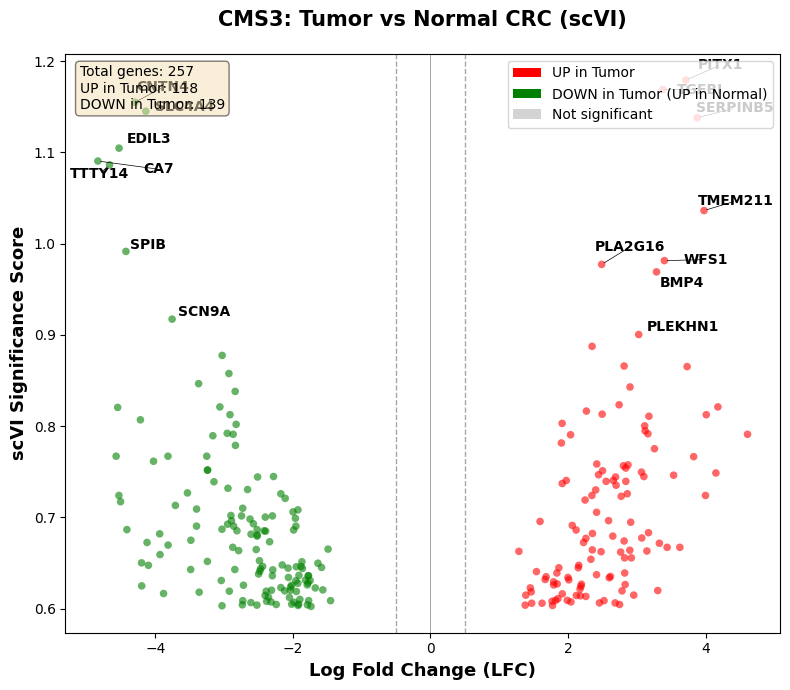


CMS3:
  UP in Tumor: 118
  DOWN in Tumor: 139


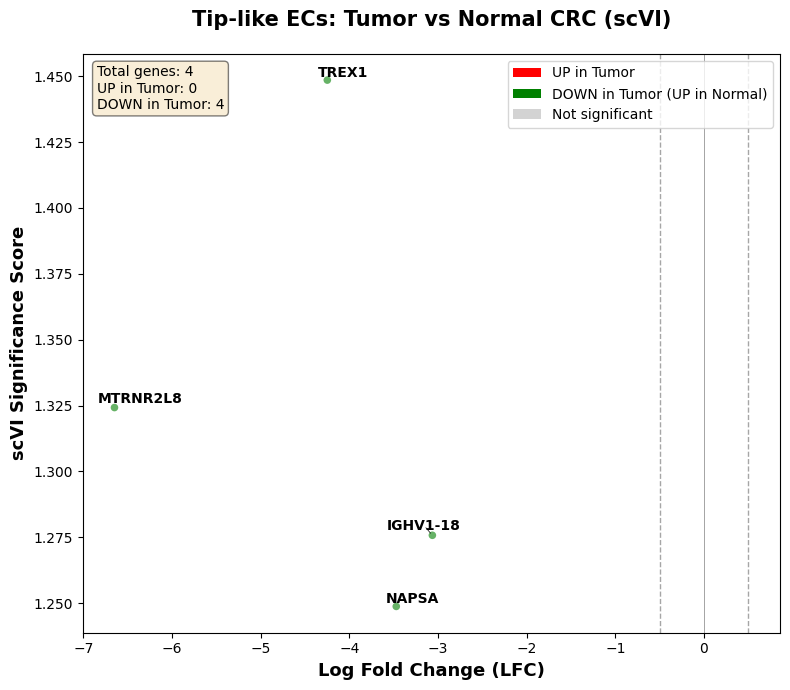


Tip-like ECs:
  UP in Tumor: 0
  DOWN in Tumor: 4


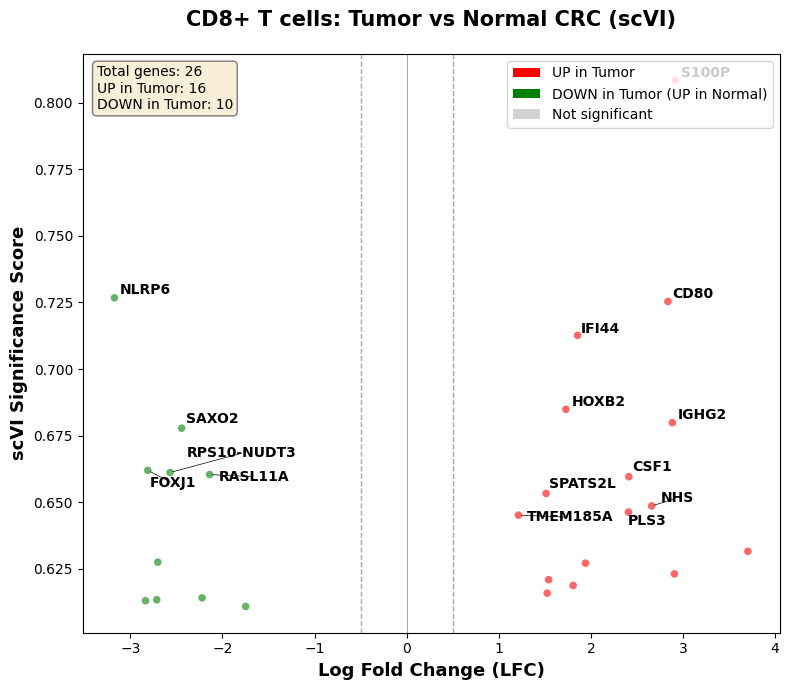


CD8+ T cells:
  UP in Tumor: 16
  DOWN in Tumor: 10


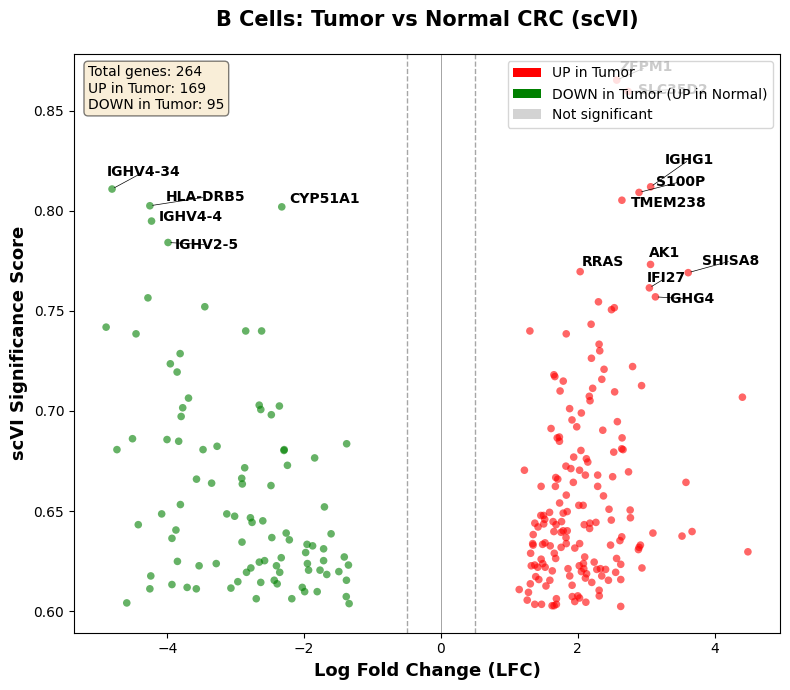


B Cells:
  UP in Tumor: 169
  DOWN in Tumor: 95


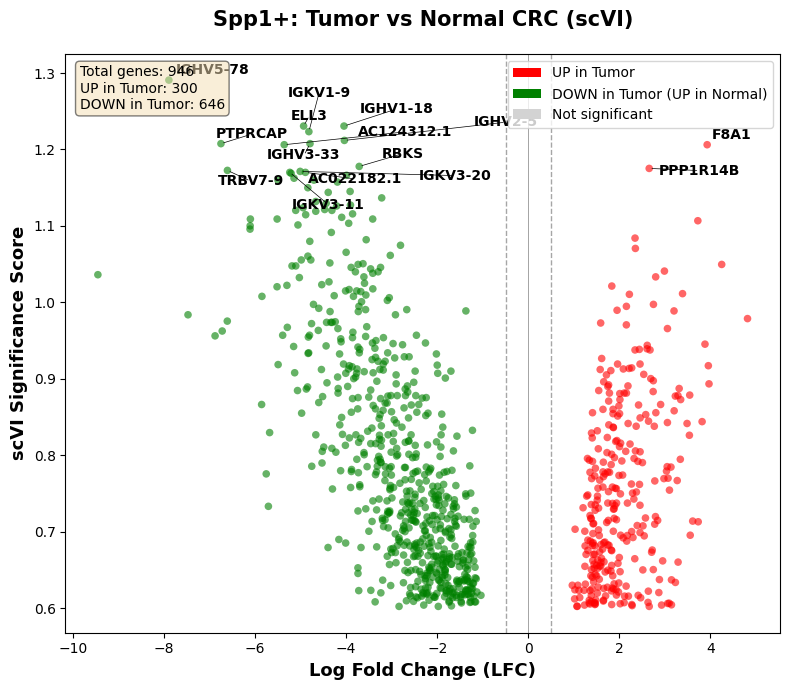


Spp1+:
  UP in Tumor: 300
  DOWN in Tumor: 646


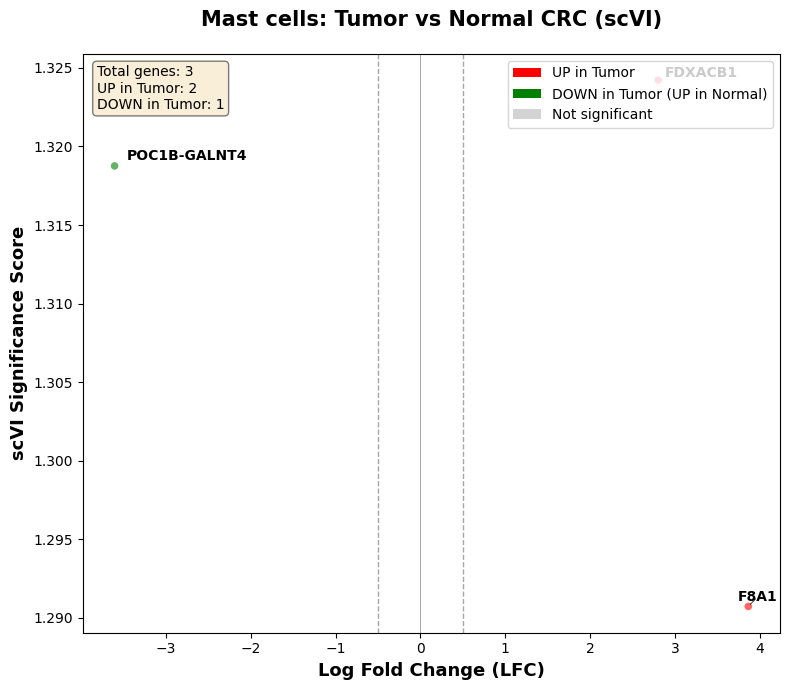


Mast cells:
  UP in Tumor: 2
  DOWN in Tumor: 1


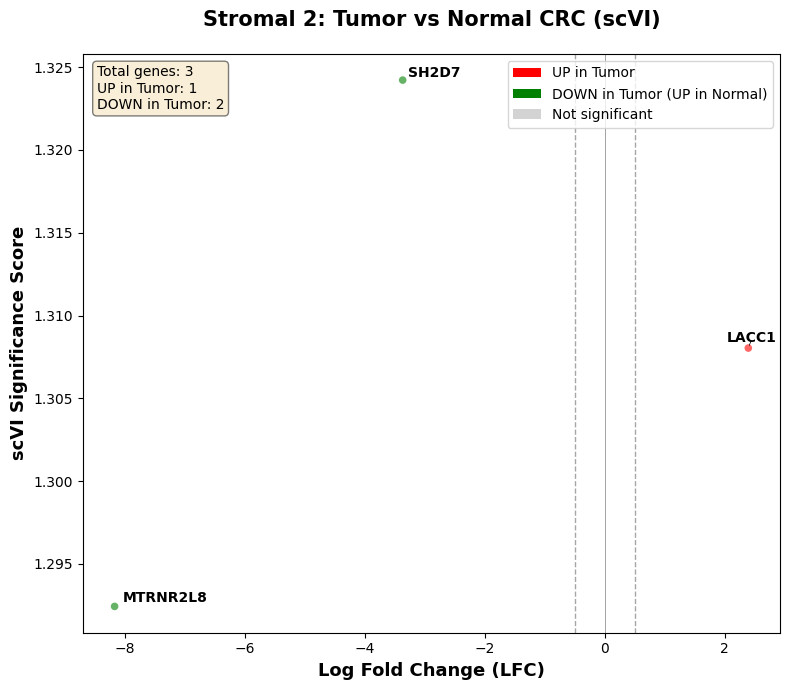


Stromal 2:
  UP in Tumor: 1
  DOWN in Tumor: 2


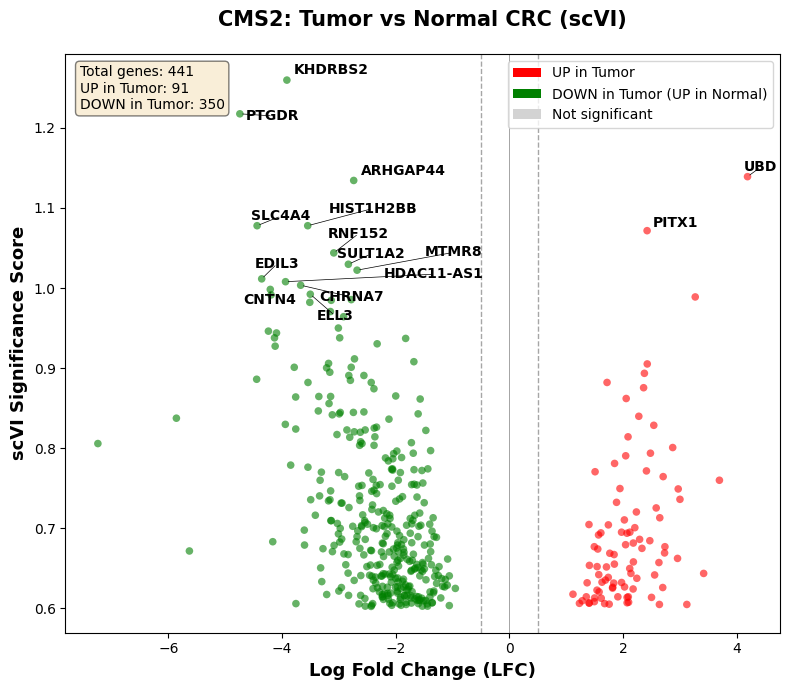


CMS2:
  UP in Tumor: 91
  DOWN in Tumor: 350


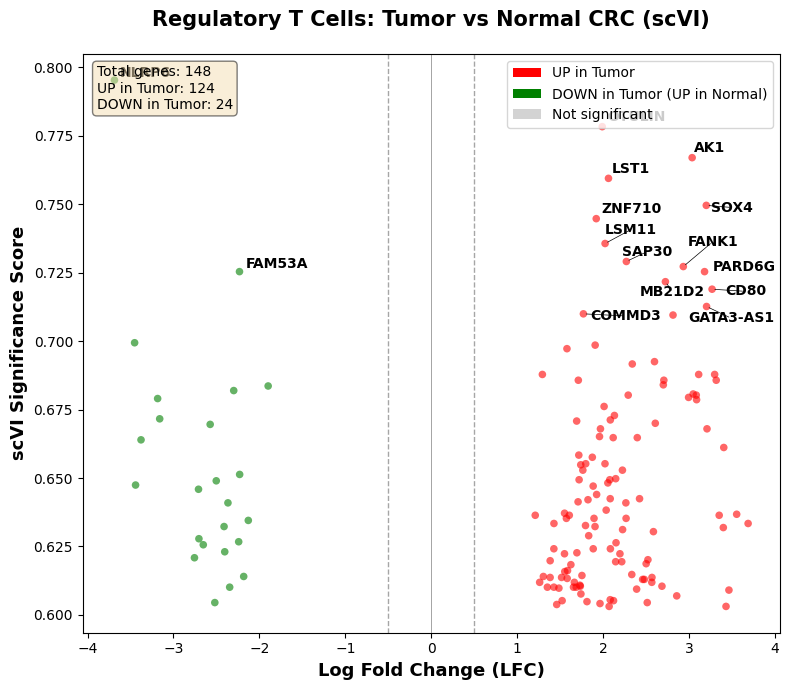


Regulatory T Cells:
  UP in Tumor: 124
  DOWN in Tumor: 24


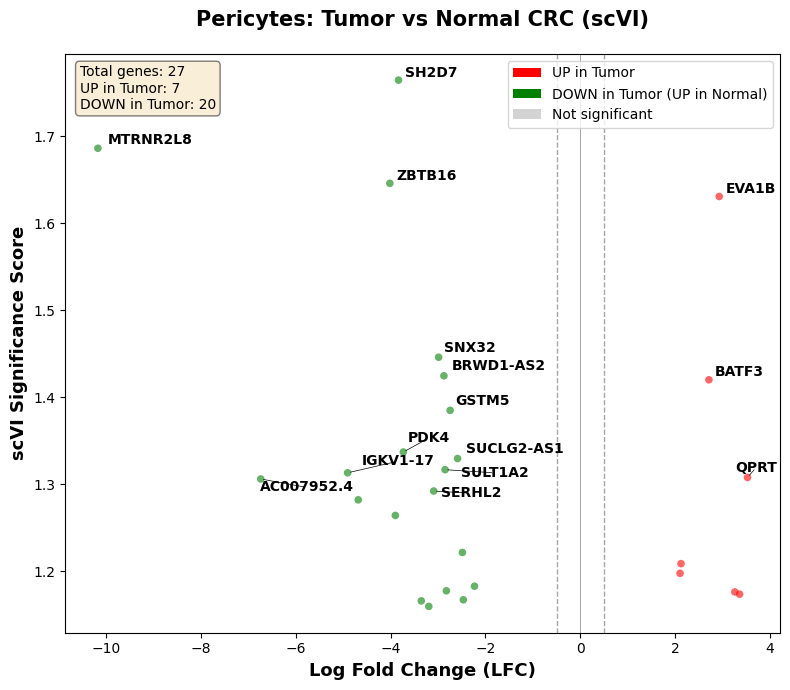


Pericytes:
  UP in Tumor: 7
  DOWN in Tumor: 20


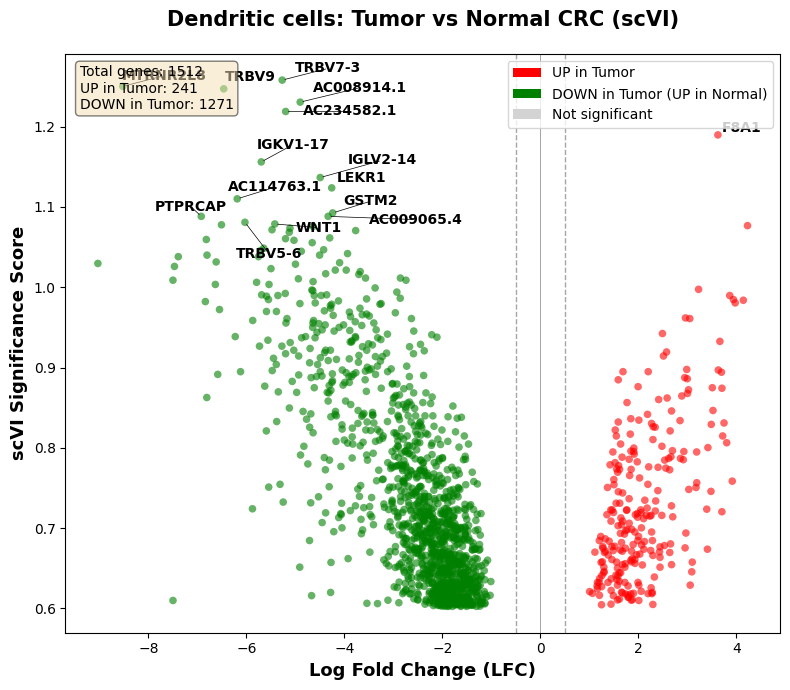


Dendritic cells:
  UP in Tumor: 241
  DOWN in Tumor: 1271


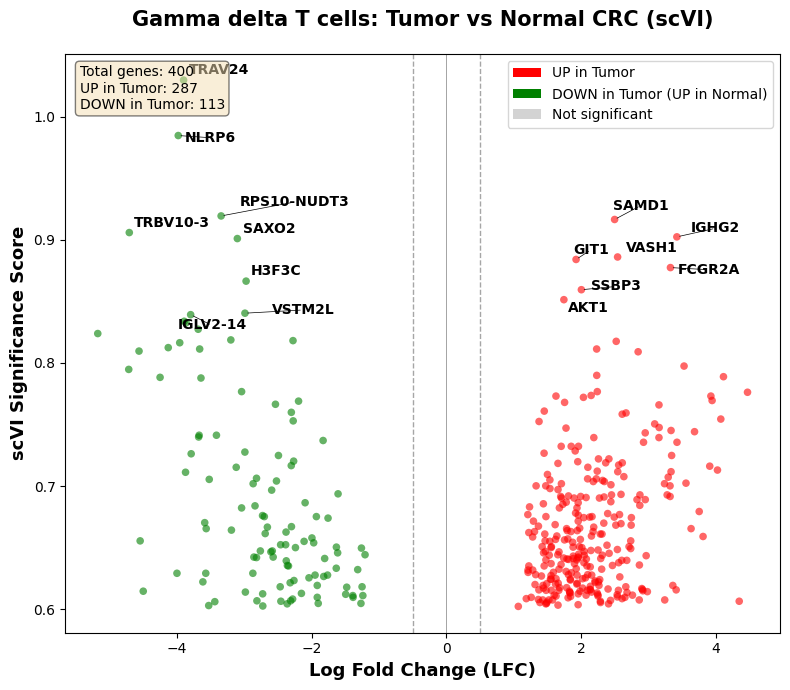


Gamma delta T cells:
  UP in Tumor: 287
  DOWN in Tumor: 113


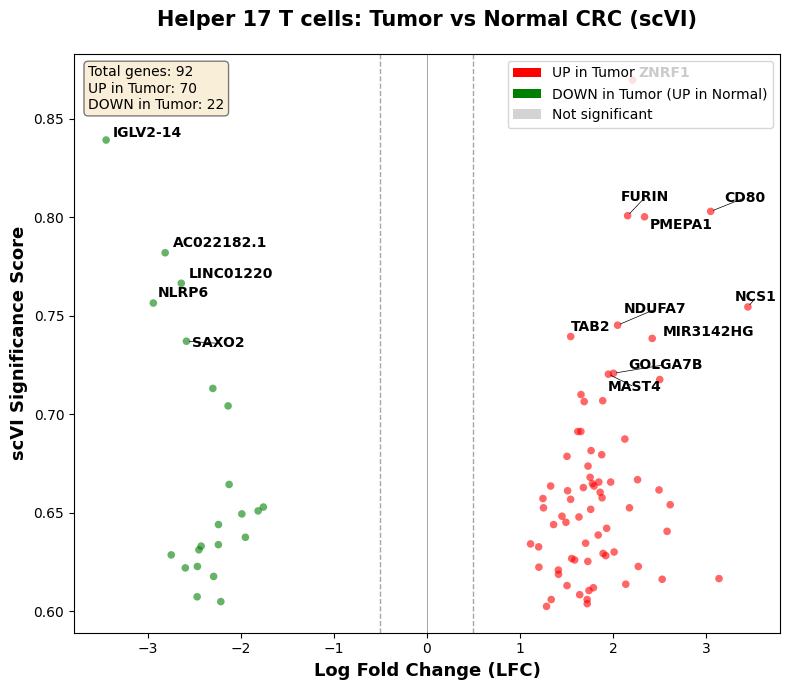


Helper 17 T cells:
  UP in Tumor: 70
  DOWN in Tumor: 22


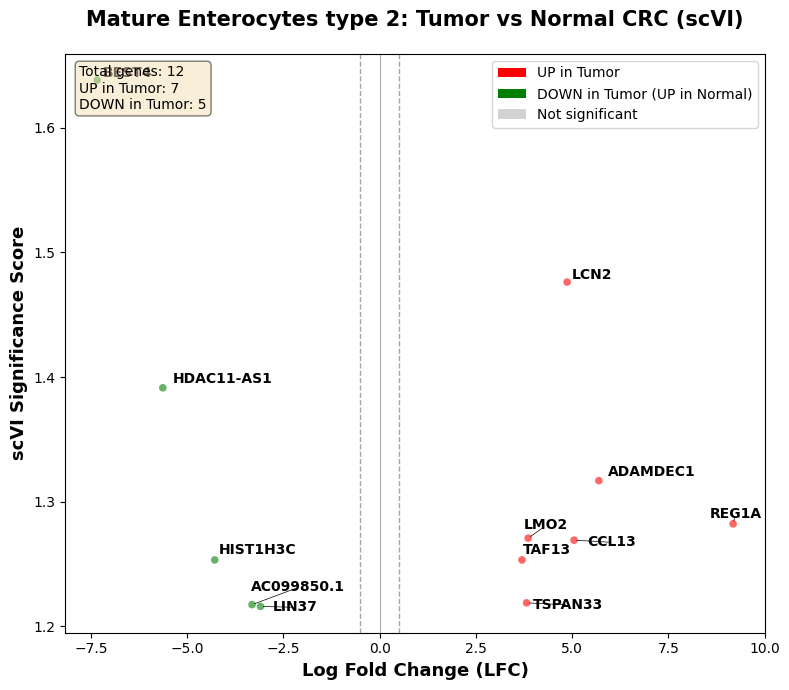


Mature Enterocytes type 2:
  UP in Tumor: 7
  DOWN in Tumor: 5


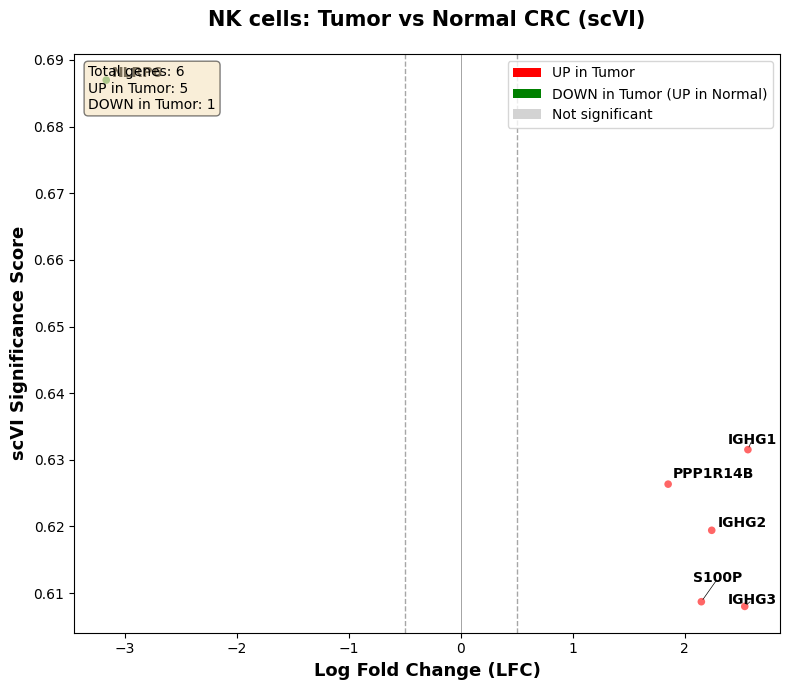


NK cells:
  UP in Tumor: 5
  DOWN in Tumor: 1


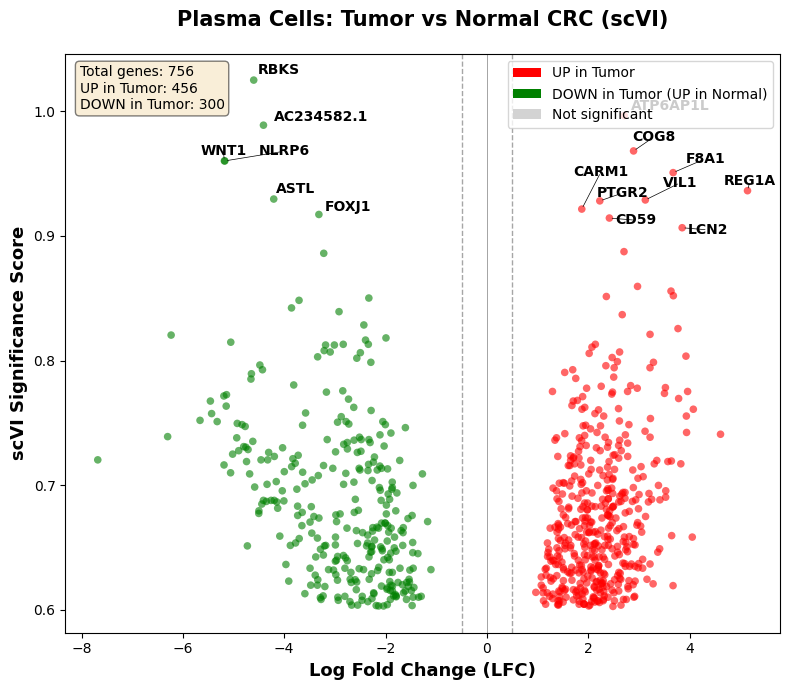


Plasma Cells:
  UP in Tumor: 456
  DOWN in Tumor: 300


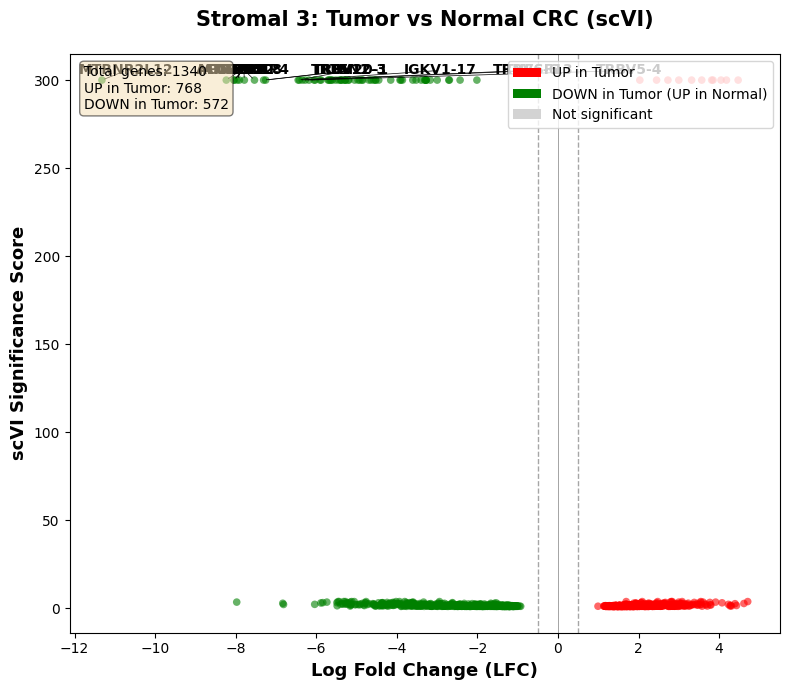


Stromal 3:
  UP in Tumor: 768
  DOWN in Tumor: 572


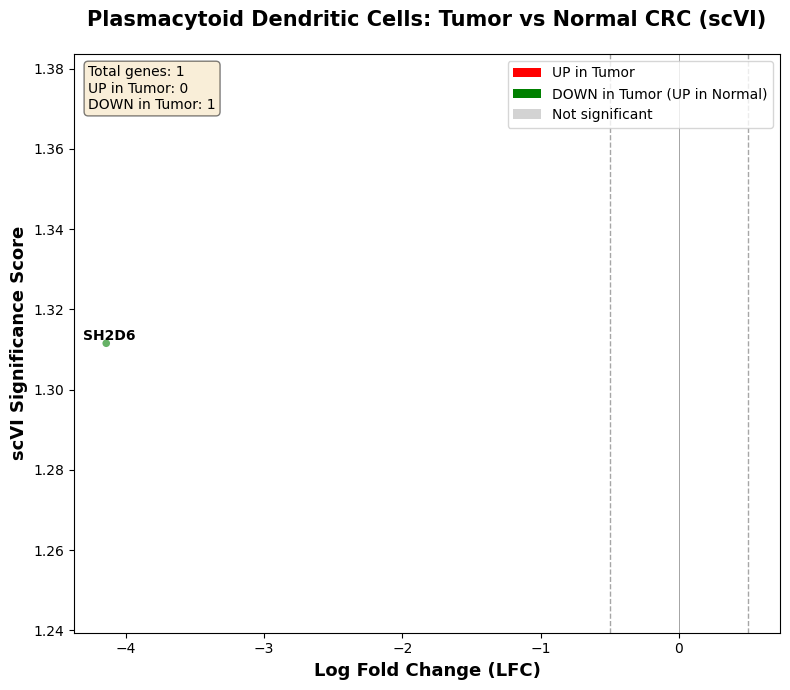


Plasmacytoid Dendritic Cells:
  UP in Tumor: 0
  DOWN in Tumor: 1


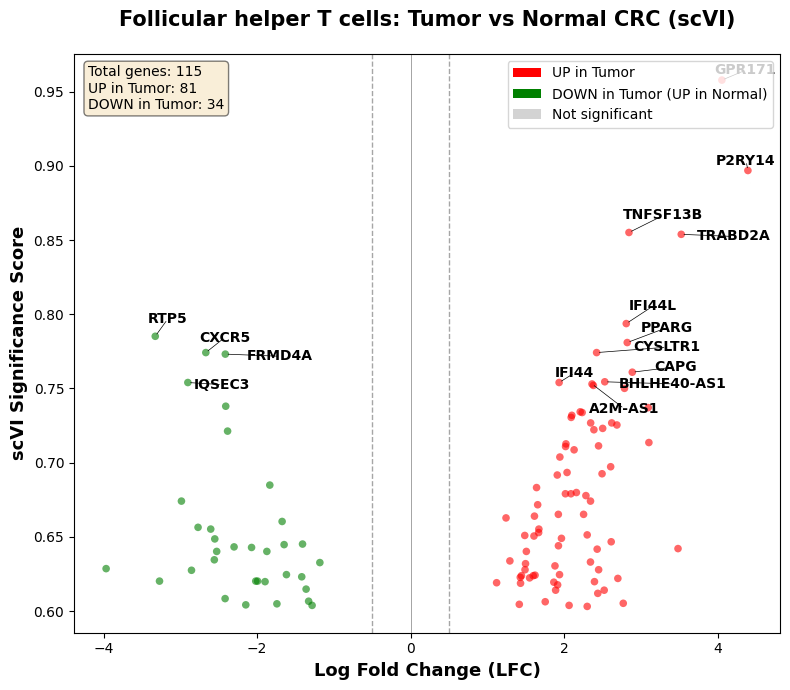


Follicular helper T cells:
  UP in Tumor: 81
  DOWN in Tumor: 34


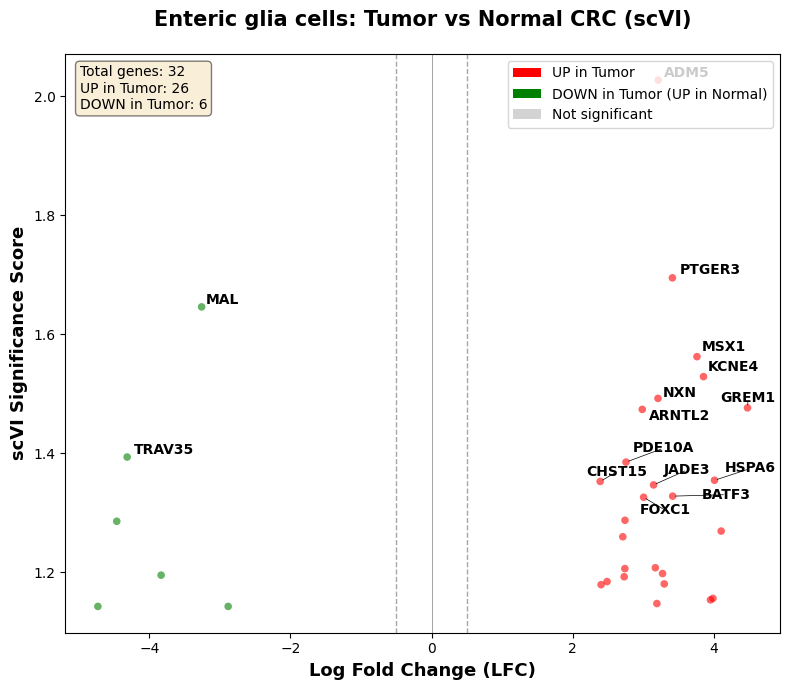


Enteric glia cells:
  UP in Tumor: 26
  DOWN in Tumor: 6

CREATING HEATMAP: TOP DEGs PER CELL TYPE (TUMOR VS NORMAL)


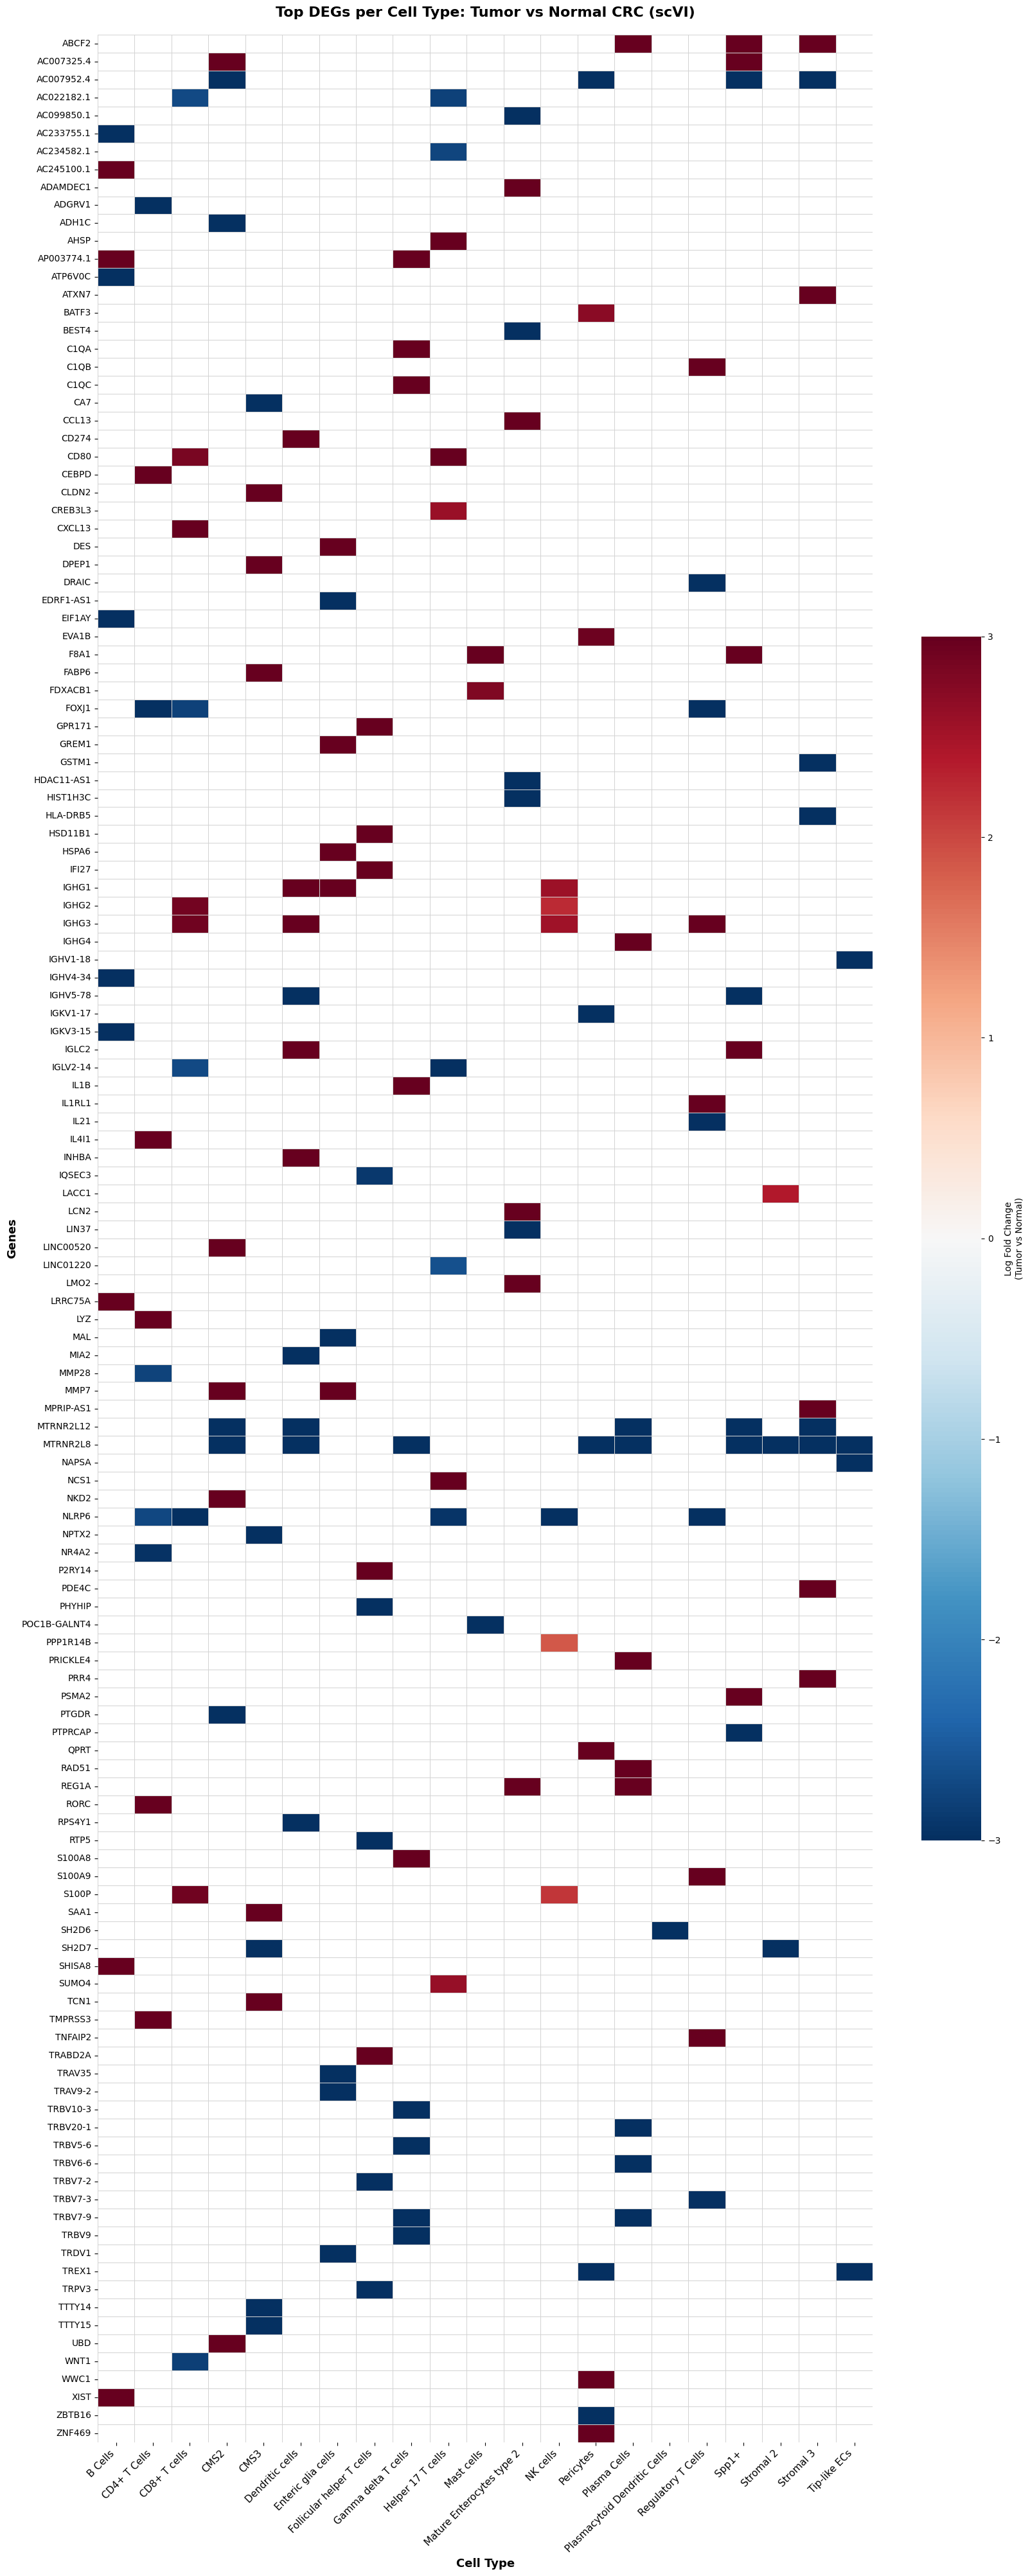


Total unique genes: 134
Cell types: 21

CREATING VOLCANO PLOTS: LEFT VS RIGHT CRC (scVI)


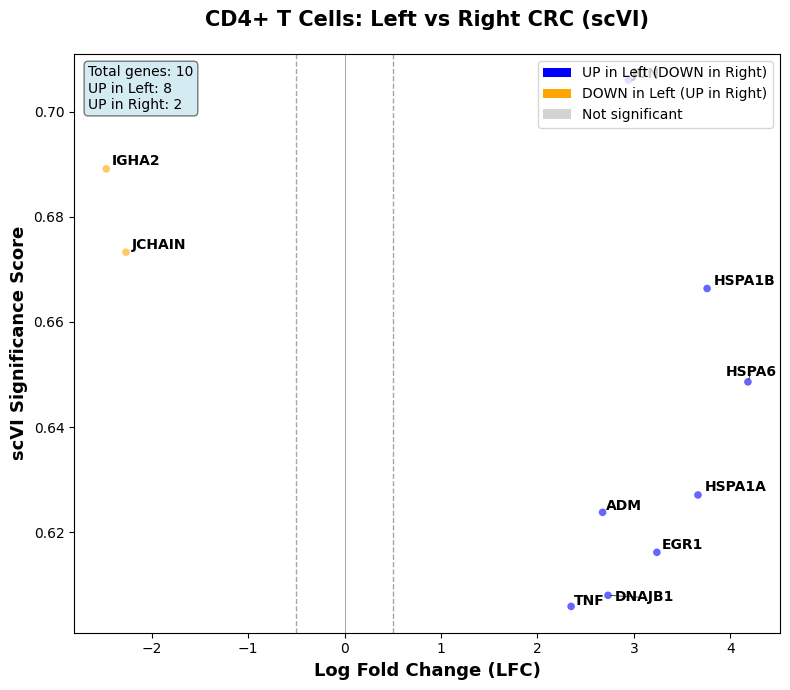


CD4+ T Cells:
  UP in Left: 8
  UP in Right: 2


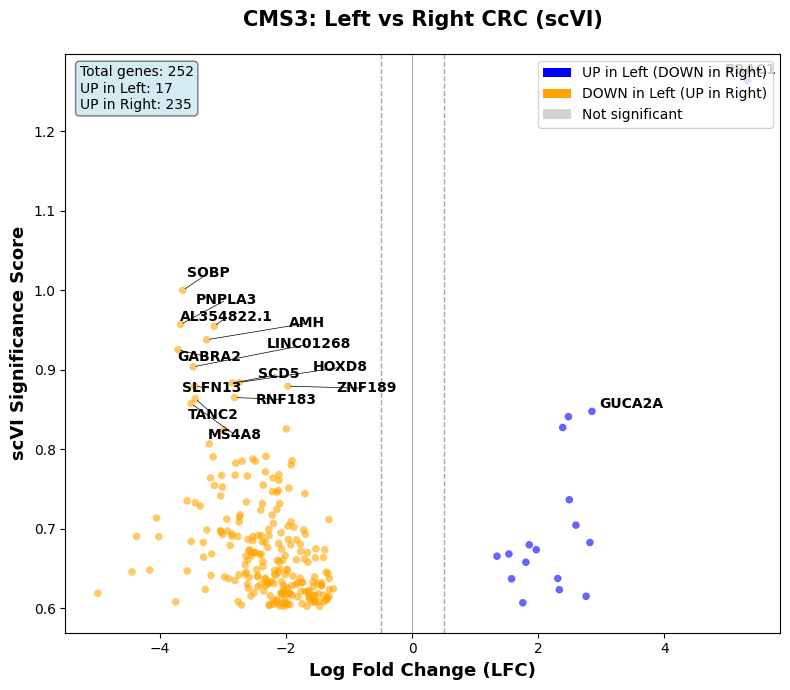


CMS3:
  UP in Left: 17
  UP in Right: 235


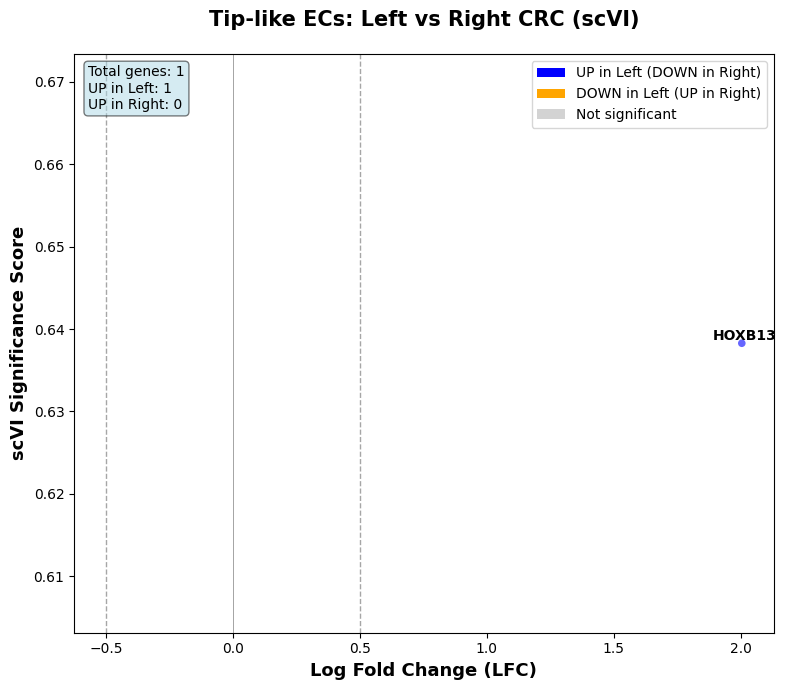


Tip-like ECs:
  UP in Left: 1
  UP in Right: 0


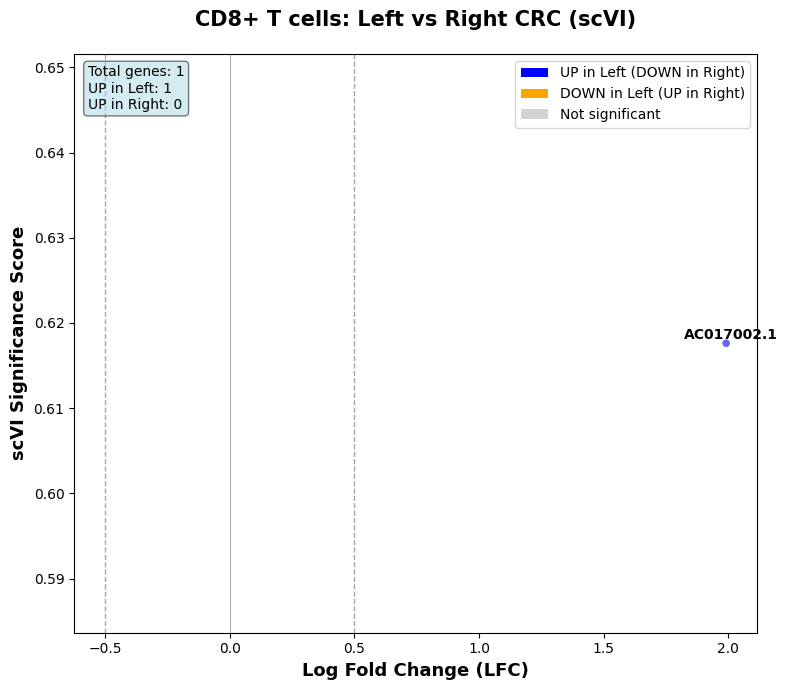


CD8+ T cells:
  UP in Left: 1
  UP in Right: 0


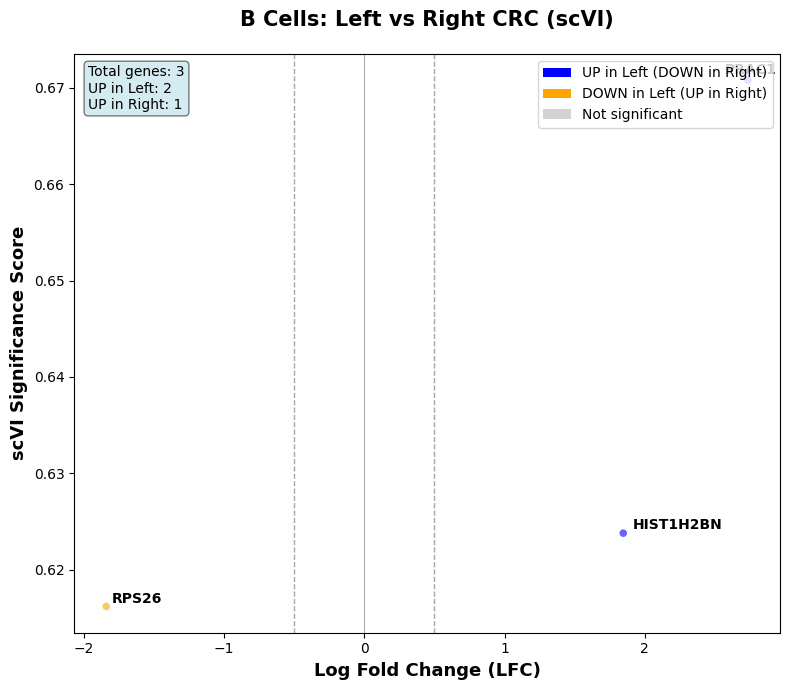


B Cells:
  UP in Left: 2
  UP in Right: 1


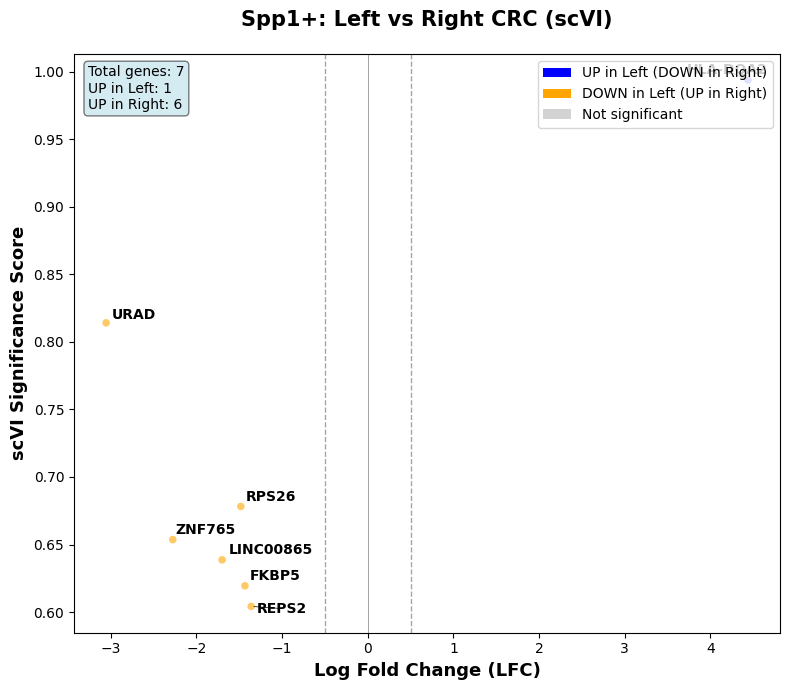


Spp1+:
  UP in Left: 1
  UP in Right: 6


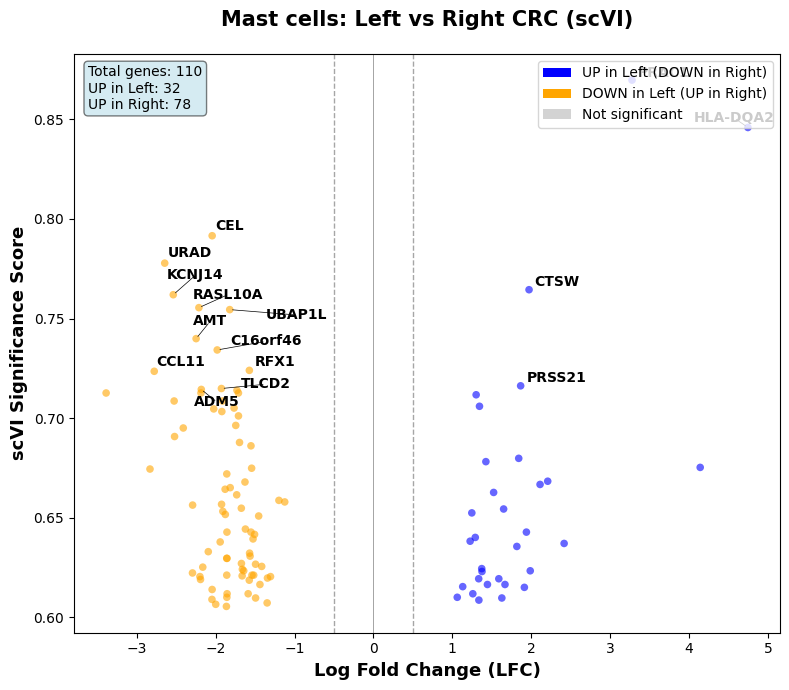


Mast cells:
  UP in Left: 32
  UP in Right: 78


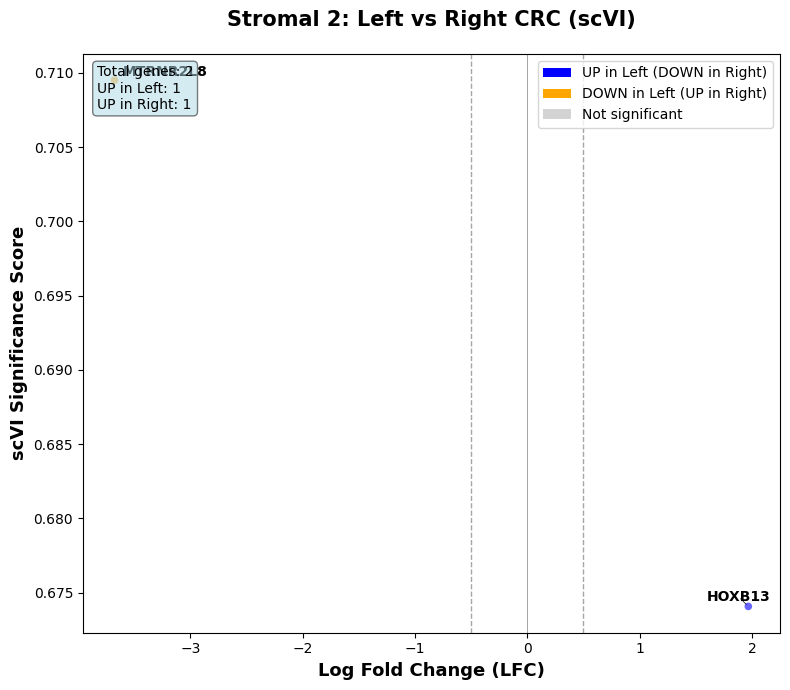


Stromal 2:
  UP in Left: 1
  UP in Right: 1


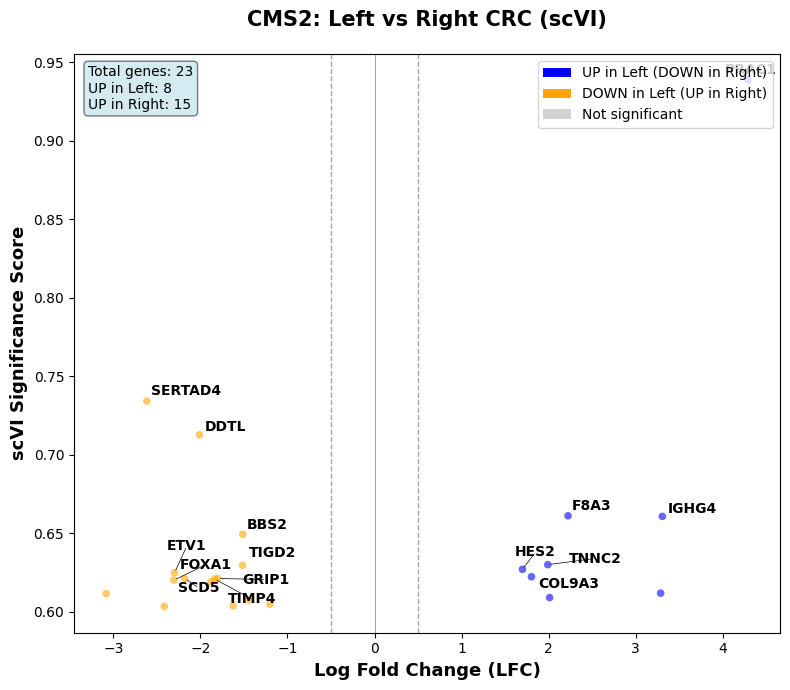


CMS2:
  UP in Left: 8
  UP in Right: 15


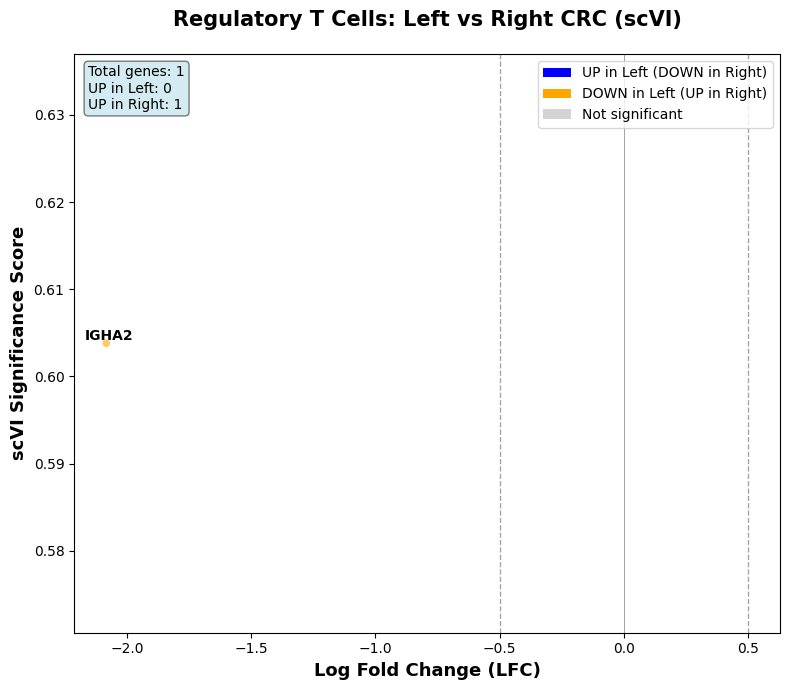


Regulatory T Cells:
  UP in Left: 0
  UP in Right: 1


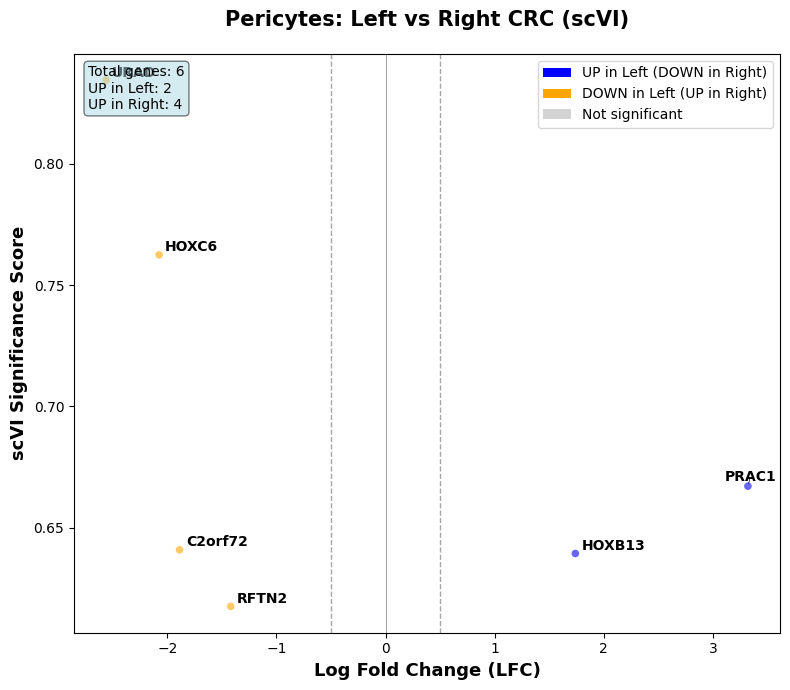


Pericytes:
  UP in Left: 2
  UP in Right: 4


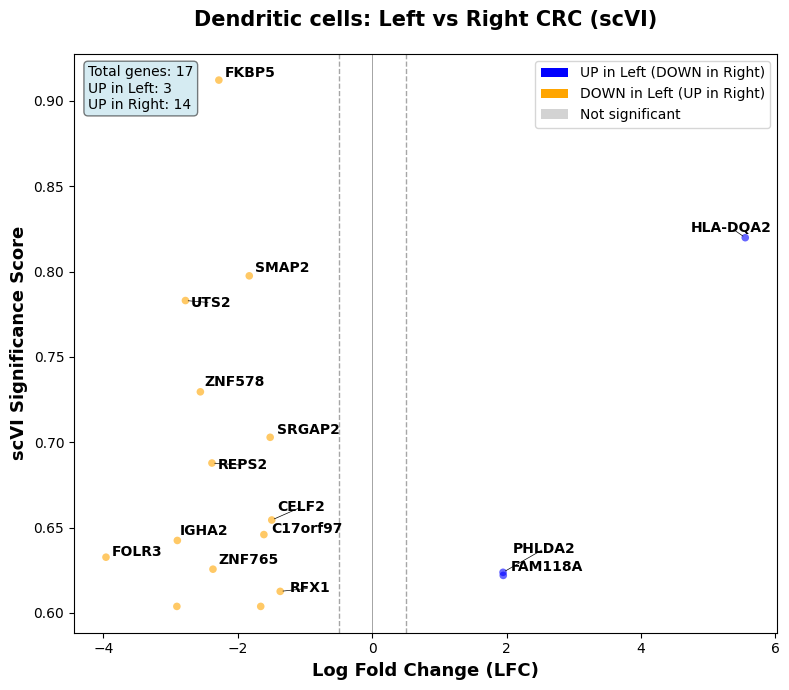


Dendritic cells:
  UP in Left: 3
  UP in Right: 14


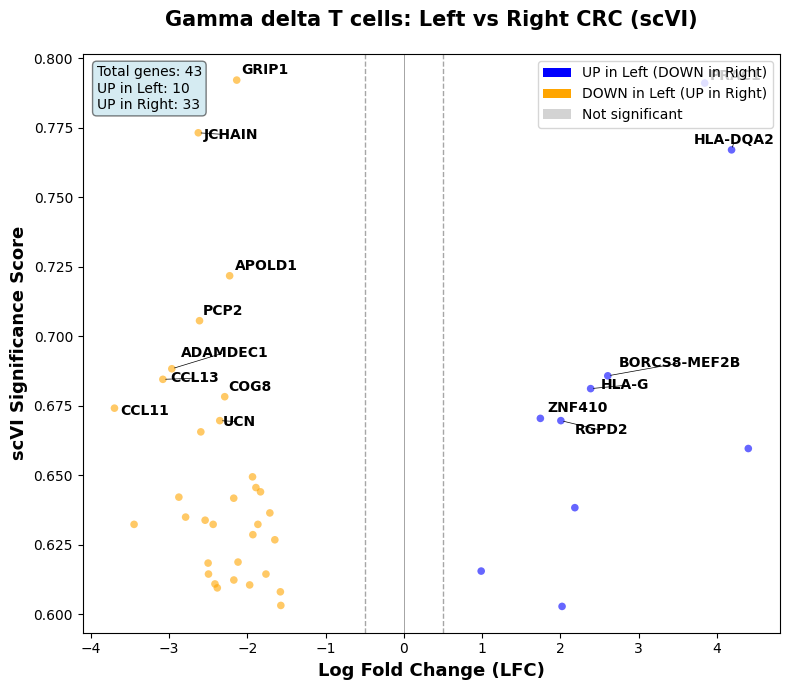


Gamma delta T cells:
  UP in Left: 10
  UP in Right: 33


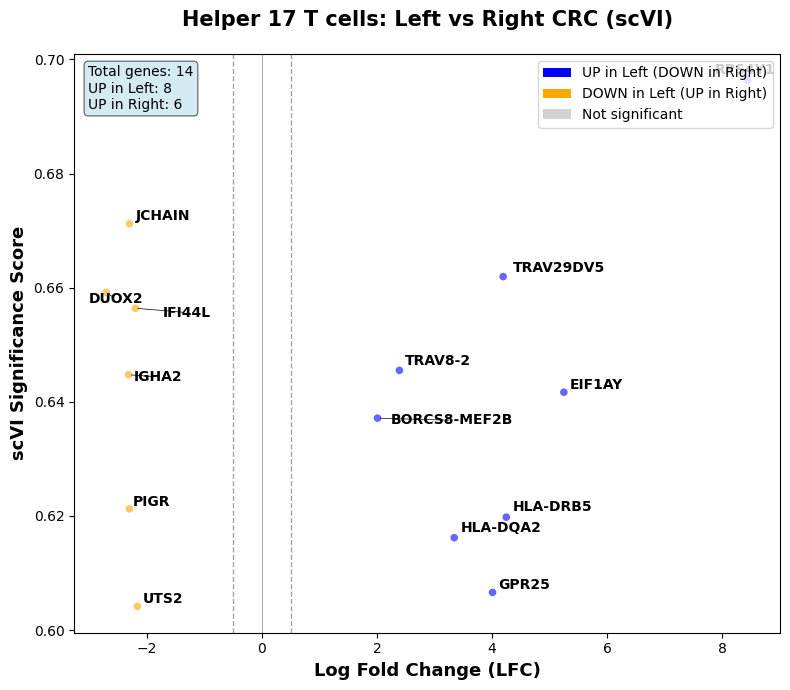


Helper 17 T cells:
  UP in Left: 8
  UP in Right: 6


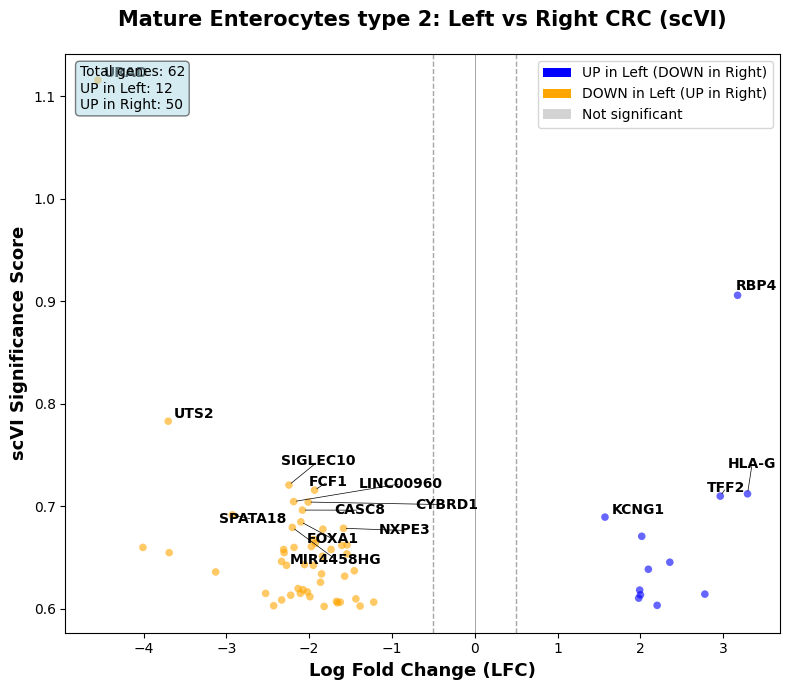


Mature Enterocytes type 2:
  UP in Left: 12
  UP in Right: 50


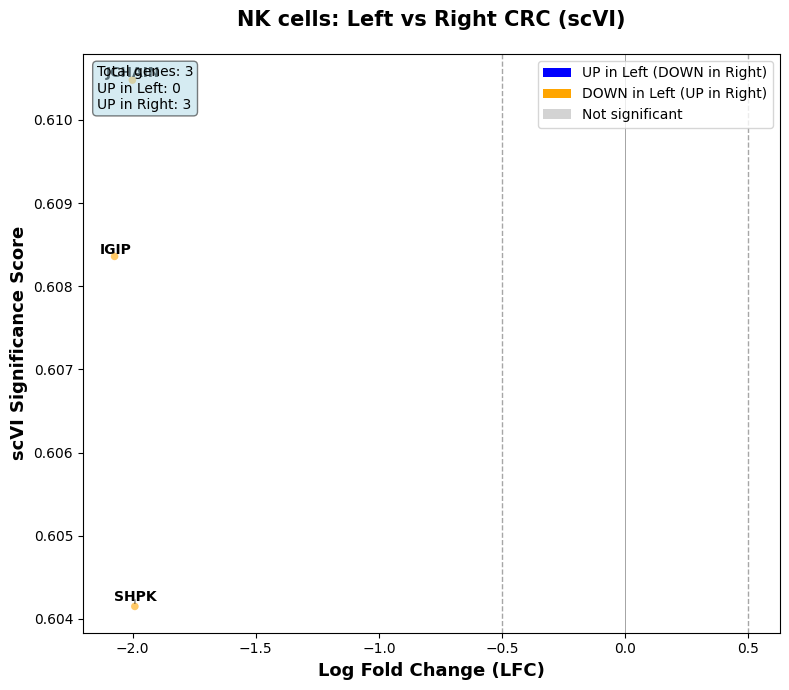


NK cells:
  UP in Left: 0
  UP in Right: 3


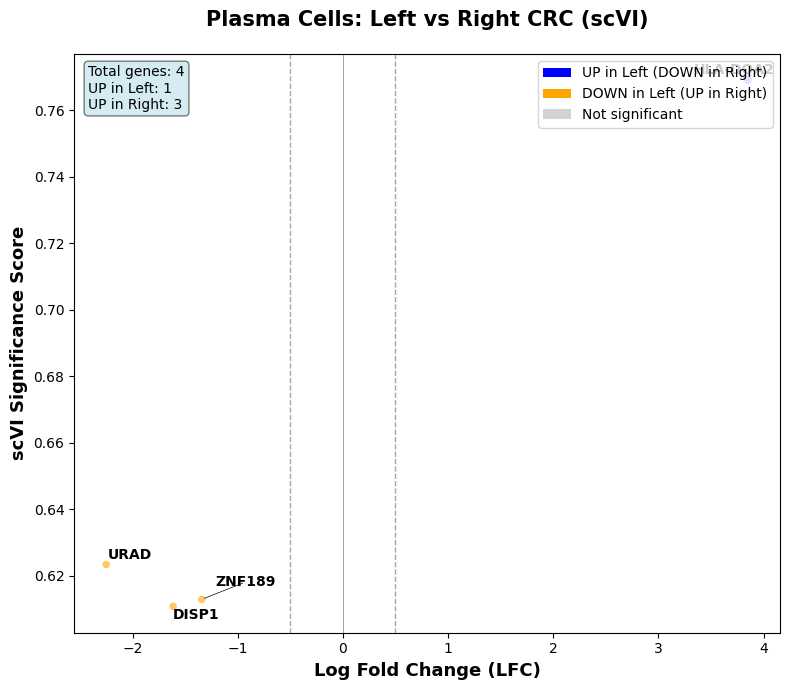


Plasma Cells:
  UP in Left: 1
  UP in Right: 3


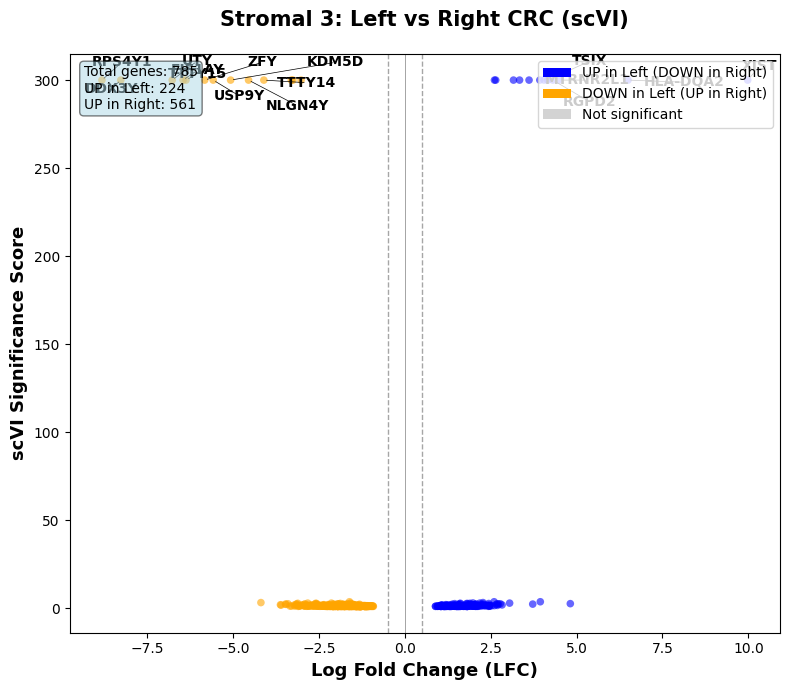


Stromal 3:
  UP in Left: 224
  UP in Right: 561


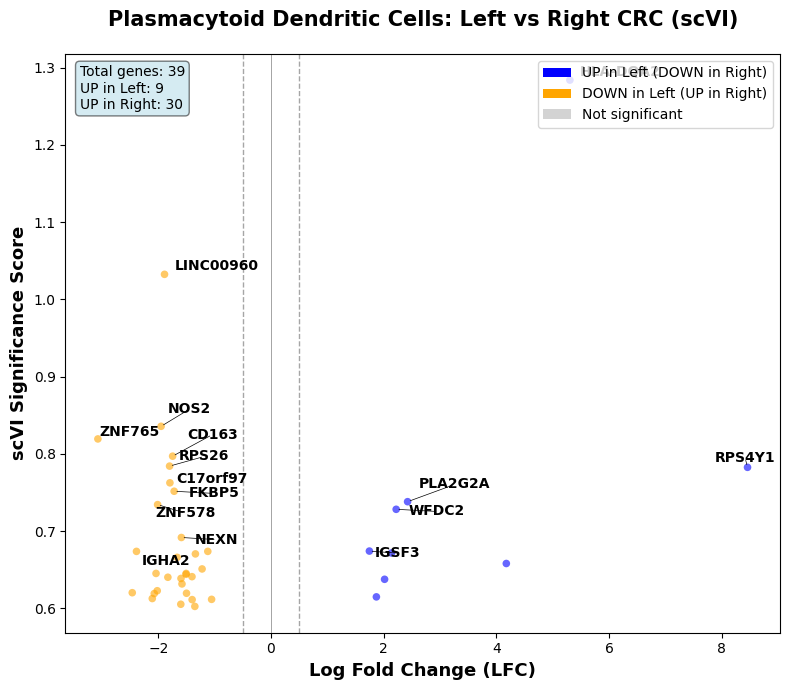


Plasmacytoid Dendritic Cells:
  UP in Left: 9
  UP in Right: 30


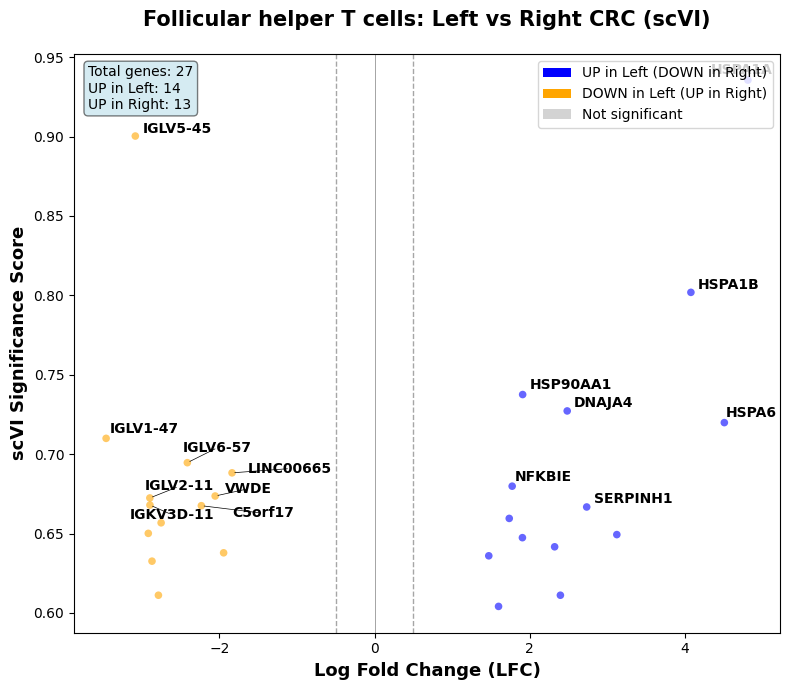


Follicular helper T cells:
  UP in Left: 14
  UP in Right: 13


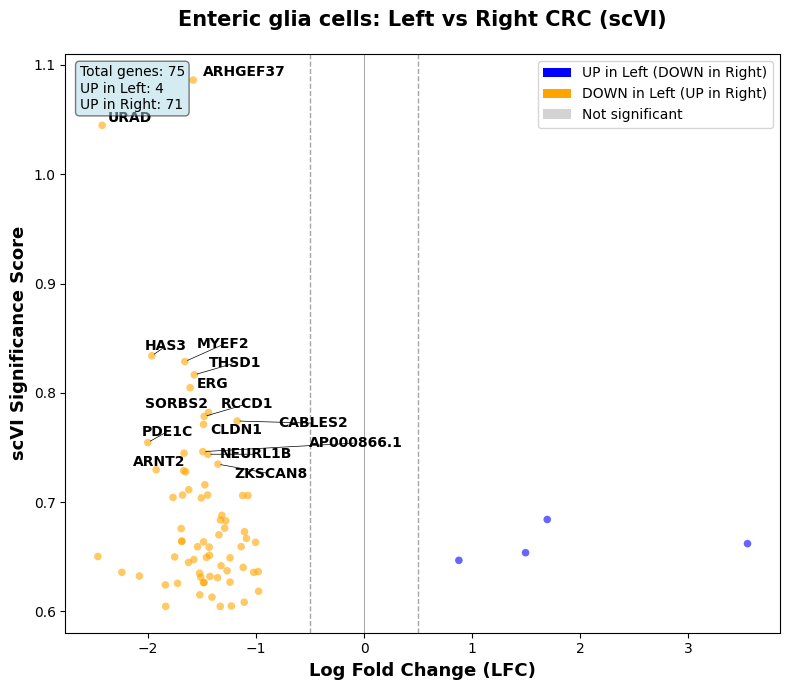


Enteric glia cells:
  UP in Left: 4
  UP in Right: 71

CREATING HEATMAP: TOP DEGs PER CELL TYPE (LEFT VS RIGHT)


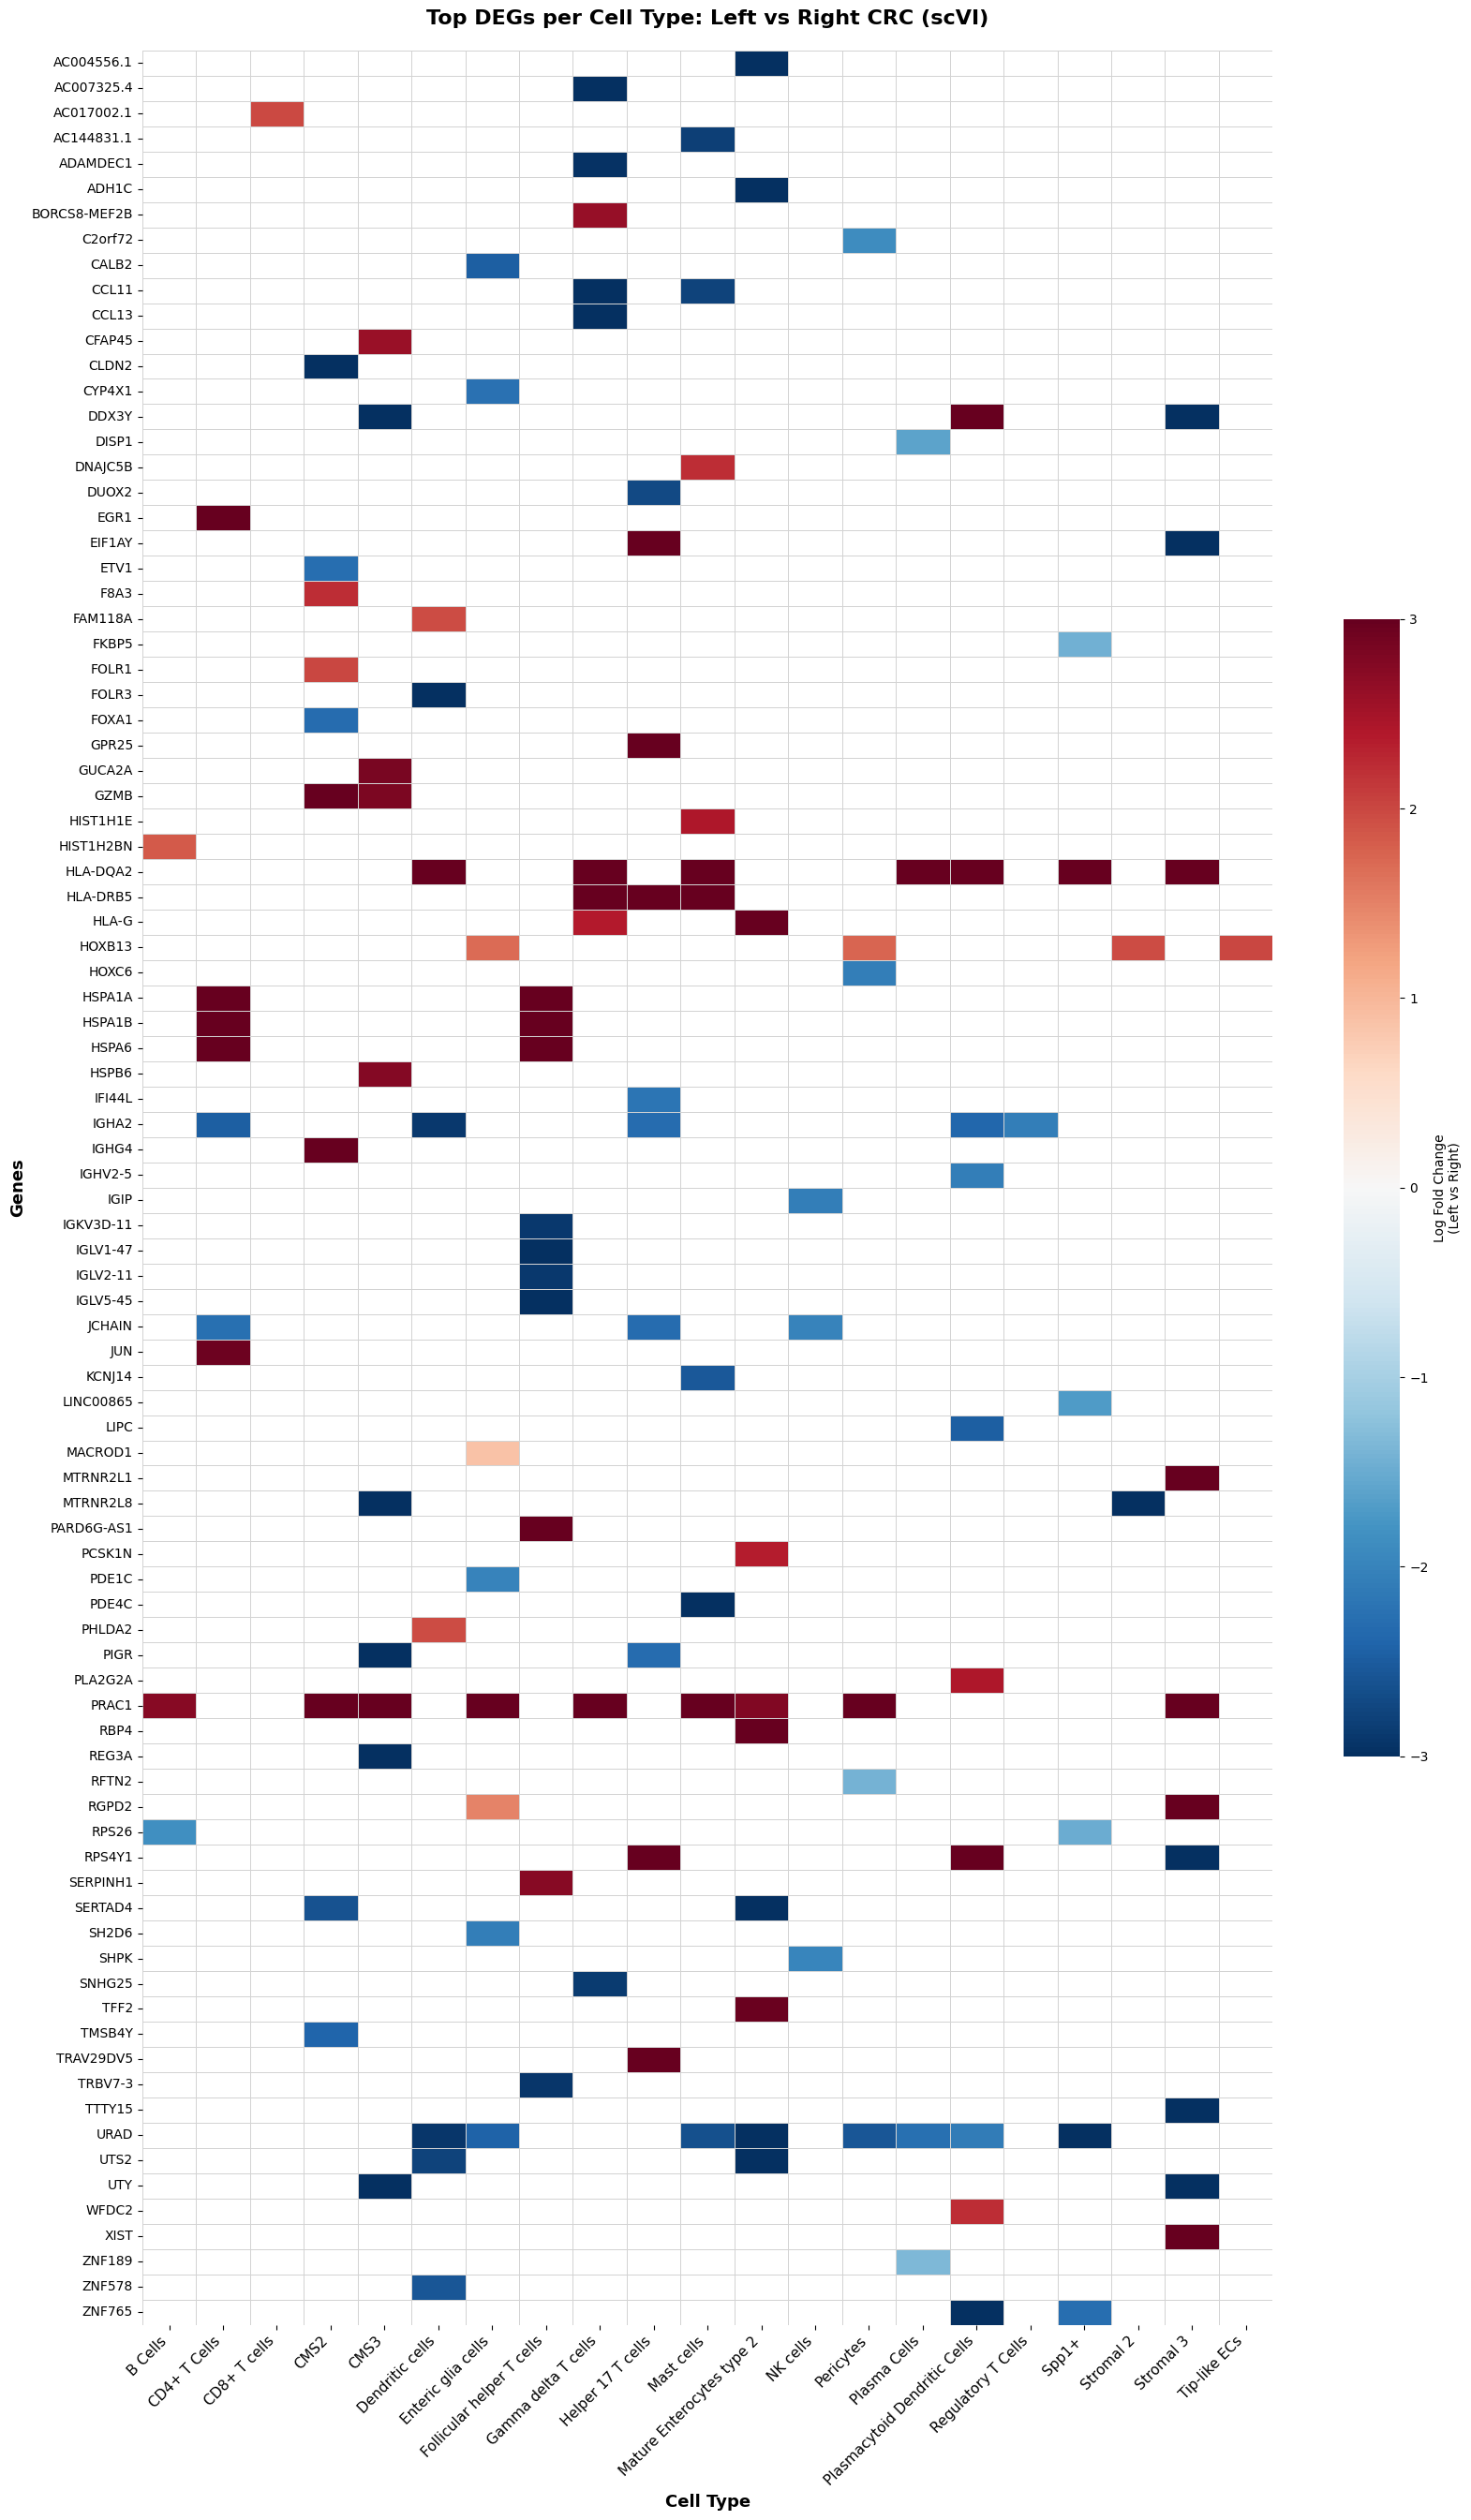


✅ ALL VISUALIZATIONS COMPLETE!


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text

# ============================================================================
# PART 1: VOLCANO PLOTS FOR TUMOR VS NORMAL (scVI results)
# ============================================================================

print("="*70)
print("CREATING VOLCANO PLOTS: TUMOR VS NORMAL (scVI)")
print("="*70)

# Iterate through each cell type
for cell_type, de_df in filtered_de_results.items():
    fig, ax = plt.subplots(figsize=(8, 7))
    
    if len(de_df) == 0:
        print(f"No DEGs found for {cell_type}")
        plt.close()
        continue
    
    # Prepare data for plotting
    plot_df = de_df.copy()
    
    # Calculate -log10(adjusted p-value) - use bayes_factor as proxy if no p-value
    if 'proba_de' in plot_df.columns:
        # Convert probability to -log10 scale for visualization
        plot_df['-log10_pval'] = -np.log10(1 - plot_df['proba_de'] + 1e-300)
    elif 'bayes_factor' in plot_df.columns:
        plot_df['-log10_pval'] = np.log10(plot_df['bayes_factor'] + 1)
    else:
        print(f"Warning: No p-value column found for {cell_type}")
        continue
    
    # Color by significance and direction
    colors = []
    for idx, row in plot_df.iterrows():
        if abs(row['lfc_mean']) > 0.5:
            if row['lfc_mean'] > 0:
                colors.append('red')  # UP in tumor
            else:
                colors.append('green')  # DOWN in tumor (UP in normal)
        else:
            colors.append('lightgray')
    
    # Create volcano plot
    scatter = ax.scatter(
        plot_df['lfc_mean'],
        plot_df['-log10_pval'],
        c=colors,
        alpha=0.6,
        s=30,
        edgecolors='none'
    )
    
    # Label top genes
    texts = []
    top_genes = plot_df.nlargest(15, '-log10_pval')
    
    for gene_name, gene_data in top_genes.iterrows():
        texts.append(
            ax.text(
                gene_data['lfc_mean'],
                gene_data['-log10_pval'],
                gene_name,
                fontsize=10,
                fontweight='bold'
            )
        )
    
    # Adjust text to avoid overlaps
    try:
        adjust_text(
            texts,
            arrowprops=dict(arrowstyle='-', color='black', lw=0.5),
            expand_points=(1.5, 1.5),
            force_points=(0.5, 0.5)
        )
    except:
        pass
    
    # Add threshold lines
    ax.axvline(x=0.5, color='gray', linestyle='--', linewidth=1, alpha=0.7)
    ax.axvline(x=-0.5, color='gray', linestyle='--', linewidth=1, alpha=0.7)
    ax.axvline(x=0, color='black', linestyle='-', linewidth=0.5, alpha=0.5)
    
    # Labels and title
    ax.set_xlabel('Log Fold Change (LFC)', fontsize=13, fontweight='bold')
    ax.set_ylabel('scVI Significance Score', fontsize=13, fontweight='bold')
    ax.set_title(f'{cell_type}: Tumor vs Normal CRC (scVI)', 
                 fontsize=15, fontweight='bold', pad=20)
    
    # Legend
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='red', label='UP in Tumor'),
        Patch(facecolor='green', label='DOWN in Tumor (UP in Normal)'),
        Patch(facecolor='lightgray', label='Not significant')
    ]
    ax.legend(handles=legend_elements, loc='upper right', fontsize=10, frameon=True)
    
    # Summary stats box
    n_up = sum([1 for c in colors if c == 'red'])
    n_down = sum([1 for c in colors if c == 'green'])
    n_total = len(plot_df)
    
    textstr = f'Total genes: {n_total}\nUP in Tumor: {n_up}\nDOWN in Tumor: {n_down}'
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax.text(0.02, 0.98, textstr, transform=ax.transAxes, fontsize=10,
            verticalalignment='top', bbox=props)
    
    plt.tight_layout()
    plt.savefig(f'scvi_volcano_{cell_type.replace(" ", "_").replace("/", "_")}_tumor_vs_normal.pdf', 
                dpi=300, bbox_inches='tight')
    plt.show()
    
    print(f"\n{cell_type}:")
    print(f"  UP in Tumor: {n_up}")
    print(f"  DOWN in Tumor: {n_down}")


# ============================================================================
# PART 2: HEATMAP OF TOP DEGs (Tumor vs Normal)
# ============================================================================

print("\n" + "="*70)
print("CREATING HEATMAP: TOP DEGs PER CELL TYPE (TUMOR VS NORMAL)")
print("="*70)

# Collect top genes per cell type
top_genes_per_celltype = []

for cell_type, de_df in filtered_de_results.items():
    if len(de_df) == 0:
        continue
    
    # Get top 5 UP and top 5 DOWN genes
    up_genes = de_df[de_df['lfc_mean'] > 0].nlargest(5, 'lfc_mean')
    down_genes = de_df[de_df['lfc_mean'] < 0].nsmallest(5, 'lfc_mean')
    
    for gene_name, gene_data in up_genes.iterrows():
        top_genes_per_celltype.append({
            'Gene': gene_name,
            'Cell_Type': cell_type,
            'log2FC': gene_data['lfc_mean']
        })
    
    for gene_name, gene_data in down_genes.iterrows():
        top_genes_per_celltype.append({
            'Gene': gene_name,
            'Cell_Type': cell_type,
            'log2FC': gene_data['lfc_mean']
        })

# Create heatmap
if len(top_genes_per_celltype) > 0:
    df_heatmap = pd.DataFrame(top_genes_per_celltype)
    heatmap_pivot = df_heatmap.pivot_table(
        index='Gene',
        columns='Cell_Type',
        values='log2FC',
        aggfunc='first'
    )
    
    # Create plot
    fig, ax = plt.subplots(figsize=(len(heatmap_pivot.columns) * 0.8, 
                                     len(heatmap_pivot) * 0.3))
    
    sns.heatmap(
        heatmap_pivot,
        cmap='RdBu_r',
        center=0,
        vmin=-3,
        vmax=3,
        cbar_kws={'label': 'Log Fold Change\n(Tumor vs Normal)', 'shrink': 0.5},
        linewidths=0.5,
        linecolor='lightgray',
        yticklabels=True,
        xticklabels=True,
        ax=ax,
        square=False
    )
    
    ax.set_title('Top DEGs per Cell Type: Tumor vs Normal CRC (scVI)', 
                 fontsize=16, fontweight='bold', pad=20)
    ax.set_xlabel('Cell Type', fontsize=13, fontweight='bold')
    ax.set_ylabel('Genes', fontsize=13, fontweight='bold')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=11)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=10)
    
    plt.tight_layout()
    plt.savefig('scvi_heatmap_top_genes_tumor_vs_normal.pdf', dpi=300, bbox_inches='tight')
    plt.show()
    
    print(f"\nTotal unique genes: {len(heatmap_pivot)}")
    print(f"Cell types: {len(heatmap_pivot.columns)}")


# ============================================================================
# PART 3: VOLCANO PLOTS FOR LEFT VS RIGHT CRC (scVI results)
# ============================================================================

print("\n" + "="*70)
print("CREATING VOLCANO PLOTS: LEFT VS RIGHT CRC (scVI)")
print("="*70)

for cell_type, de_df in filtered_de_results_location.items():
    fig, ax = plt.subplots(figsize=(8, 7))
    
    if len(de_df) == 0:
        print(f"No DEGs found for {cell_type}")
        plt.close()
        continue
    
    plot_df = de_df.copy()
    
    # Calculate significance score
    if 'proba_de' in plot_df.columns:
        plot_df['-log10_pval'] = -np.log10(1 - plot_df['proba_de'] + 1e-300)
    elif 'bayes_factor' in plot_df.columns:
        plot_df['-log10_pval'] = np.log10(plot_df['bayes_factor'] + 1)
    
    # Color by direction
    colors = []
    for idx, row in plot_df.iterrows():
        if abs(row['lfc_mean']) > 0.5:
            if row['lfc_mean'] > 0:
                colors.append('blue')  # UP in left (DOWN in right)
            else:
                colors.append('orange')  # DOWN in left (UP in right)
        else:
            colors.append('lightgray')
    
    # Create plot
    scatter = ax.scatter(
        plot_df['lfc_mean'],
        plot_df['-log10_pval'],
        c=colors,
        alpha=0.6,
        s=30,
        edgecolors='none'
    )
    
    # Label top genes
    texts = []
    top_genes = plot_df.nlargest(15, '-log10_pval')
    
    for gene_name, gene_data in top_genes.iterrows():
        texts.append(
            ax.text(
                gene_data['lfc_mean'],
                gene_data['-log10_pval'],
                gene_name,
                fontsize=10,
                fontweight='bold'
            )
        )
    
    try:
        adjust_text(
            texts,
            arrowprops=dict(arrowstyle='-', color='black', lw=0.5),
            expand_points=(1.5, 1.5),
            force_points=(0.5, 0.5)
        )
    except:
        pass
    
    # Threshold lines
    ax.axvline(x=0.5, color='gray', linestyle='--', linewidth=1, alpha=0.7)
    ax.axvline(x=-0.5, color='gray', linestyle='--', linewidth=1, alpha=0.7)
    ax.axvline(x=0, color='black', linestyle='-', linewidth=0.5, alpha=0.5)
    
    ax.set_xlabel('Log Fold Change (LFC)', fontsize=13, fontweight='bold')
    ax.set_ylabel('scVI Significance Score', fontsize=13, fontweight='bold')
    ax.set_title(f'{cell_type}: Left vs Right CRC (scVI)', 
                 fontsize=15, fontweight='bold', pad=20)
    
    # Legend
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='blue', label='UP in Left (DOWN in Right)'),
        Patch(facecolor='orange', label='DOWN in Left (UP in Right)'),
        Patch(facecolor='lightgray', label='Not significant')
    ]
    ax.legend(handles=legend_elements, loc='upper right', fontsize=10, frameon=True)
    
    # Stats box
    n_up_left = sum([1 for c in colors if c == 'blue'])
    n_up_right = sum([1 for c in colors if c == 'orange'])
    n_total = len(plot_df)
    
    textstr = f'Total genes: {n_total}\nUP in Left: {n_up_left}\nUP in Right: {n_up_right}'
    props = dict(boxstyle='round', facecolor='lightblue', alpha=0.5)
    ax.text(0.02, 0.98, textstr, transform=ax.transAxes, fontsize=10,
            verticalalignment='top', bbox=props)
    
    plt.tight_layout()
    plt.savefig(f'scvi_volcano_{cell_type.replace(" ", "_").replace("/", "_")}_left_vs_right.pdf', 
                dpi=300, bbox_inches='tight')
    plt.show()
    
    print(f"\n{cell_type}:")
    print(f"  UP in Left: {n_up_left}")
    print(f"  UP in Right: {n_up_right}")


# ============================================================================
# PART 4: HEATMAP FOR LEFT VS RIGHT
# ============================================================================

print("\n" + "="*70)
print("CREATING HEATMAP: TOP DEGs PER CELL TYPE (LEFT VS RIGHT)")
print("="*70)

top_genes_location = []

for cell_type, de_df in filtered_de_results_location.items():
    if len(de_df) == 0:
        continue
    
    up_genes = de_df[de_df['lfc_mean'] > 0].nlargest(5, 'lfc_mean')
    down_genes = de_df[de_df['lfc_mean'] < 0].nsmallest(5, 'lfc_mean')
    
    for gene_name, gene_data in up_genes.iterrows():
        top_genes_location.append({
            'Gene': gene_name,
            'Cell_Type': cell_type,
            'log2FC': gene_data['lfc_mean']
        })
    
    for gene_name, gene_data in down_genes.iterrows():
        top_genes_location.append({
            'Gene': gene_name,
            'Cell_Type': cell_type,
            'log2FC': gene_data['lfc_mean']
        })

if len(top_genes_location) > 0:
    df_heatmap_loc = pd.DataFrame(top_genes_location)
    heatmap_pivot_loc = df_heatmap_loc.pivot_table(
        index='Gene',
        columns='Cell_Type',
        values='log2FC',
        aggfunc='first'
    )
    
    fig, ax = plt.subplots(figsize=(len(heatmap_pivot_loc.columns) * 0.8, 
                                     len(heatmap_pivot_loc) * 0.3))
    
    sns.heatmap(
        heatmap_pivot_loc,
        cmap='RdBu_r',
        center=0,
        vmin=-3,
        vmax=3,
        cbar_kws={'label': 'Log Fold Change\n(Left vs Right)', 'shrink': 0.5},
        linewidths=0.5,
        linecolor='lightgray',
        yticklabels=True,
        xticklabels=True,
        ax=ax,
        square=False
    )
    
    ax.set_title('Top DEGs per Cell Type: Left vs Right CRC (scVI)', 
                 fontsize=16, fontweight='bold', pad=20)
    ax.set_xlabel('Cell Type', fontsize=13, fontweight='bold')
    ax.set_ylabel('Genes', fontsize=13, fontweight='bold')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=11)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=10)
    
    plt.tight_layout()
    plt.savefig('scvi_heatmap_top_genes_left_vs_right.pdf', dpi=300, bbox_inches='tight')
    plt.show()

print("\n✅ ALL VISUALIZATIONS COMPLETE!")